In [1]:
config='configuration_OA2024.yaml'
from pythetatools.config import load_config, inputs_dir, outputs_dir
load_config(f"{inputs_dir}/config_files/{config}")
from pythetatools.config import CONFIG

In [11]:
from pythetatools.config import *
from pythetatools.config_visualisation import *
from pythetatools.base_visualisation import *
from analysis_scripts import compare_llh_scans

import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
base_dir = f"{inputs_dir}/{CONFIG.dir_ver}/LLH_scan"
outdir_path = f'{outputs_dir}/plots/{CONFIG.dir_ver}/LLH_scans/'
os.makedirs(outdir_path, exist_ok=True)

In [13]:
suffix_ptheta = {'sample':'', 'constraint':'_constraint'}
suffix_mach3 = {'sample':'_sam', 'constraint':'_skdet'}

#These csv files should be created for each new interaction model
df_xsec_names = pd.read_csv(f'{inputs_dir}/Misc/xsec_param_names_OA2024_bothfitters.csv', names=['MaCh-3', 'P-theta'])
df_sk_names = pd.read_csv(f'{inputs_dir}/Misc/skdet_param_names_OA2024_bothfitters.csv', names=['P-theta', 'MaCh-3'], skiprows=1)

dict_df_names = {'xsec':df_xsec_names, 'skdet':df_sk_names}


## Set input files containing P-theta and MaCh-3 LLH scans

In [14]:
filename_ptheta = f"{base_dir}/LLH_scan_preGundam_Erectheta_50bins_MaCh3prior.root"
filename_mach3 = f"{base_dir}/OAR11B_LLHScan_PreGUNDAM_woEBEScale_v3.root"

## Plot LLH scan comparison for penalty term* 
*(the code handles only skdet group)

In [15]:
kind = 'constraint'
save = True
group = 'skdet'

llh_scan_toy_ptheta = compare_llh_scans.load_sigmavarskdet_per_sample(filename_ptheta, dict_df_names, group, 'P-theta', kind)
llh_scan_toy_mach3 = compare_llh_scans.load_sigmavarskdet_per_sample(filename_mach3,   dict_df_names, group, 'MaCh-3', kind)

for iparam, parameter in enumerate(dict_df_names[group]['P-theta'].values):
    fig, ax = plt.subplots()
    llh_scan_toy_ptheta[f'hscan_{parameter}{suffix_ptheta[kind]}'].plot(ax, wtitle=False, label='P-theta', ls=(0, (5, 10)),)
    llh_scan_toy_mach3[f'skd_joint_{iparam}{suffix_mach3[kind]}'].plot(ax, wtitle=False, label='MaCh-3', ls=(0, (1, 1)),)
    
    ax.set_title(parameter, loc='right')
    ax.set_xlabel('Param value')
    ax.set_ylabel('$-2\ln{\mathcal{L}_{penalty}}$')
    ax.legend()
    show_minor_ticks(ax)
    if save:
        fig.savefig(f'{outdir_path}/LLHscan_{parameter}_{kind}_Erectheta.pdf', bbox_inches='tight')
        plt.close(fig)

## Plot LLH scan comparison for sample term* 
*(the code handles only skdet group)

/var/folders/0f/cdw_py7n73s4cjyjq7pvfpl40000gn/T/ipykernel_94252/986793486.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


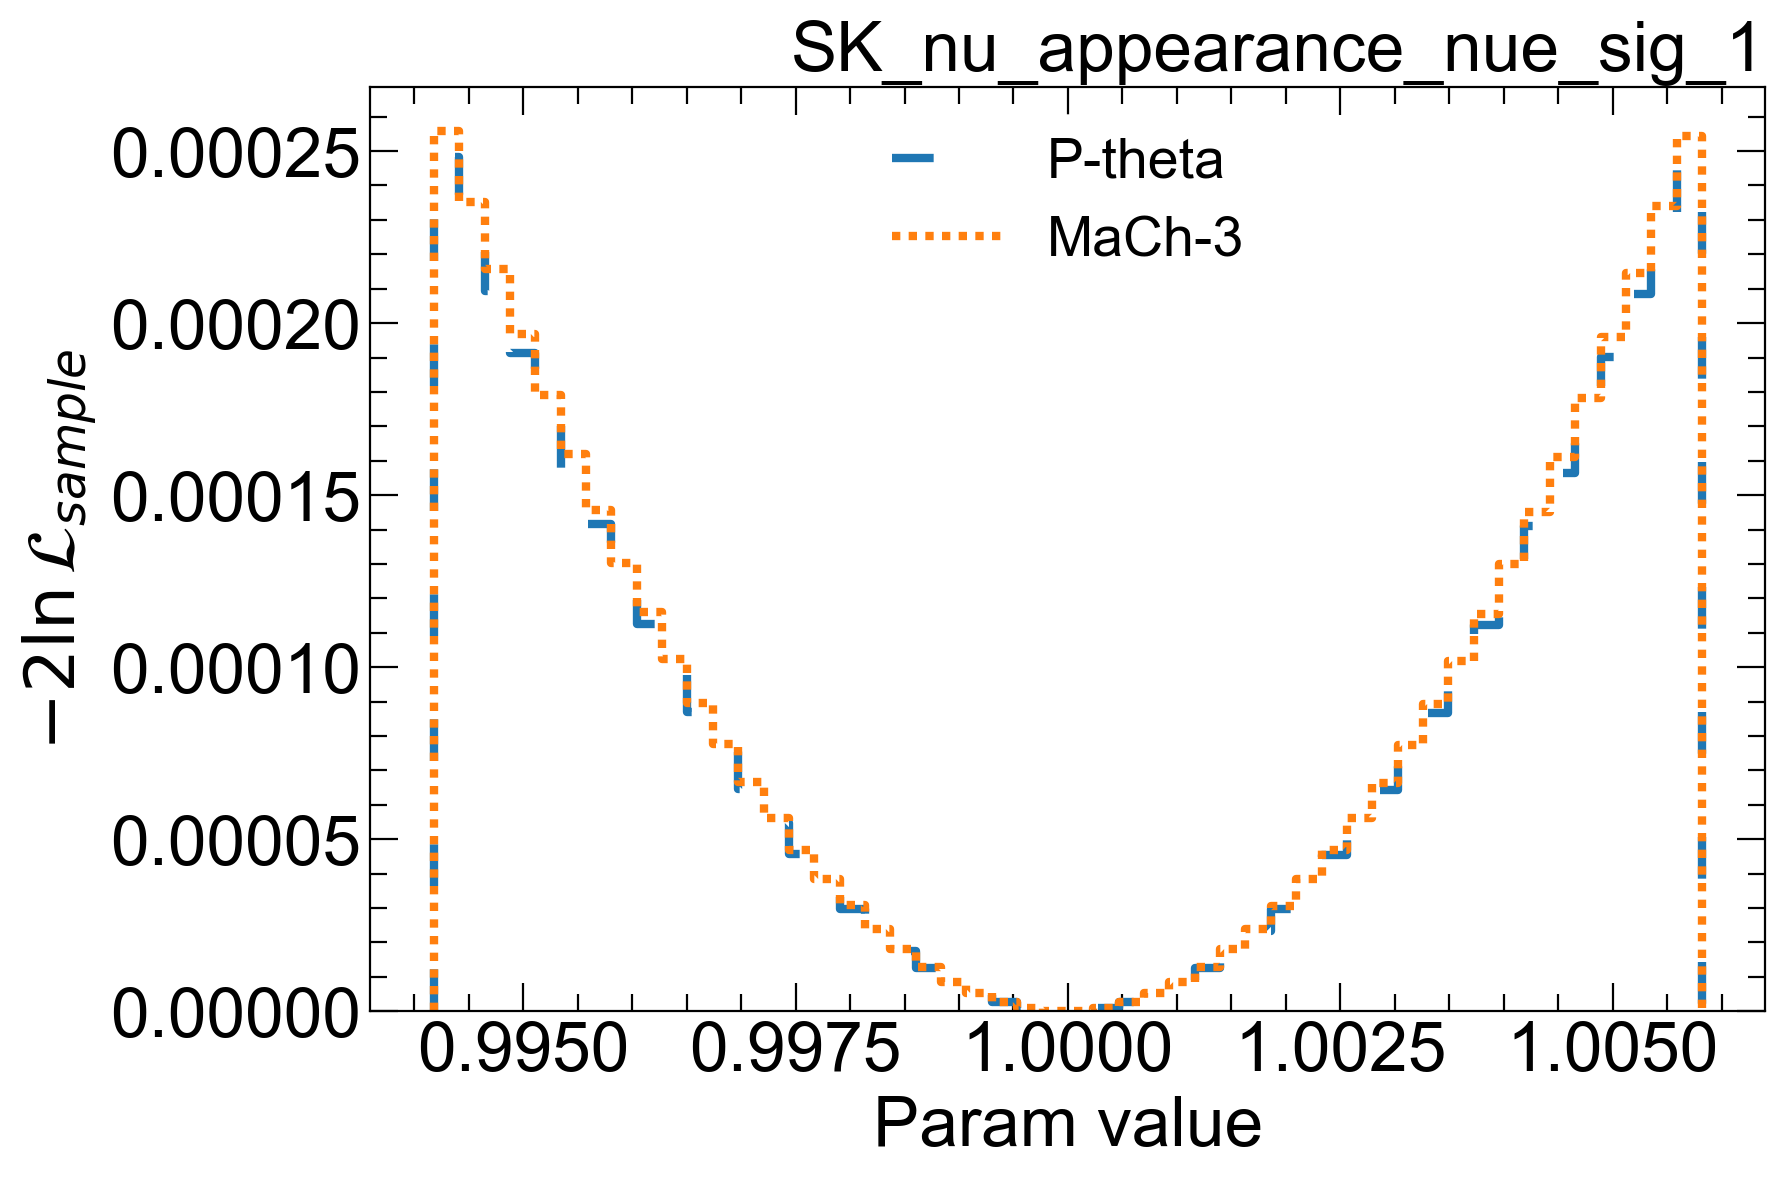

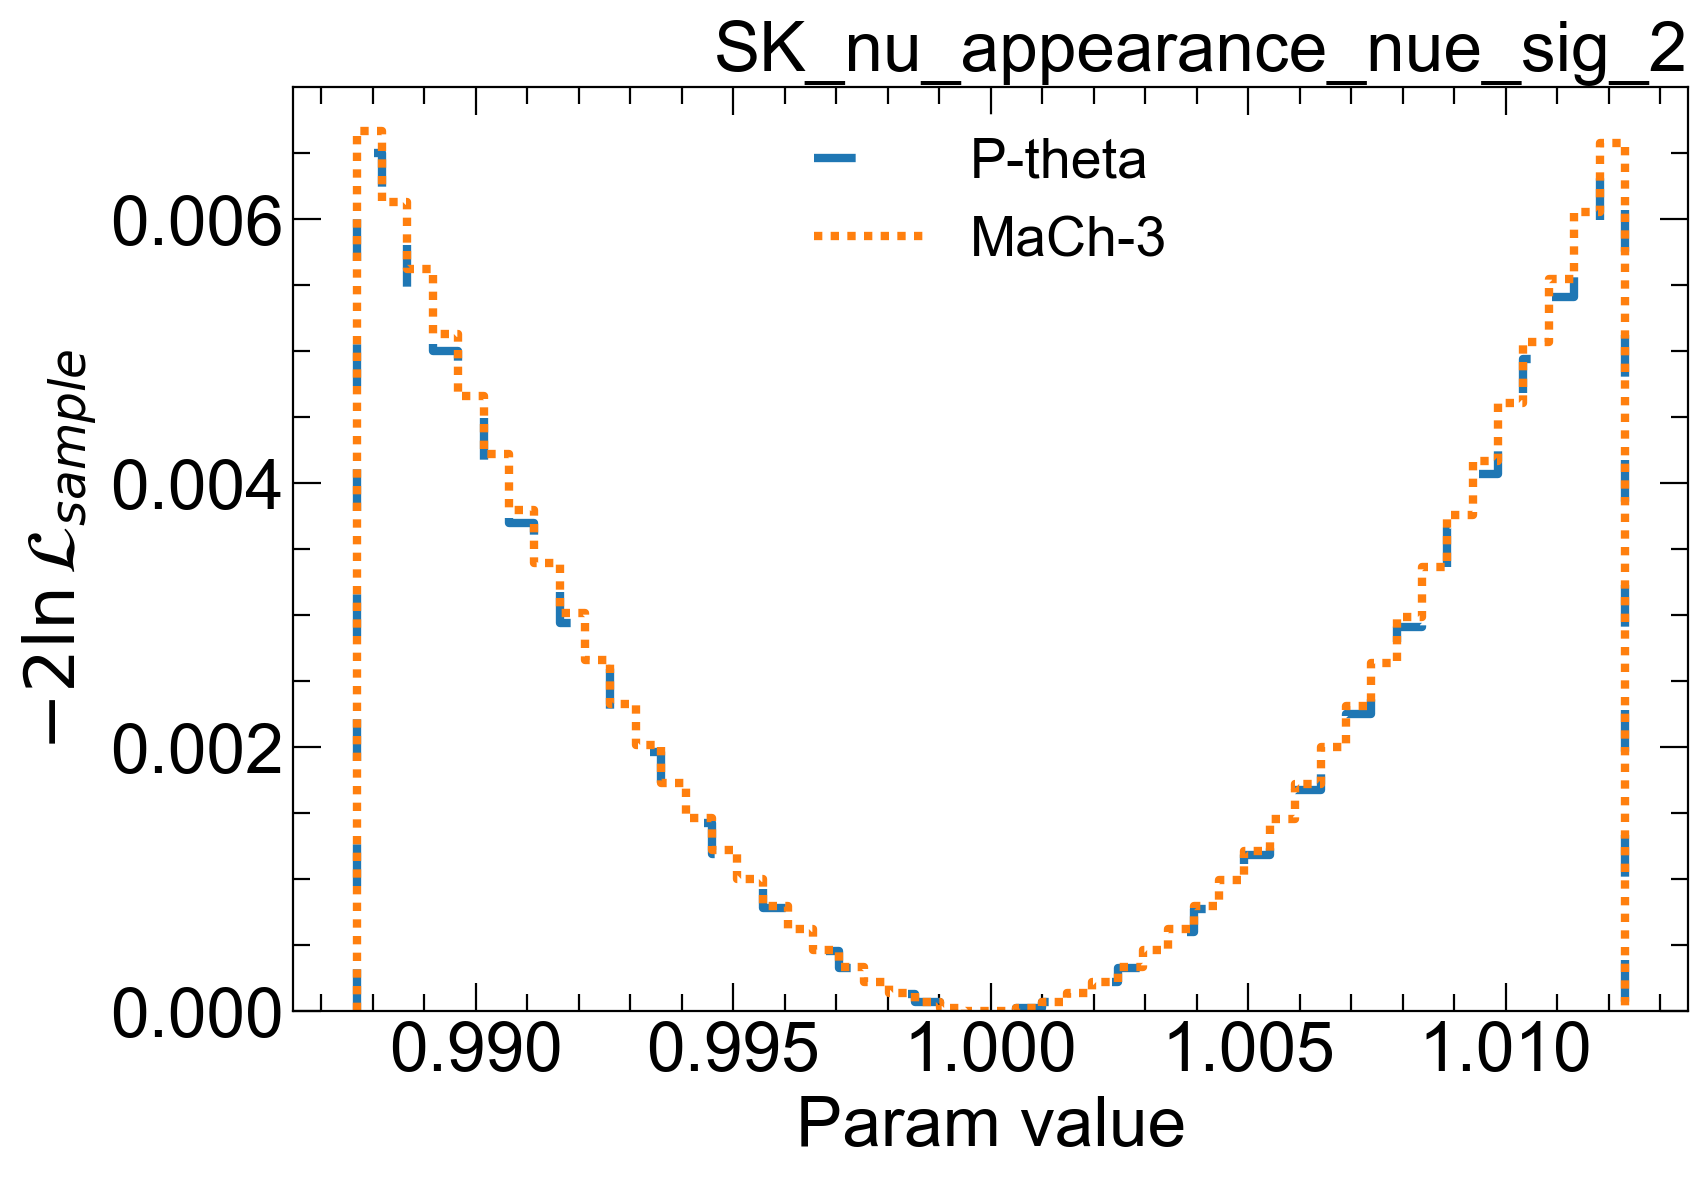

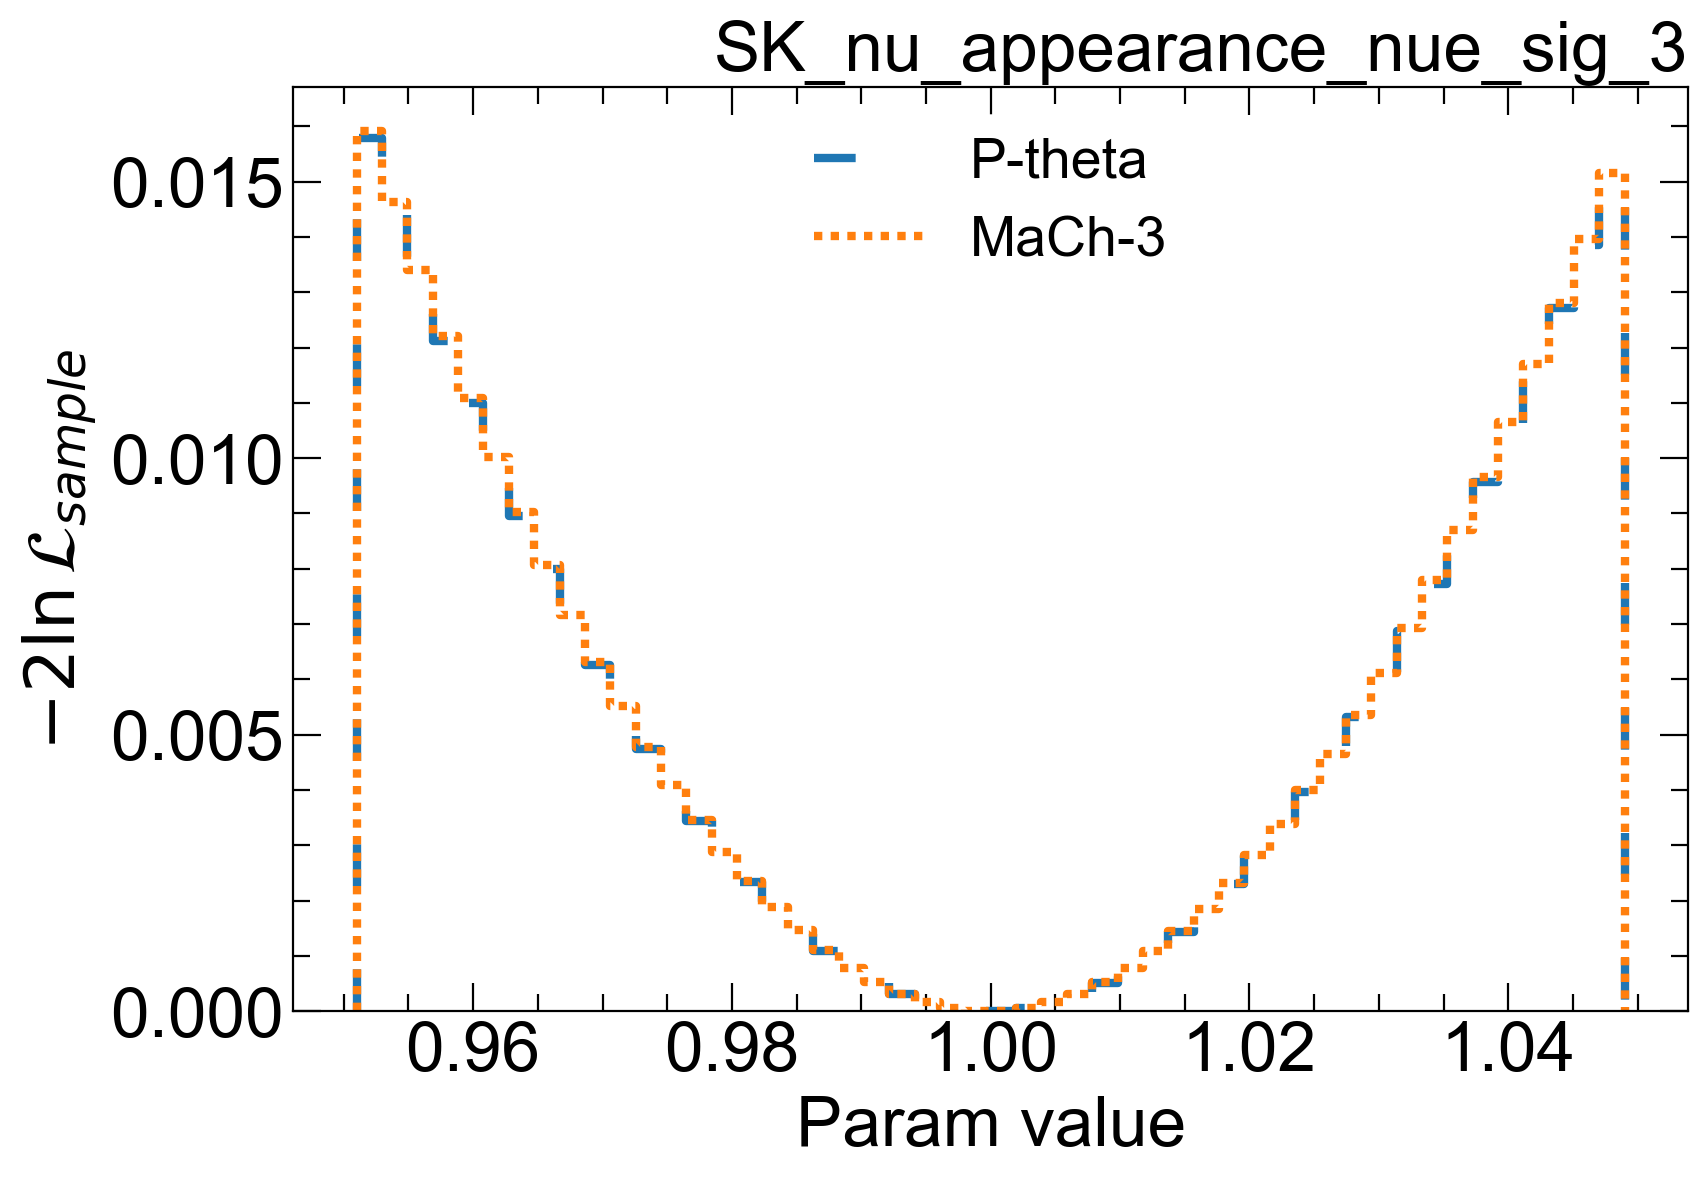

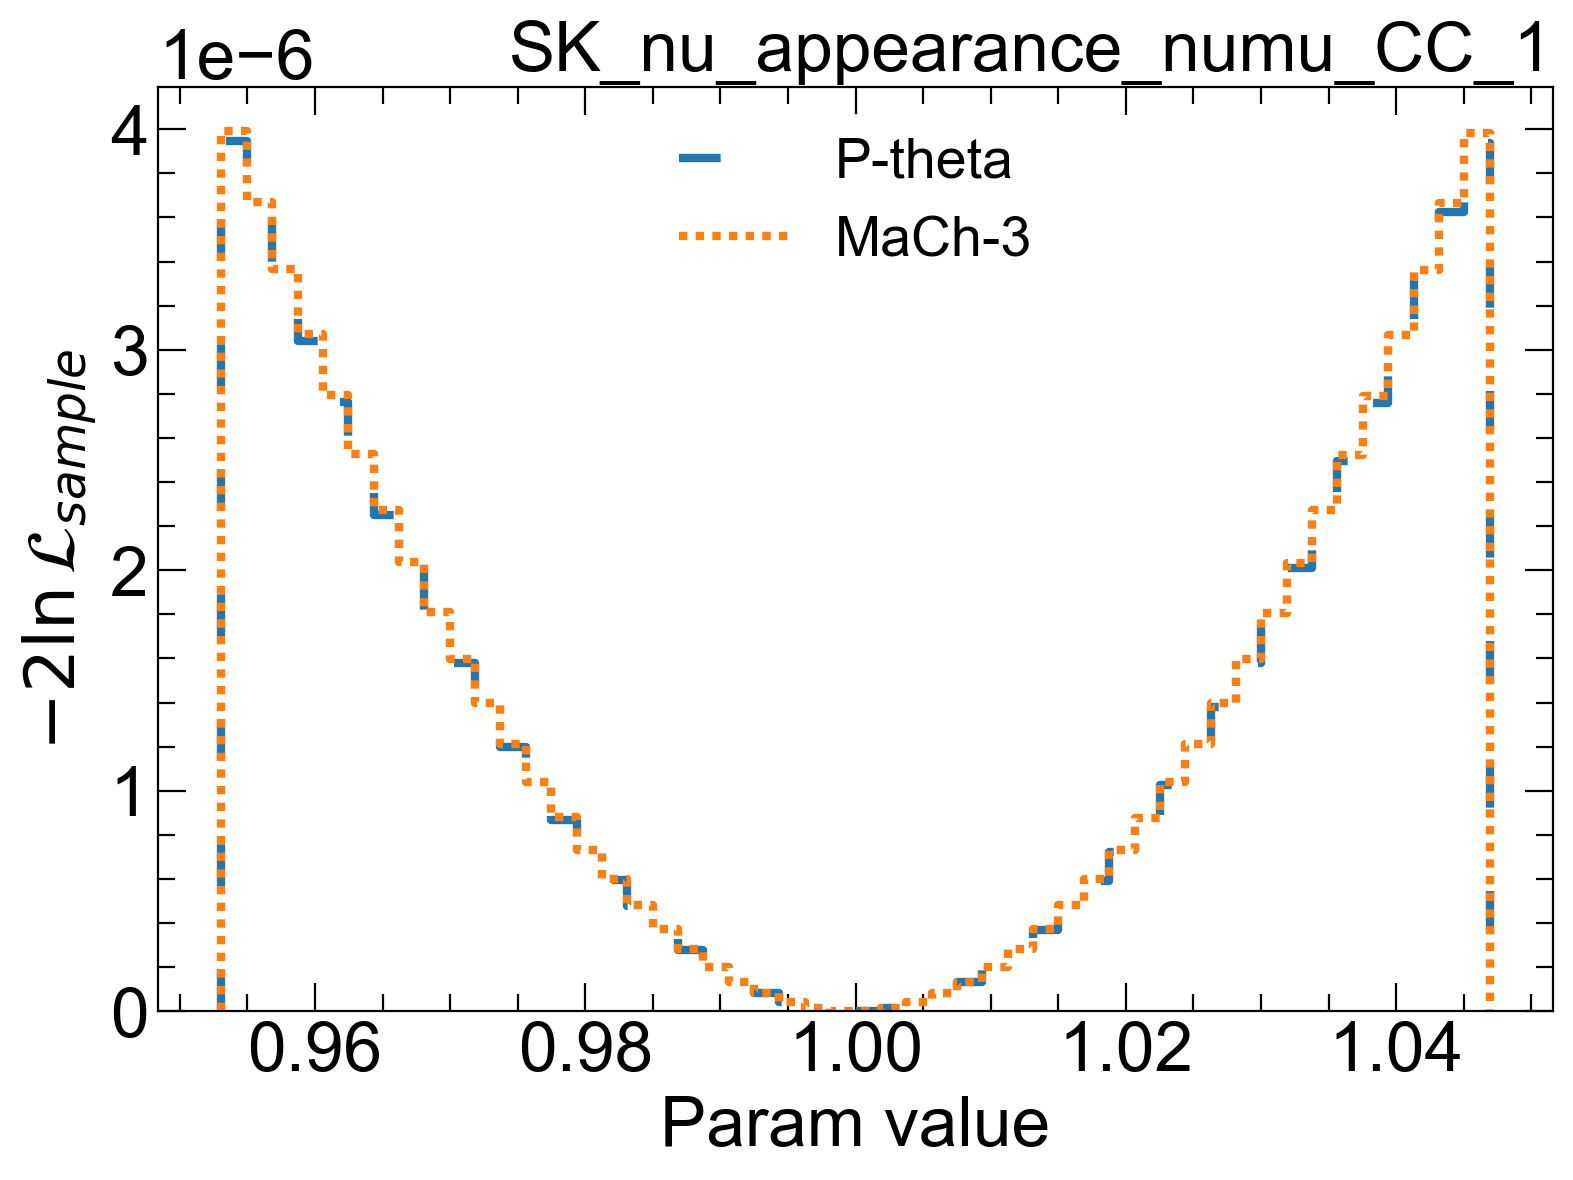

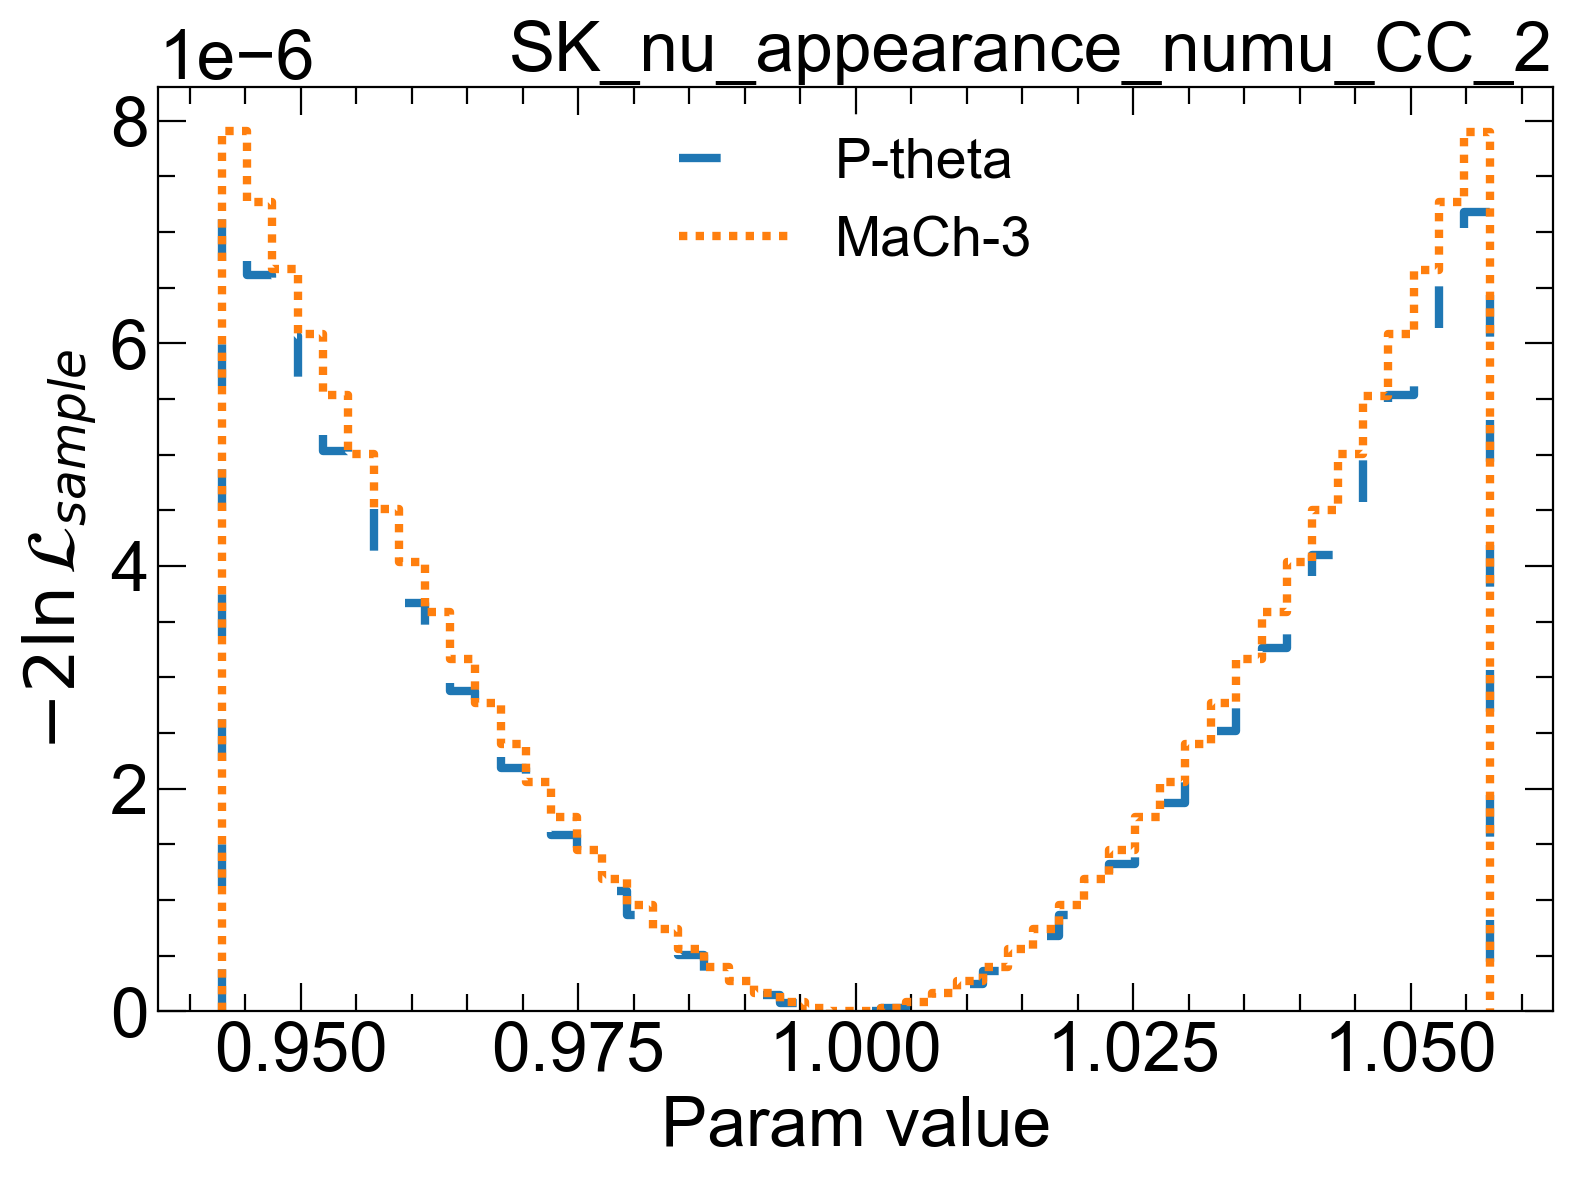

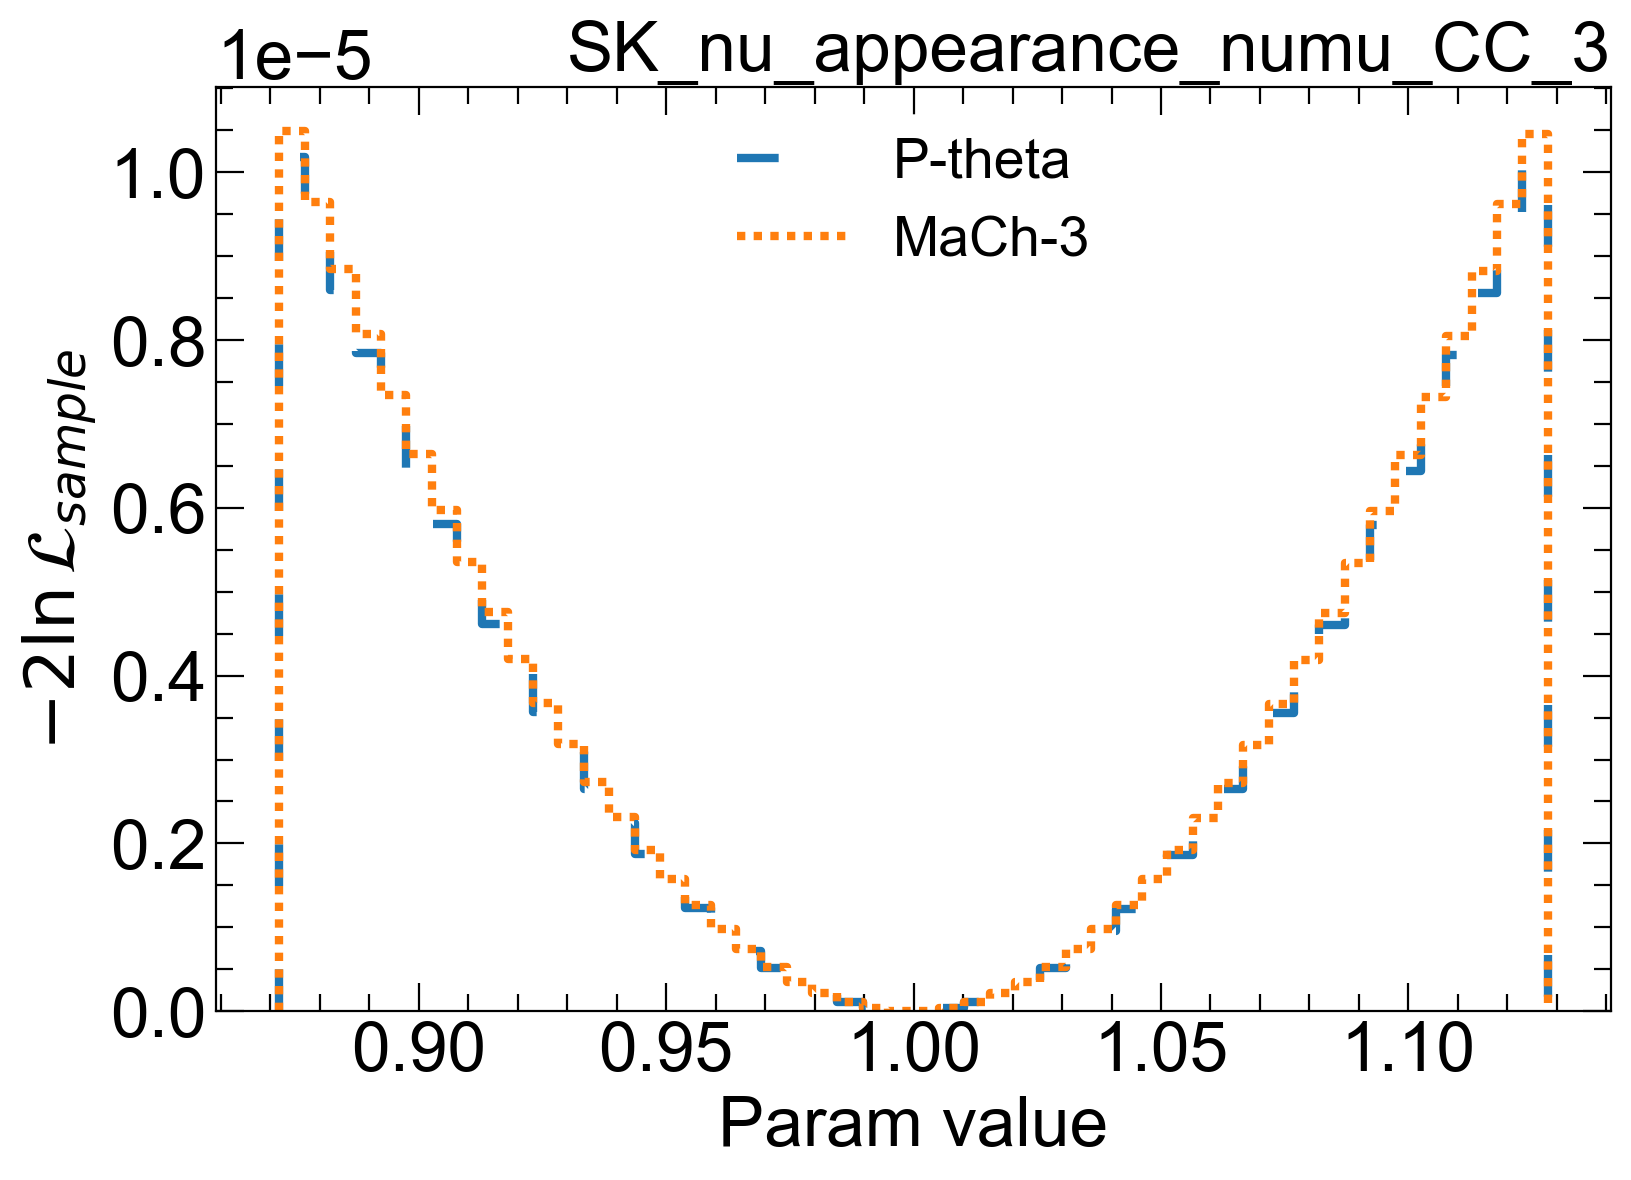

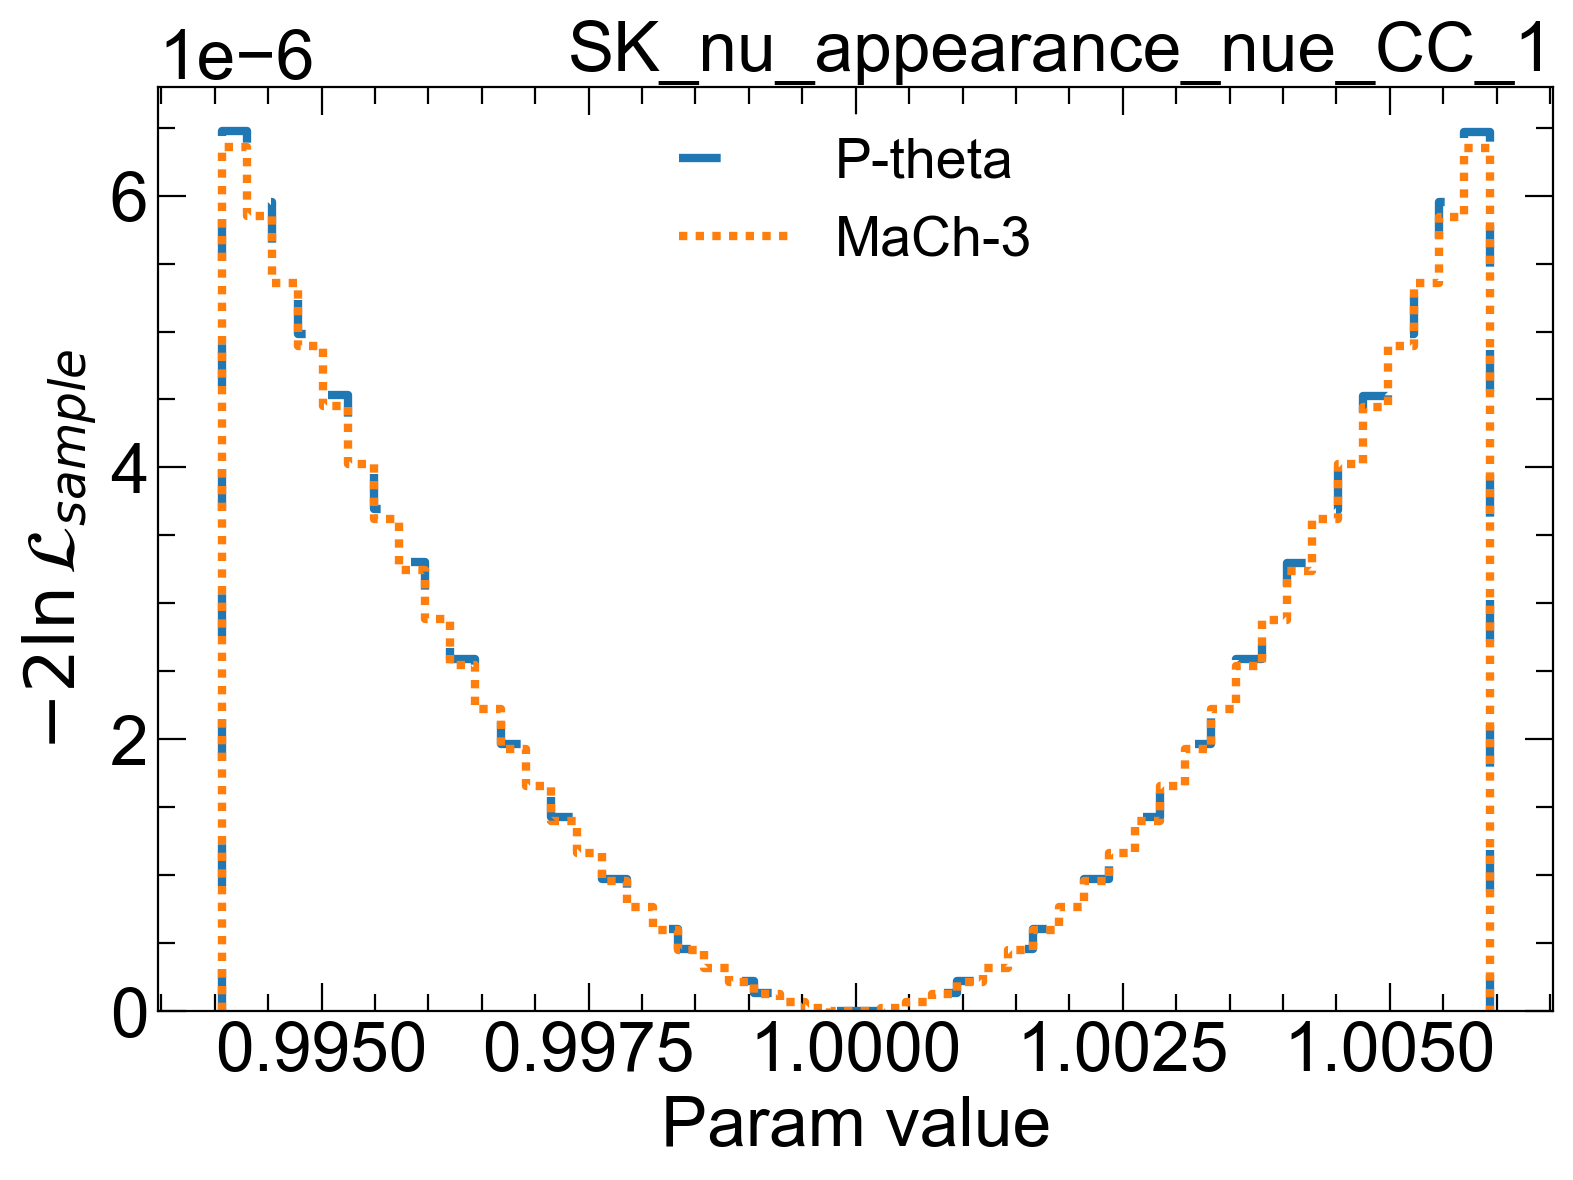

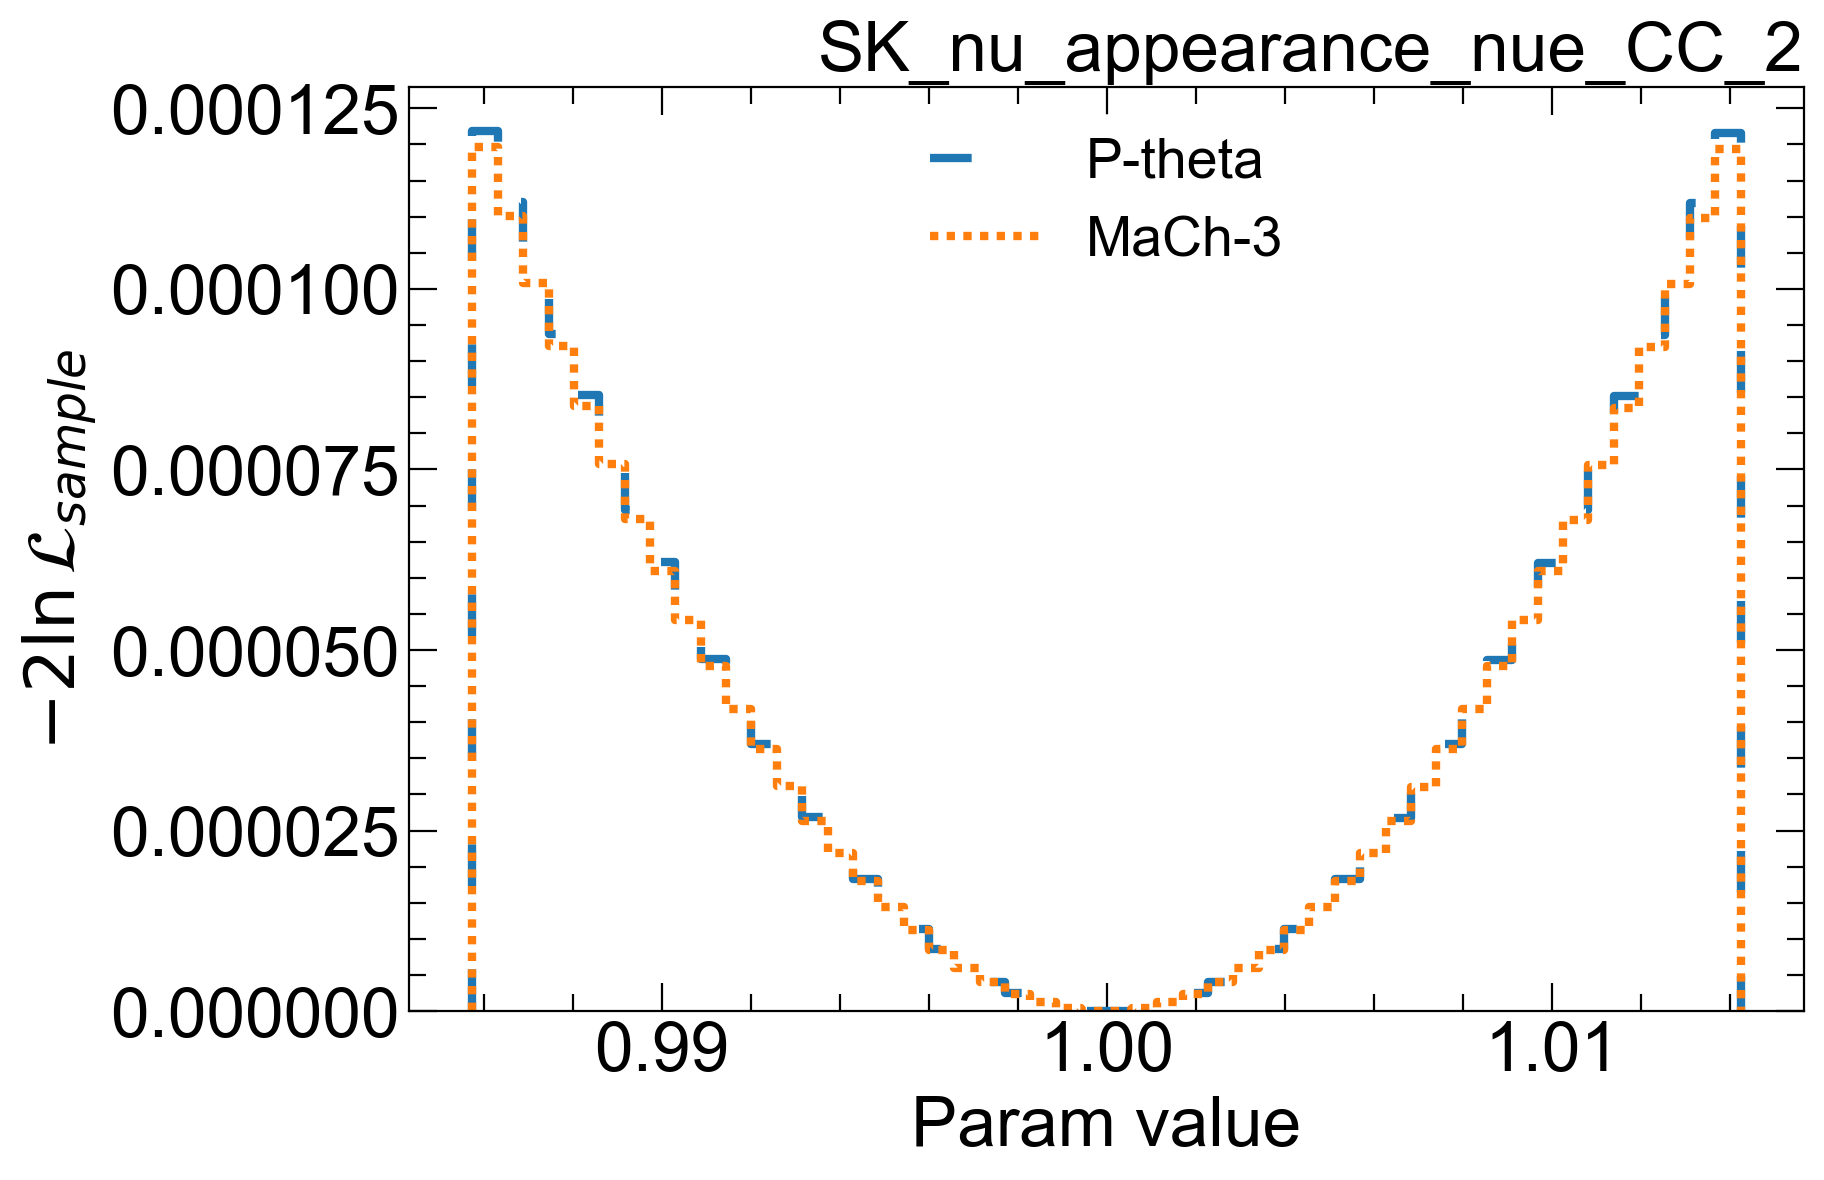

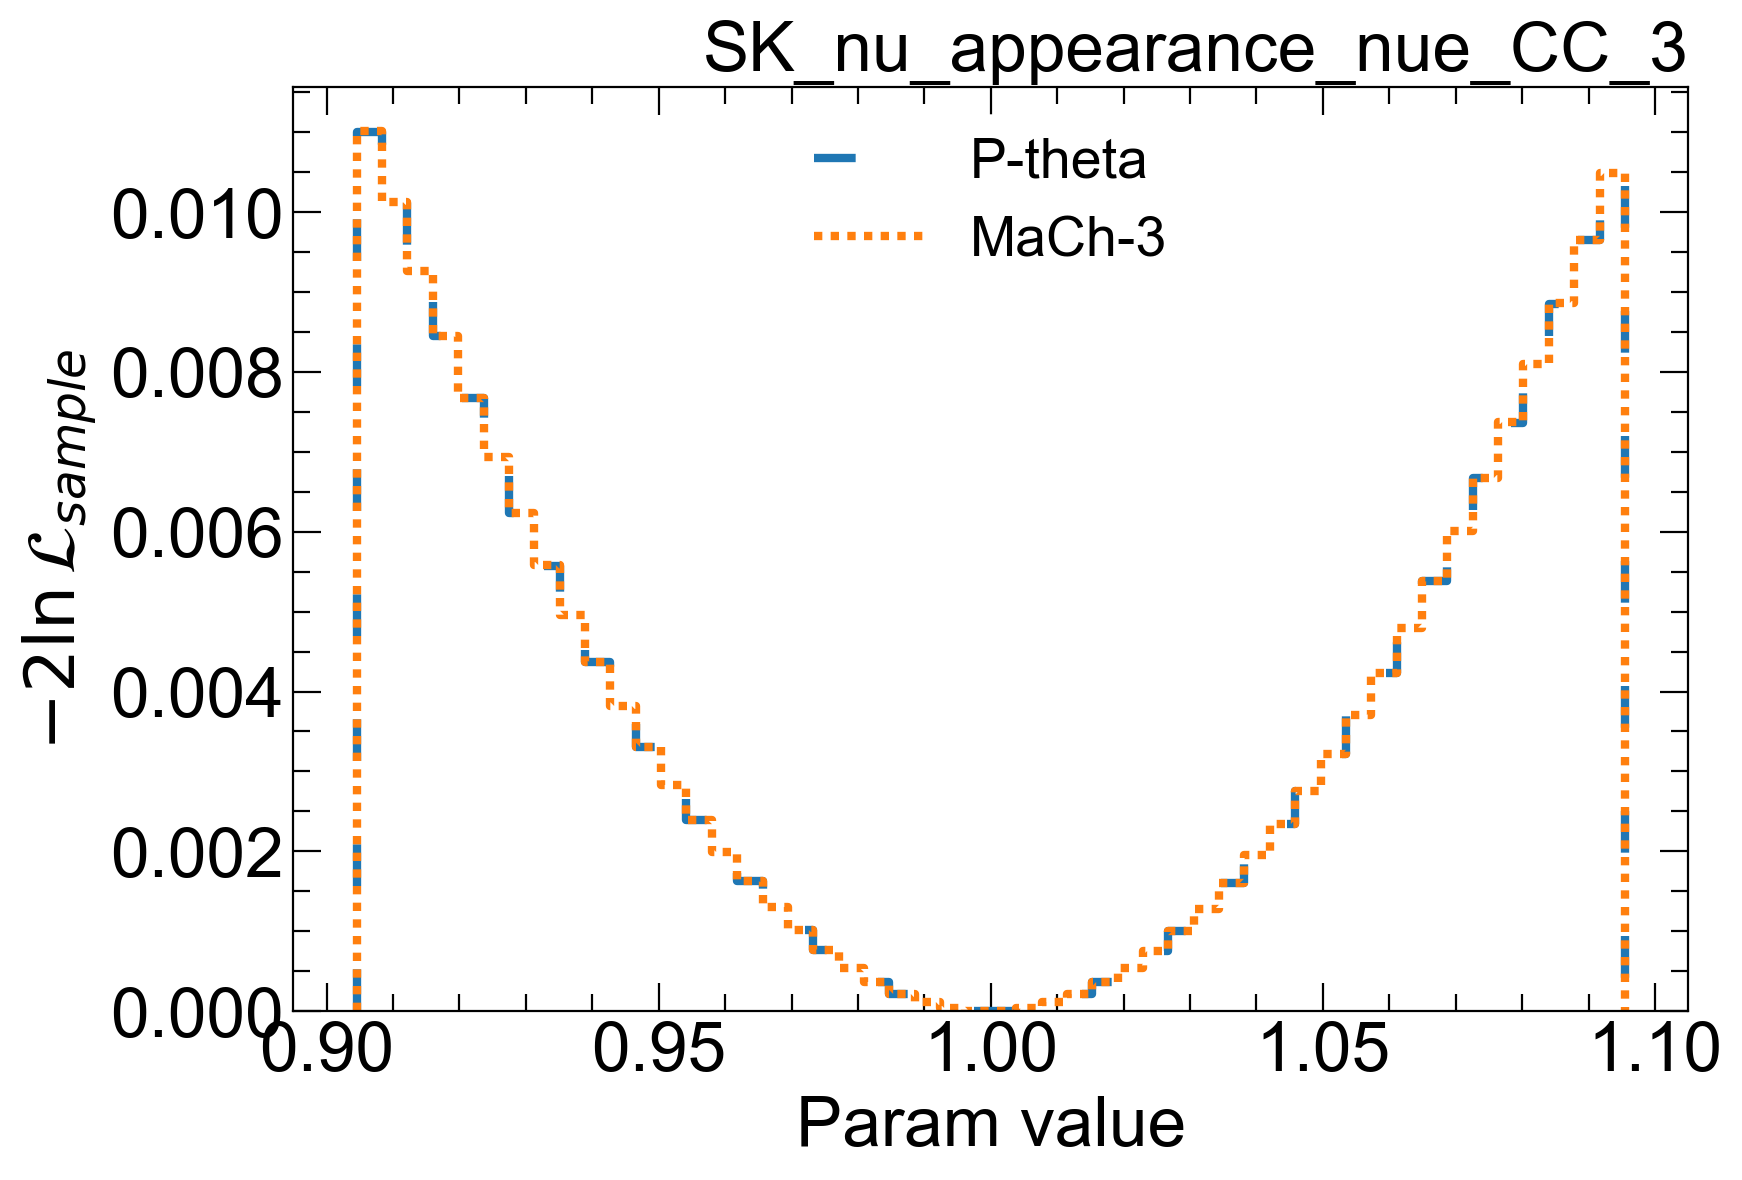

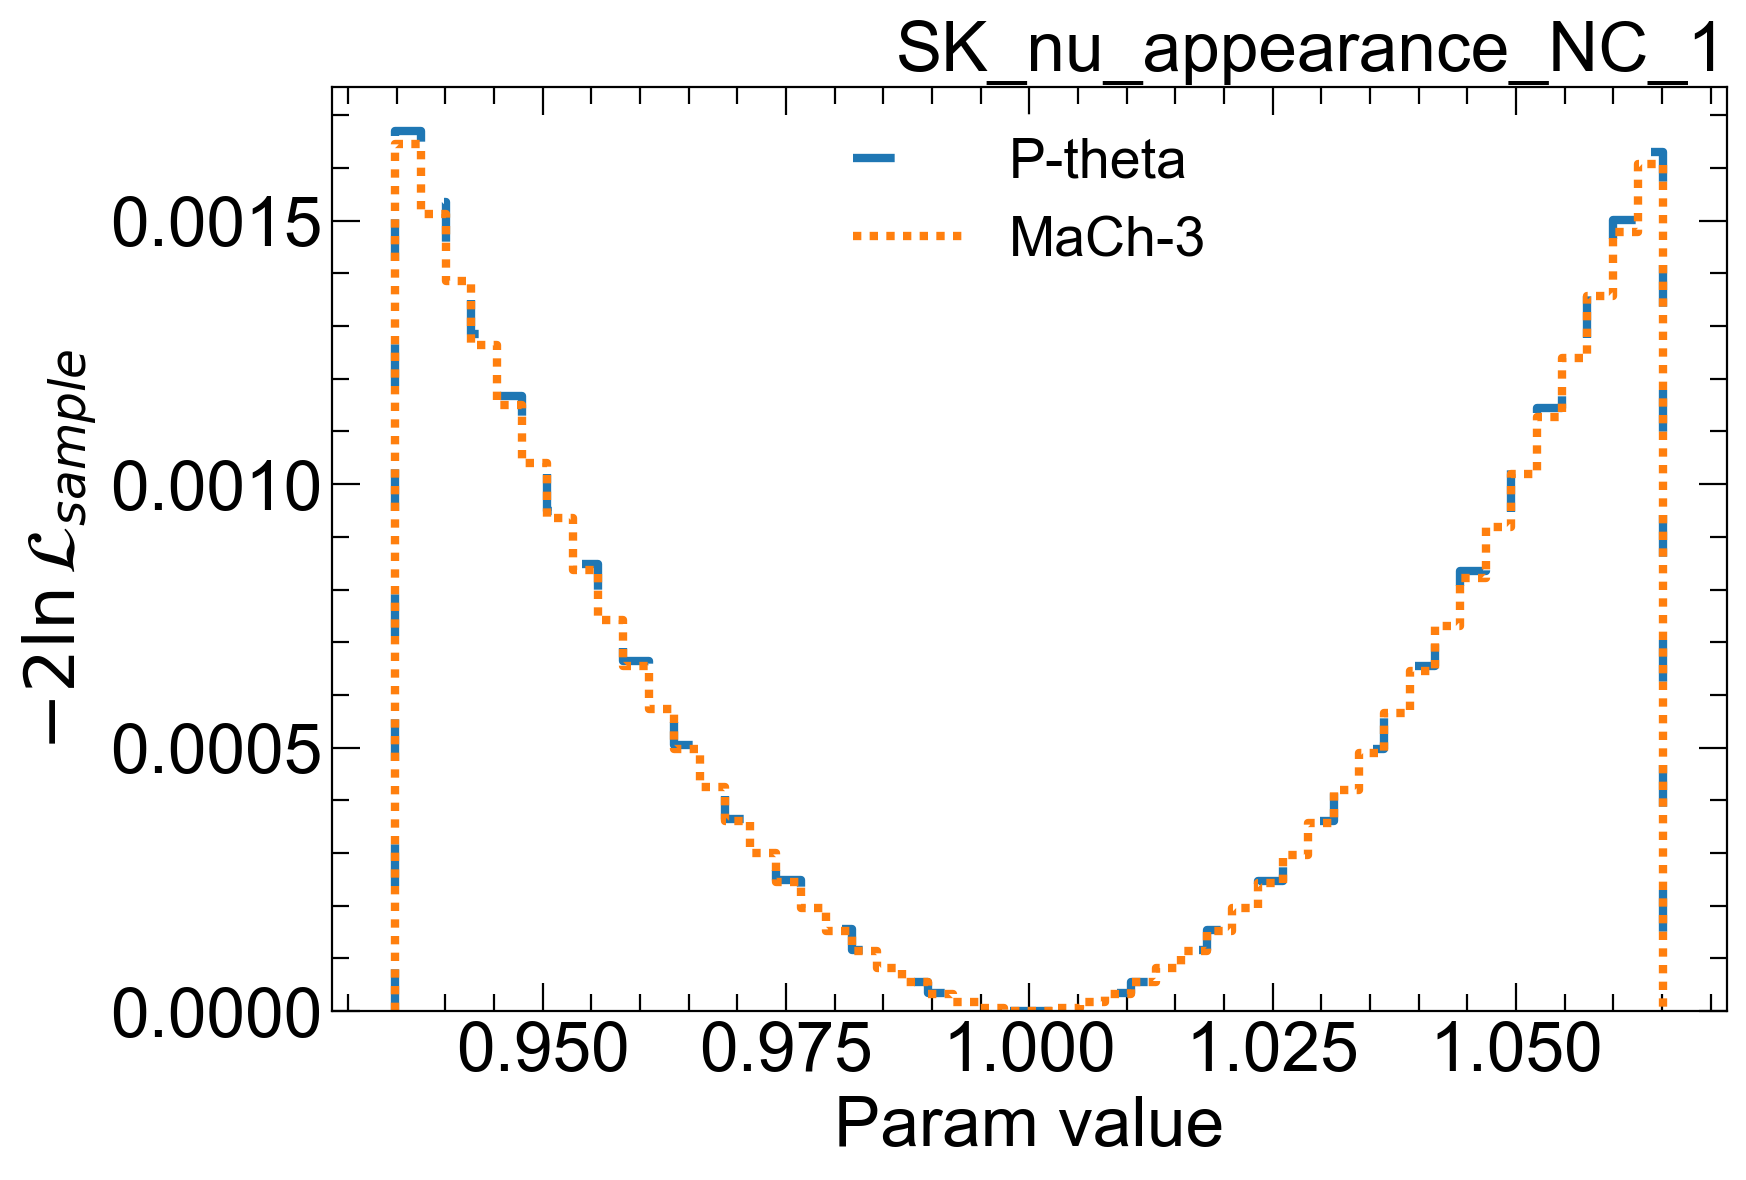

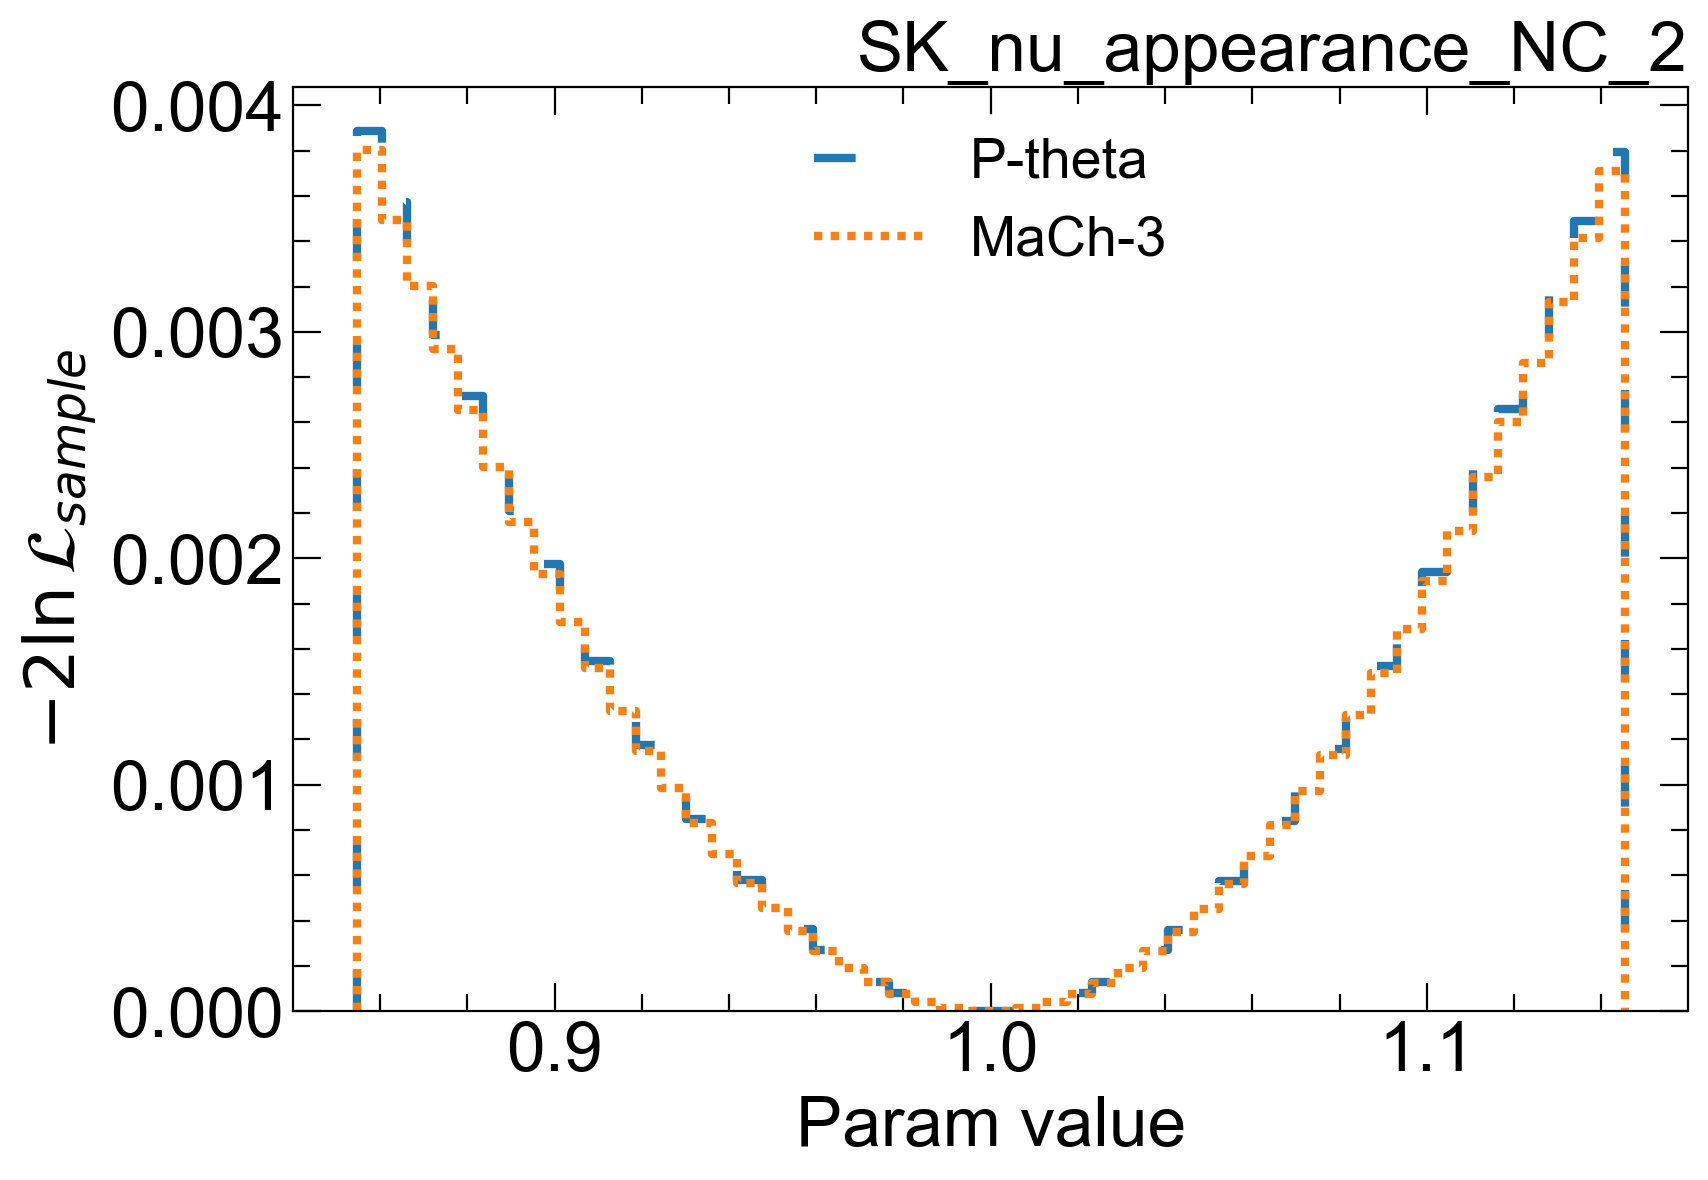

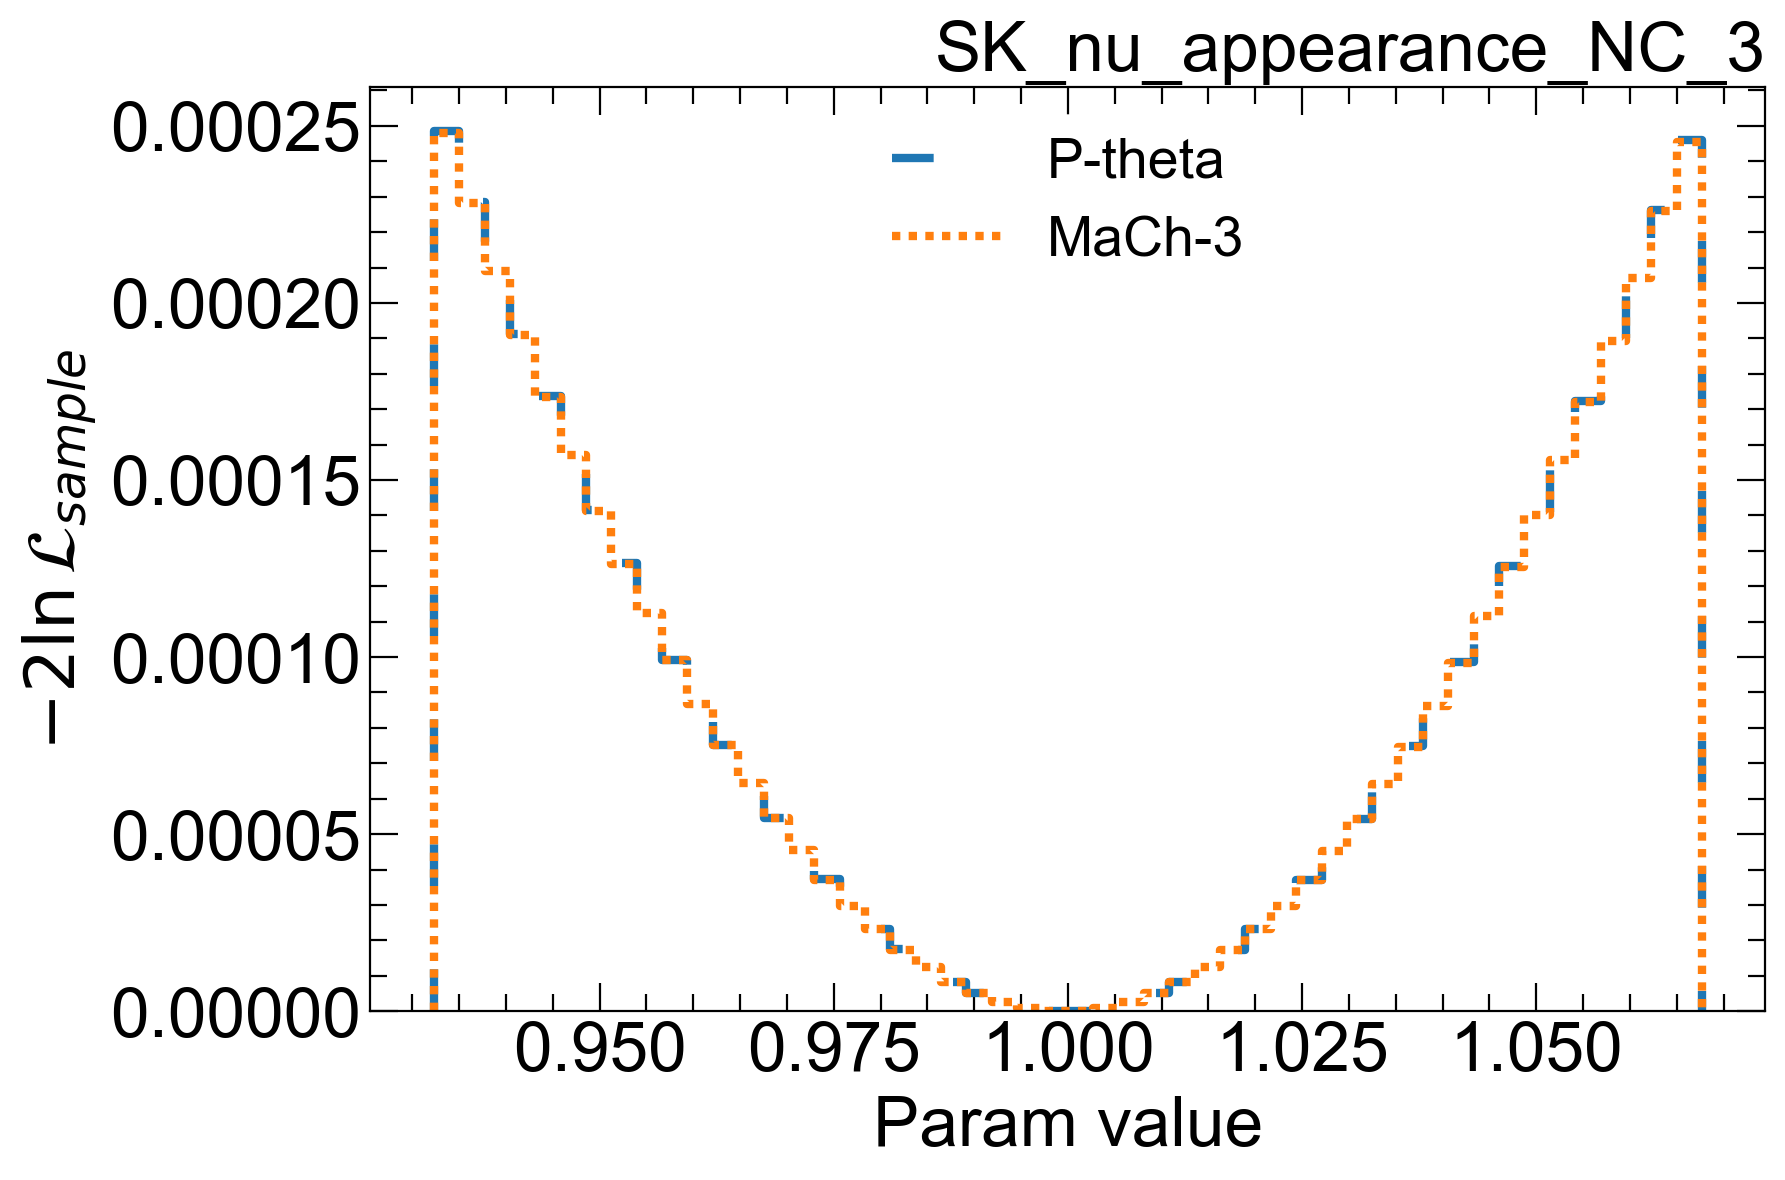

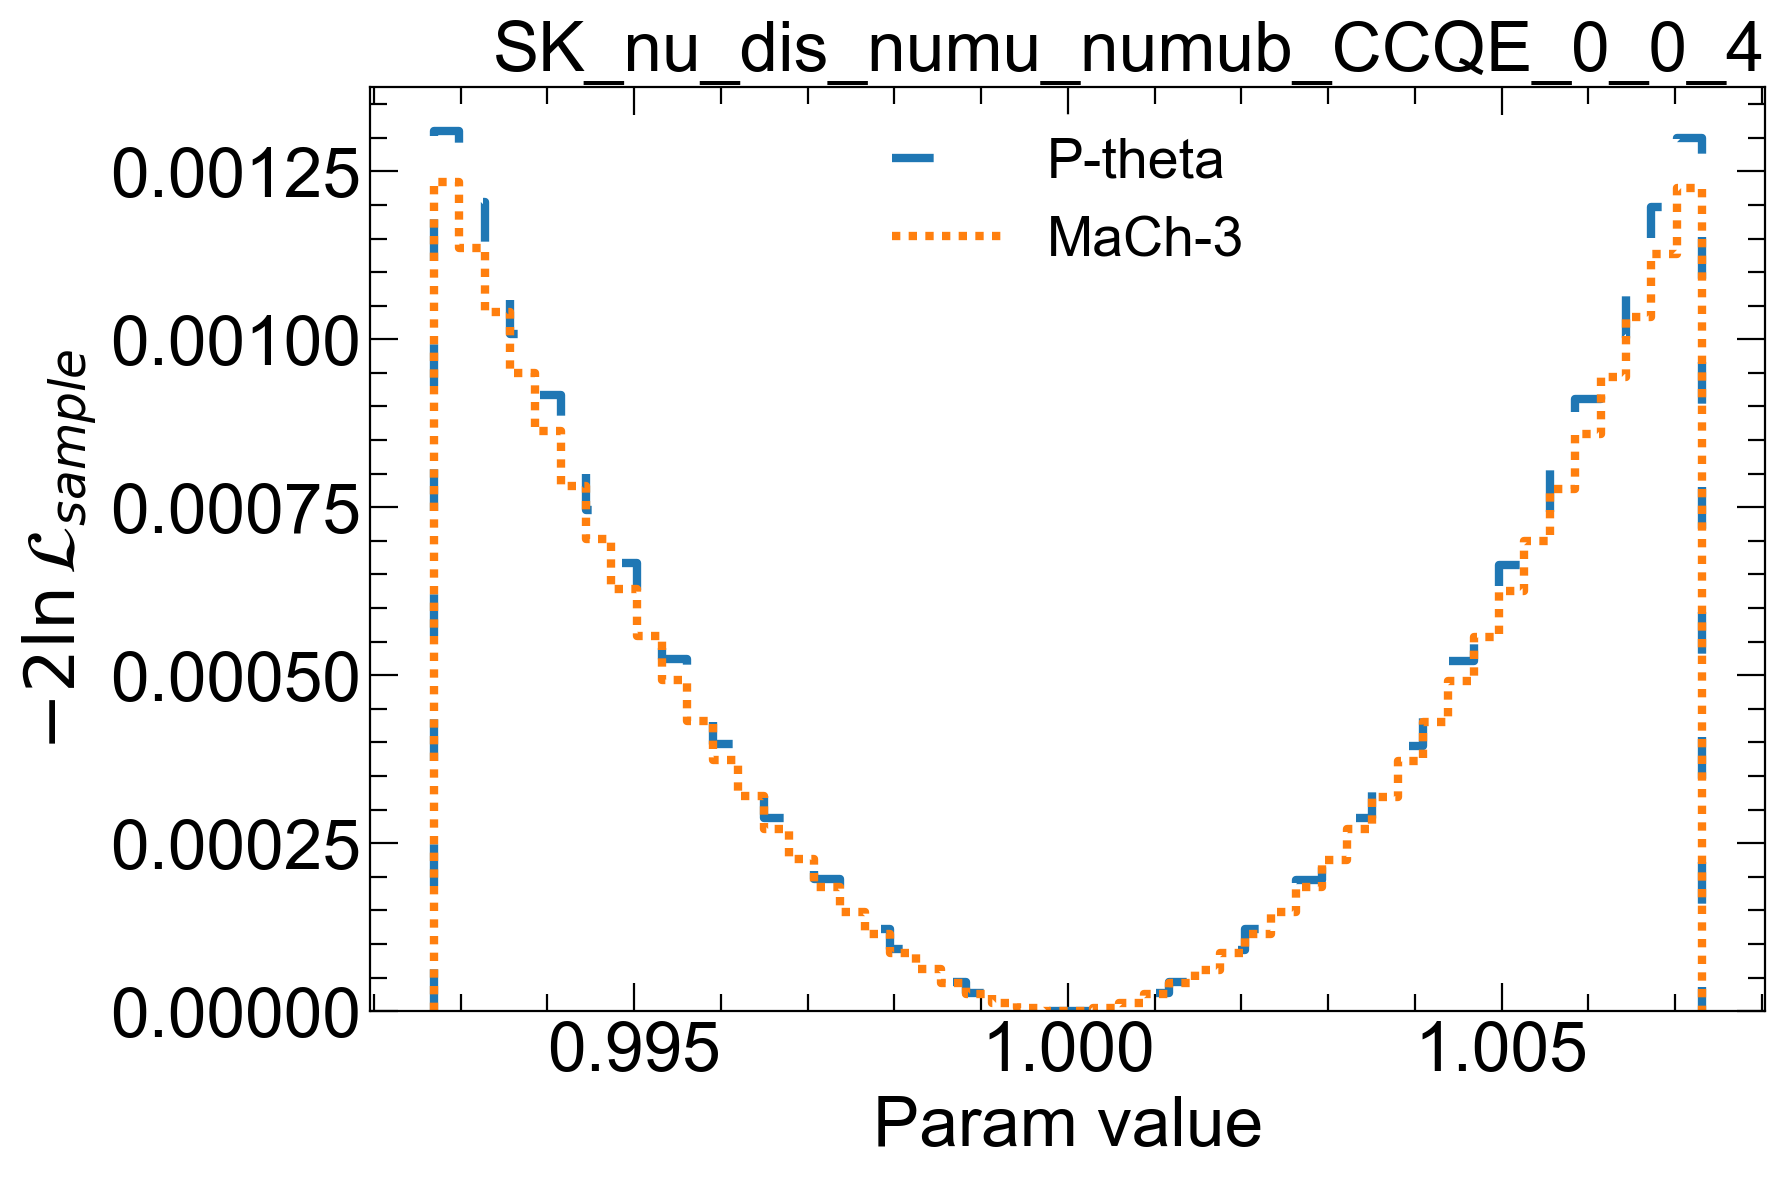

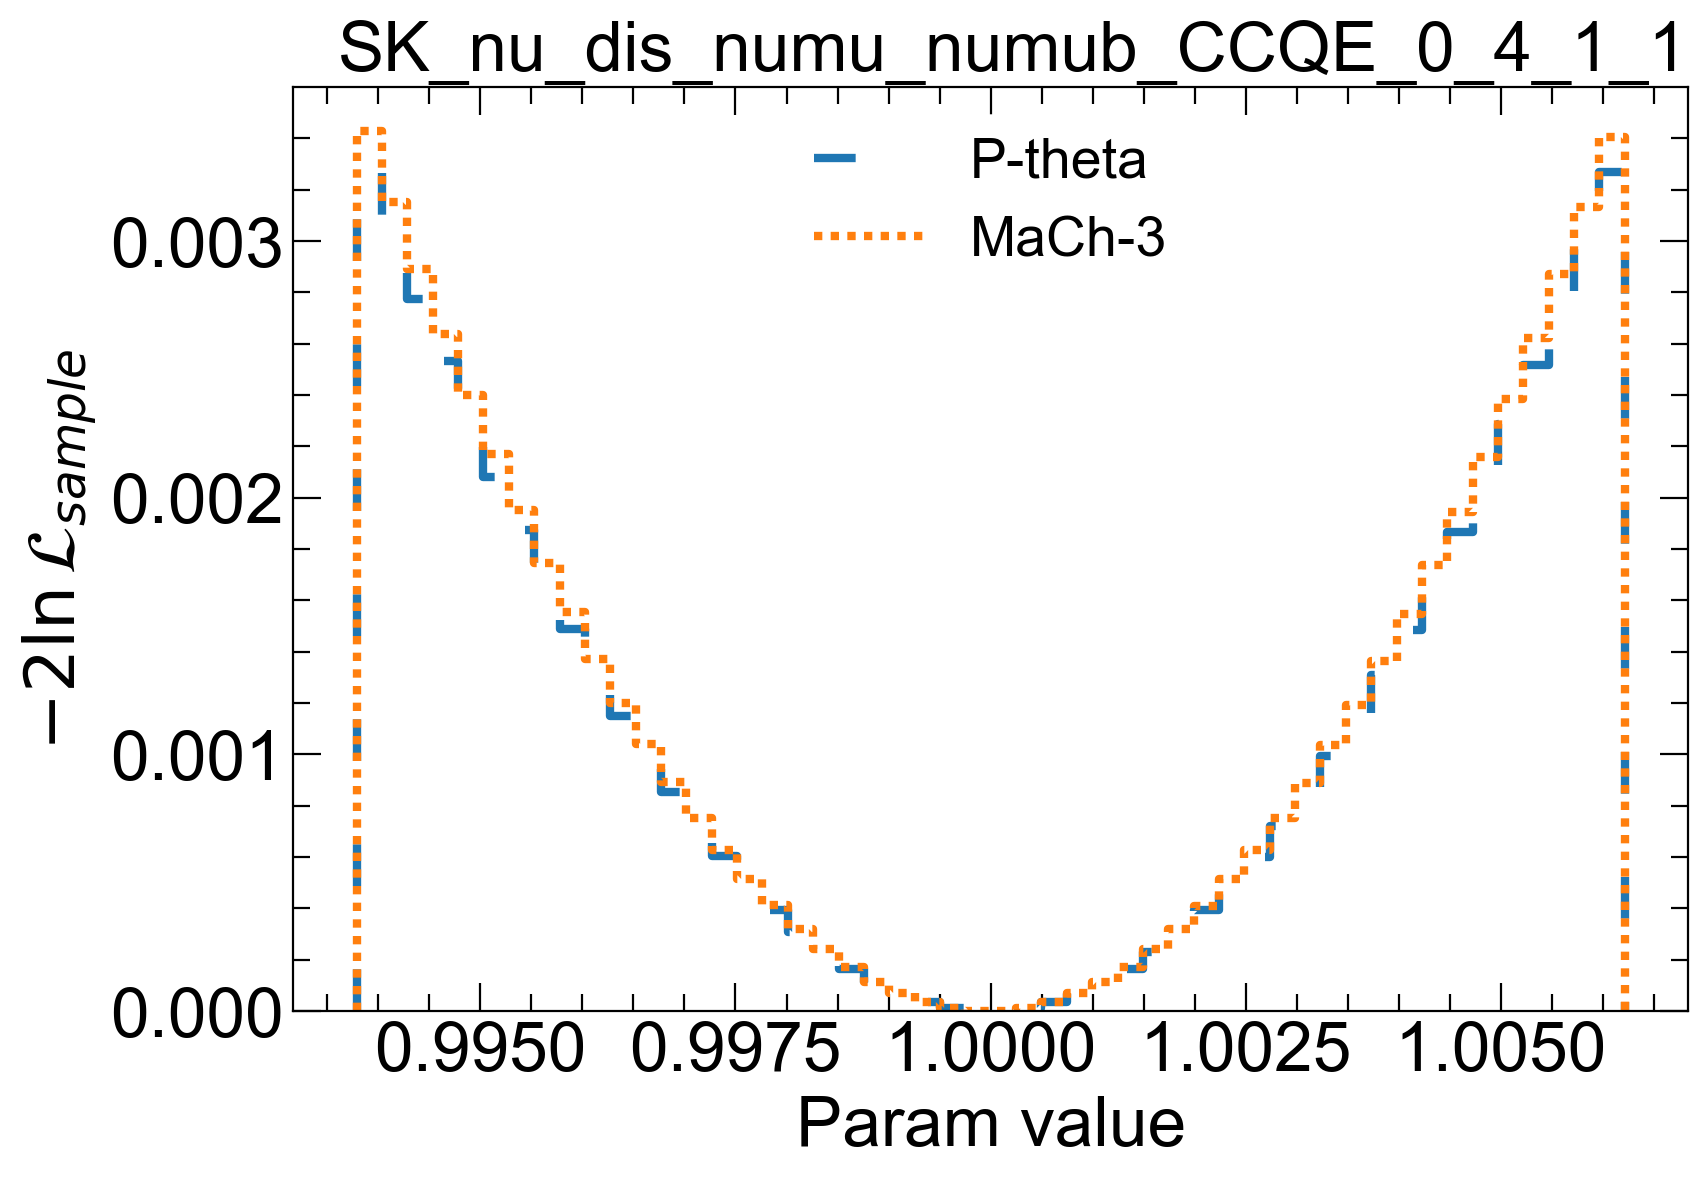

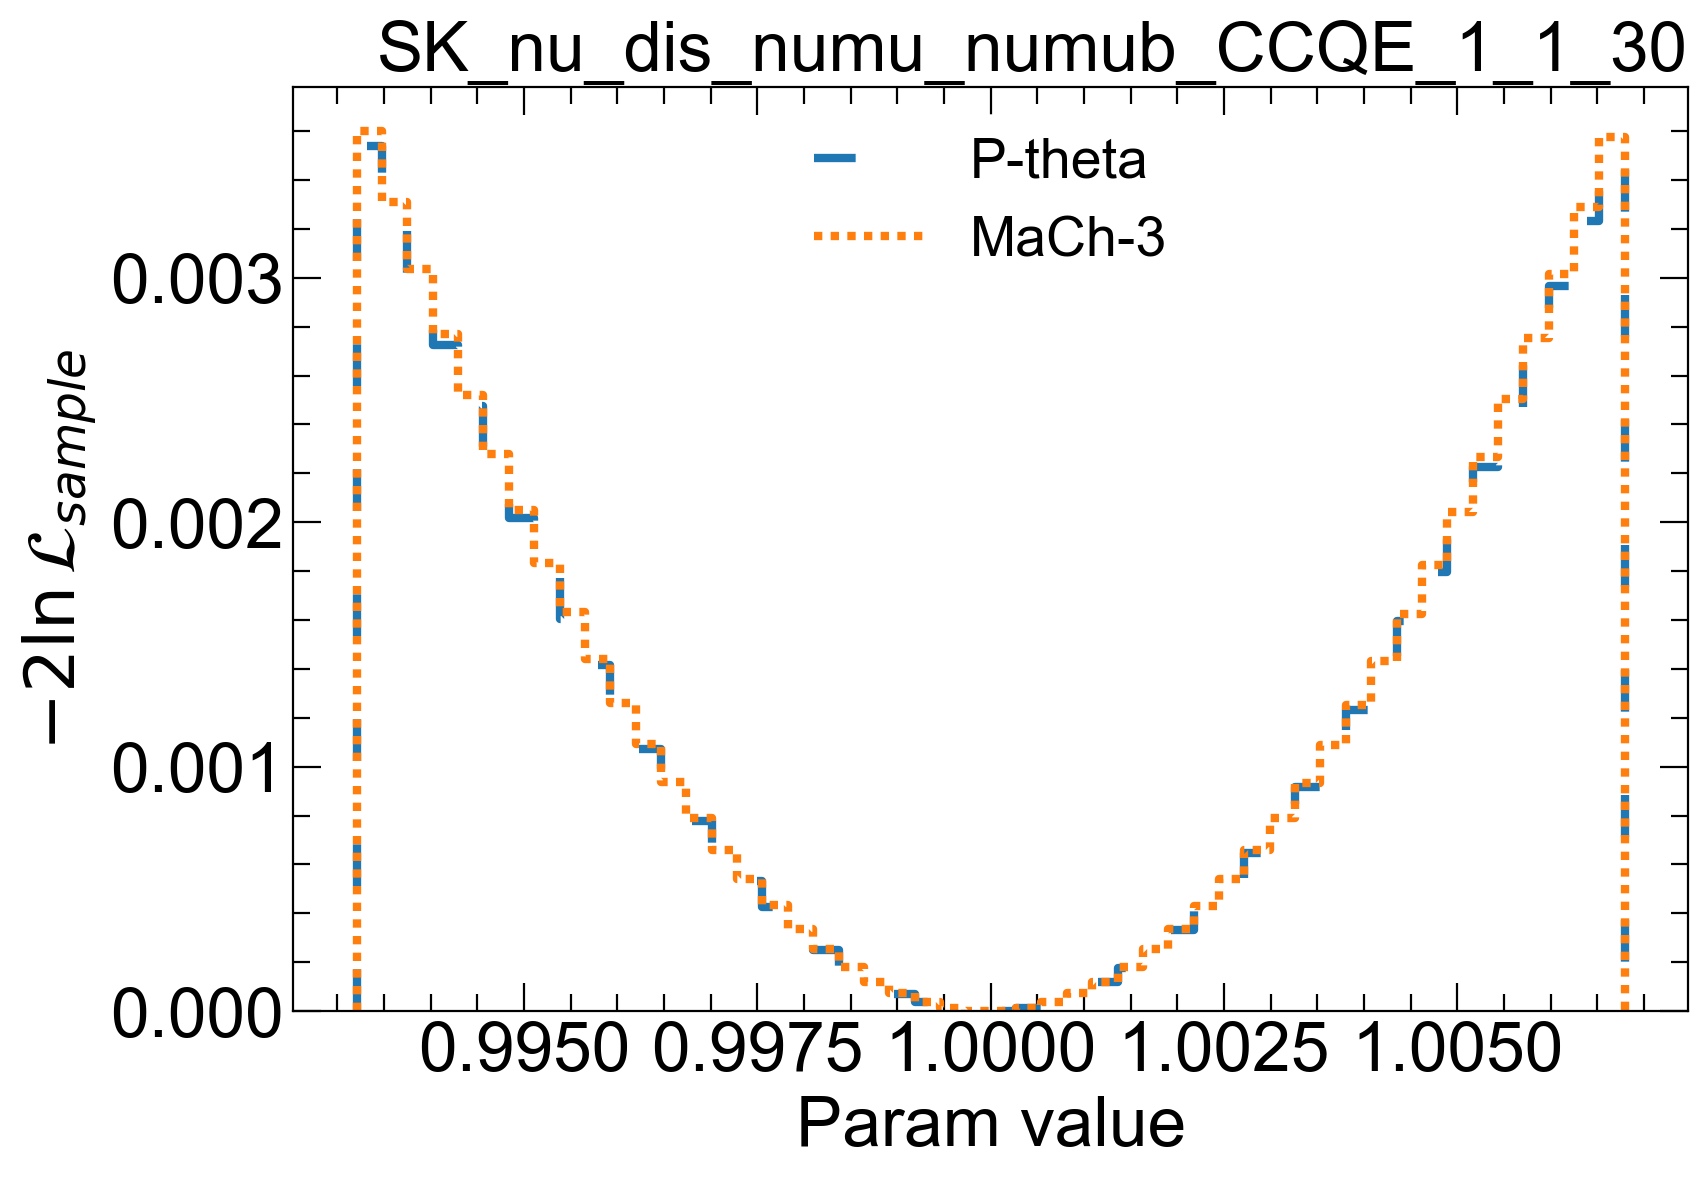

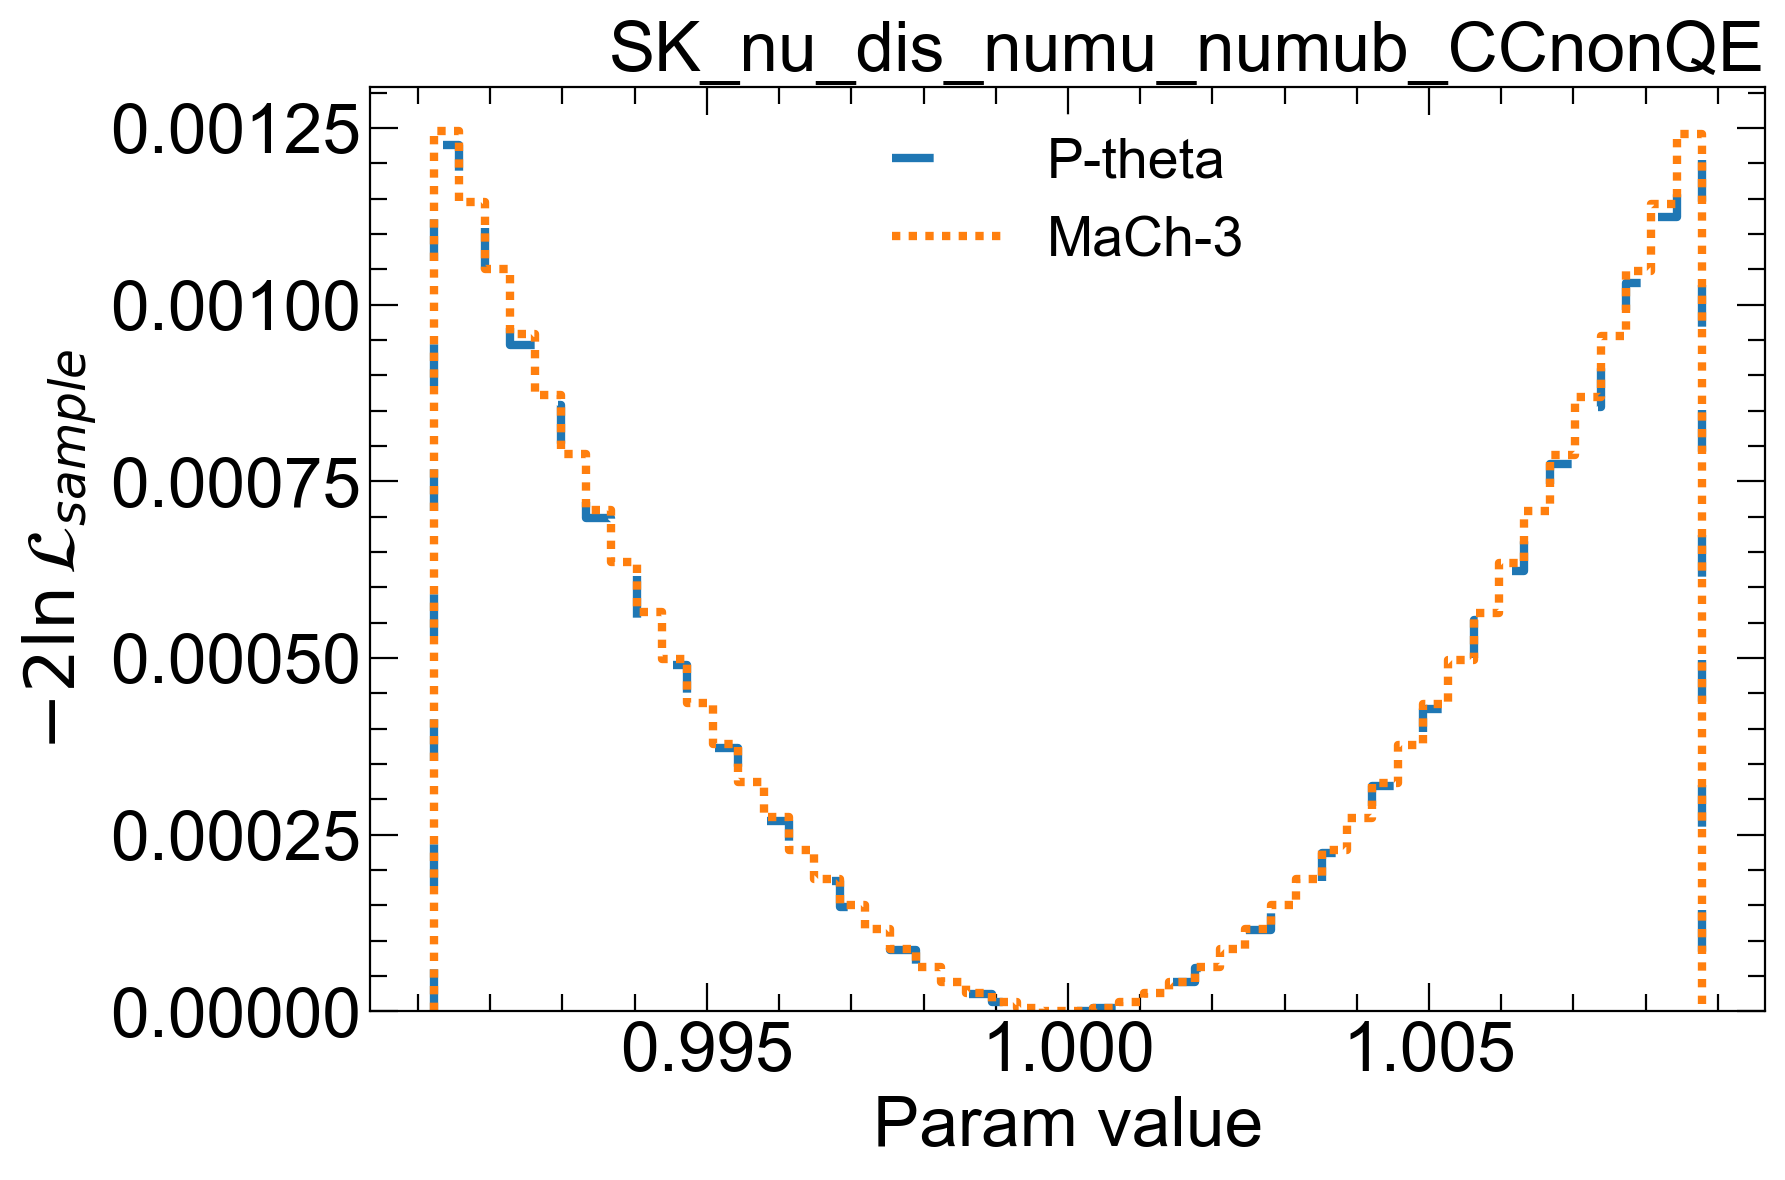

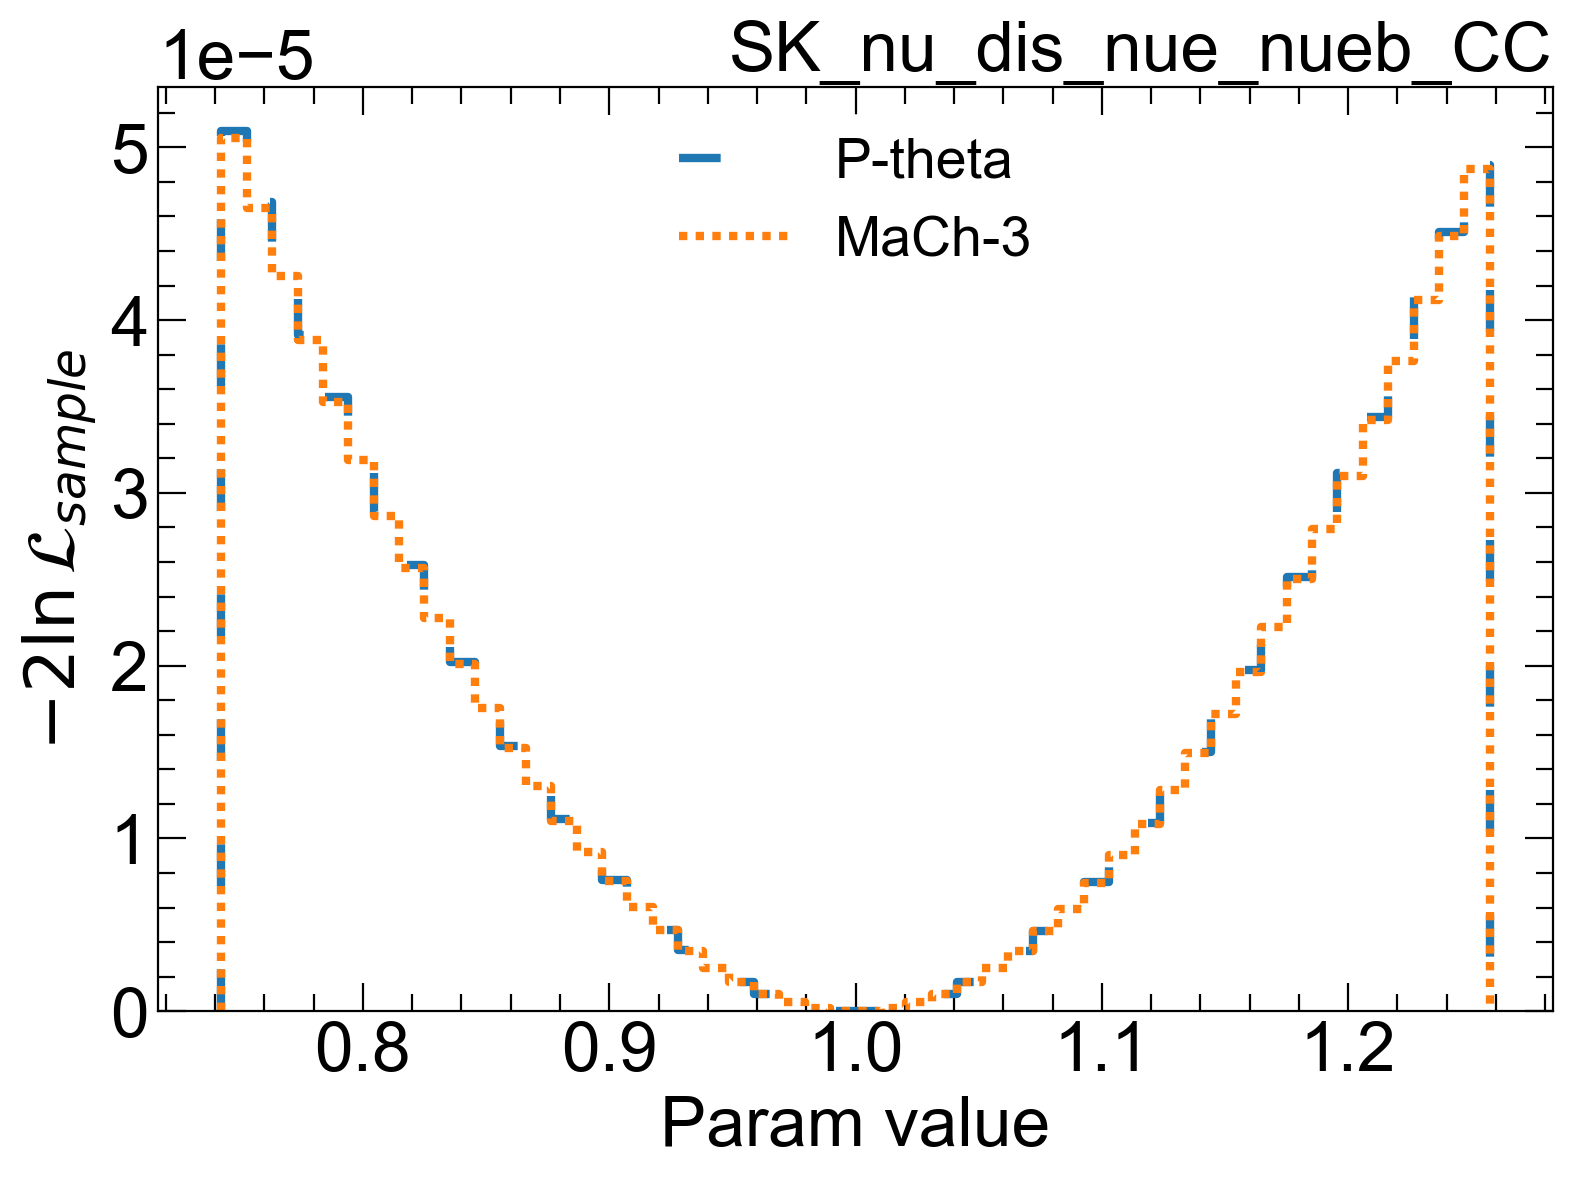

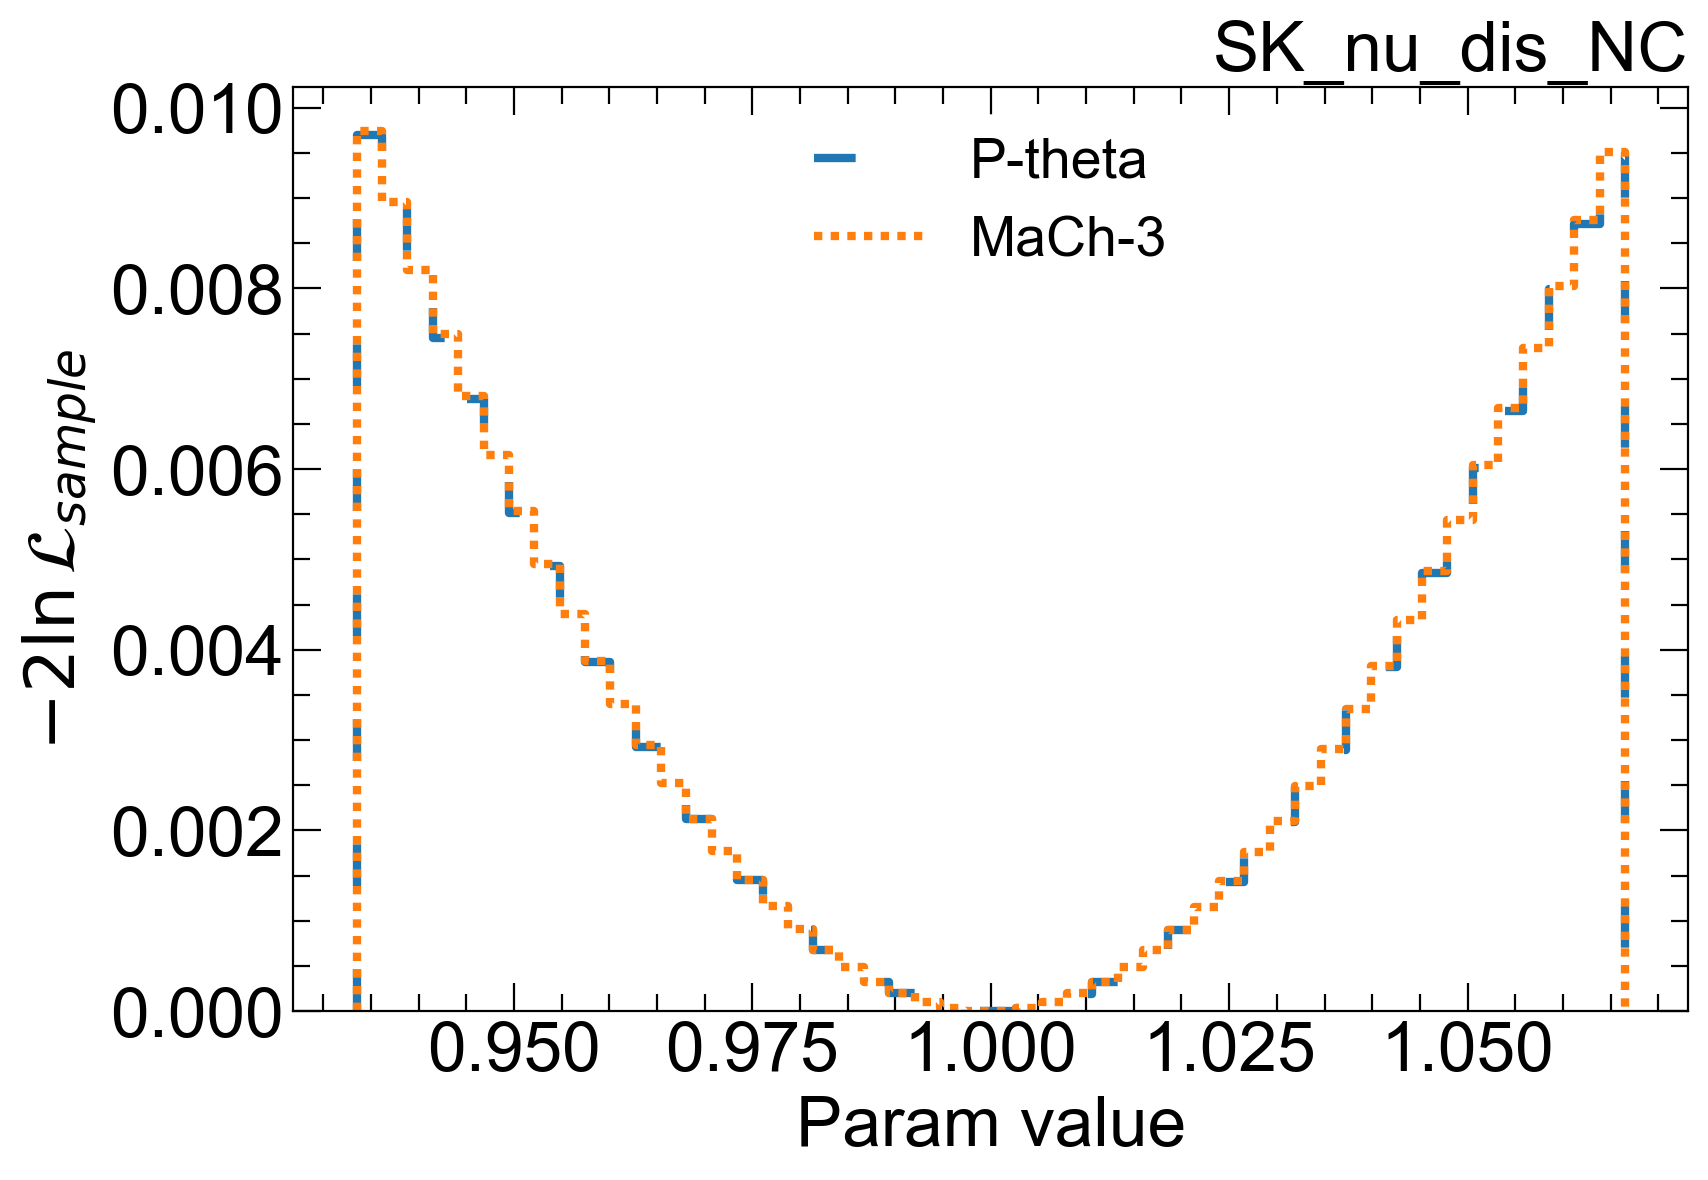

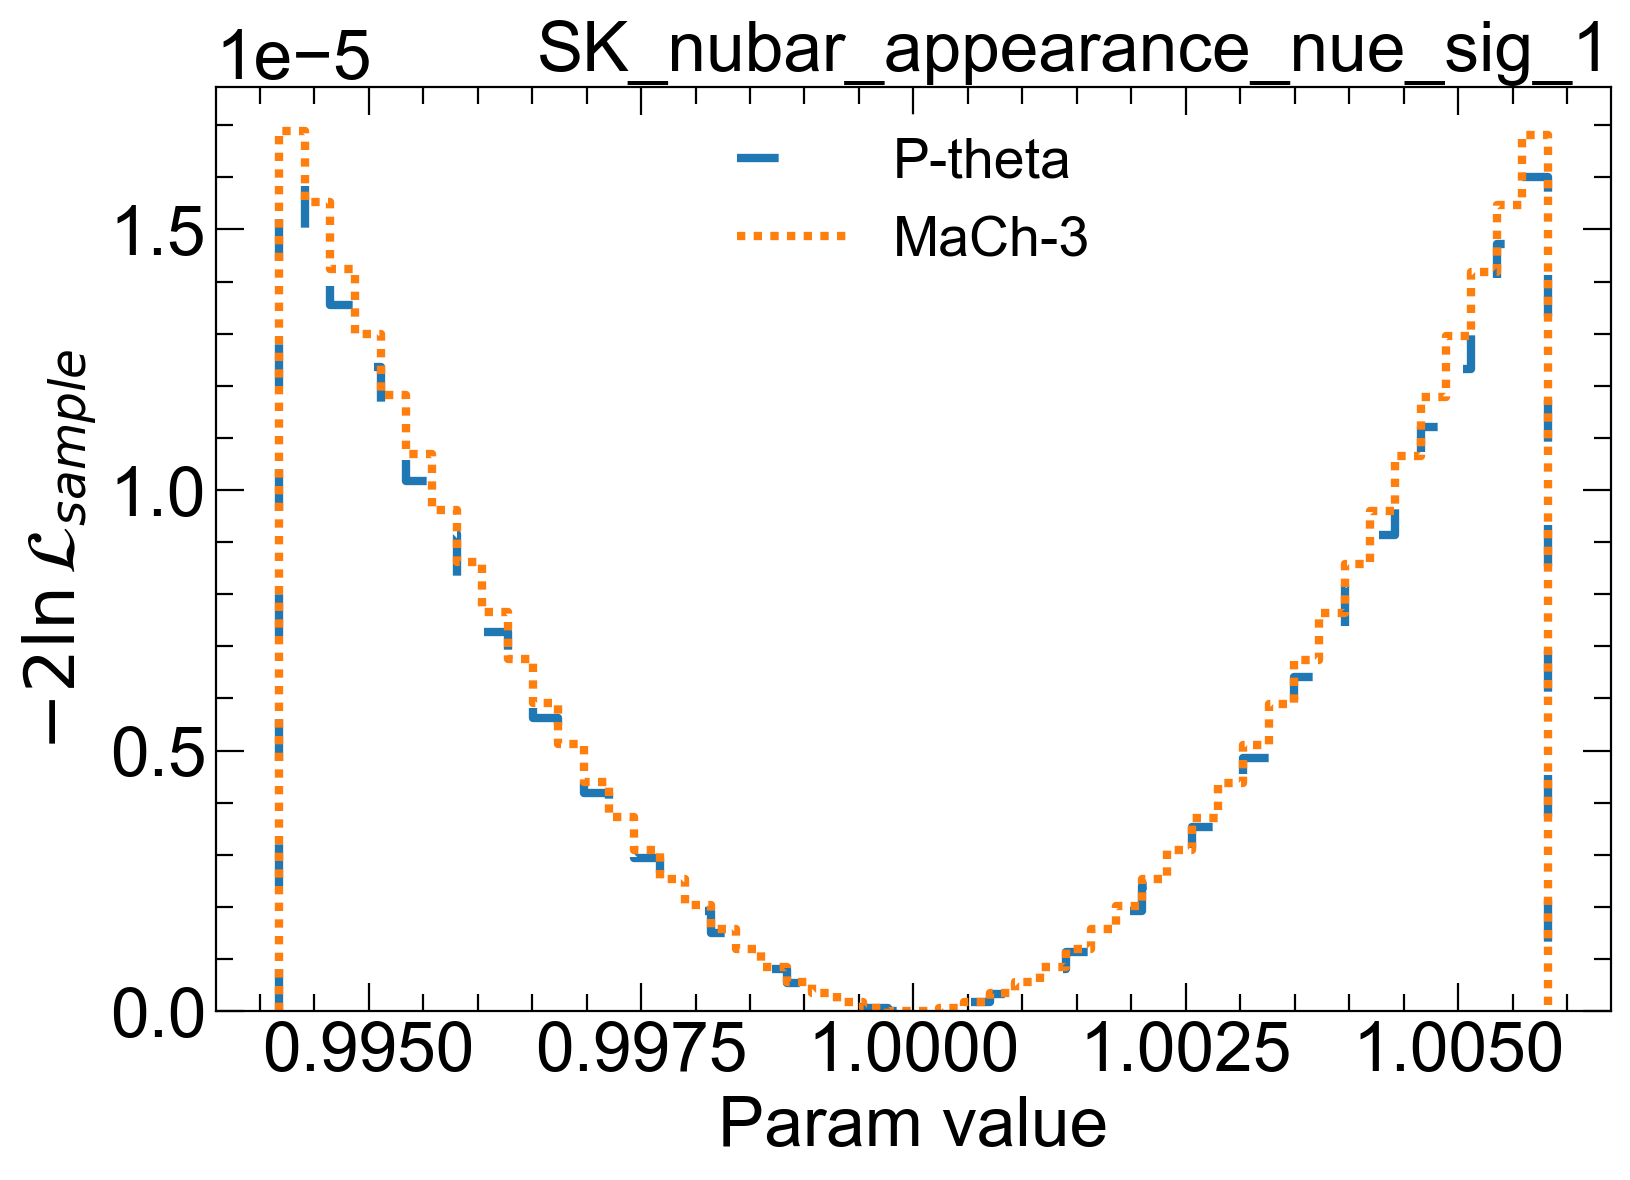

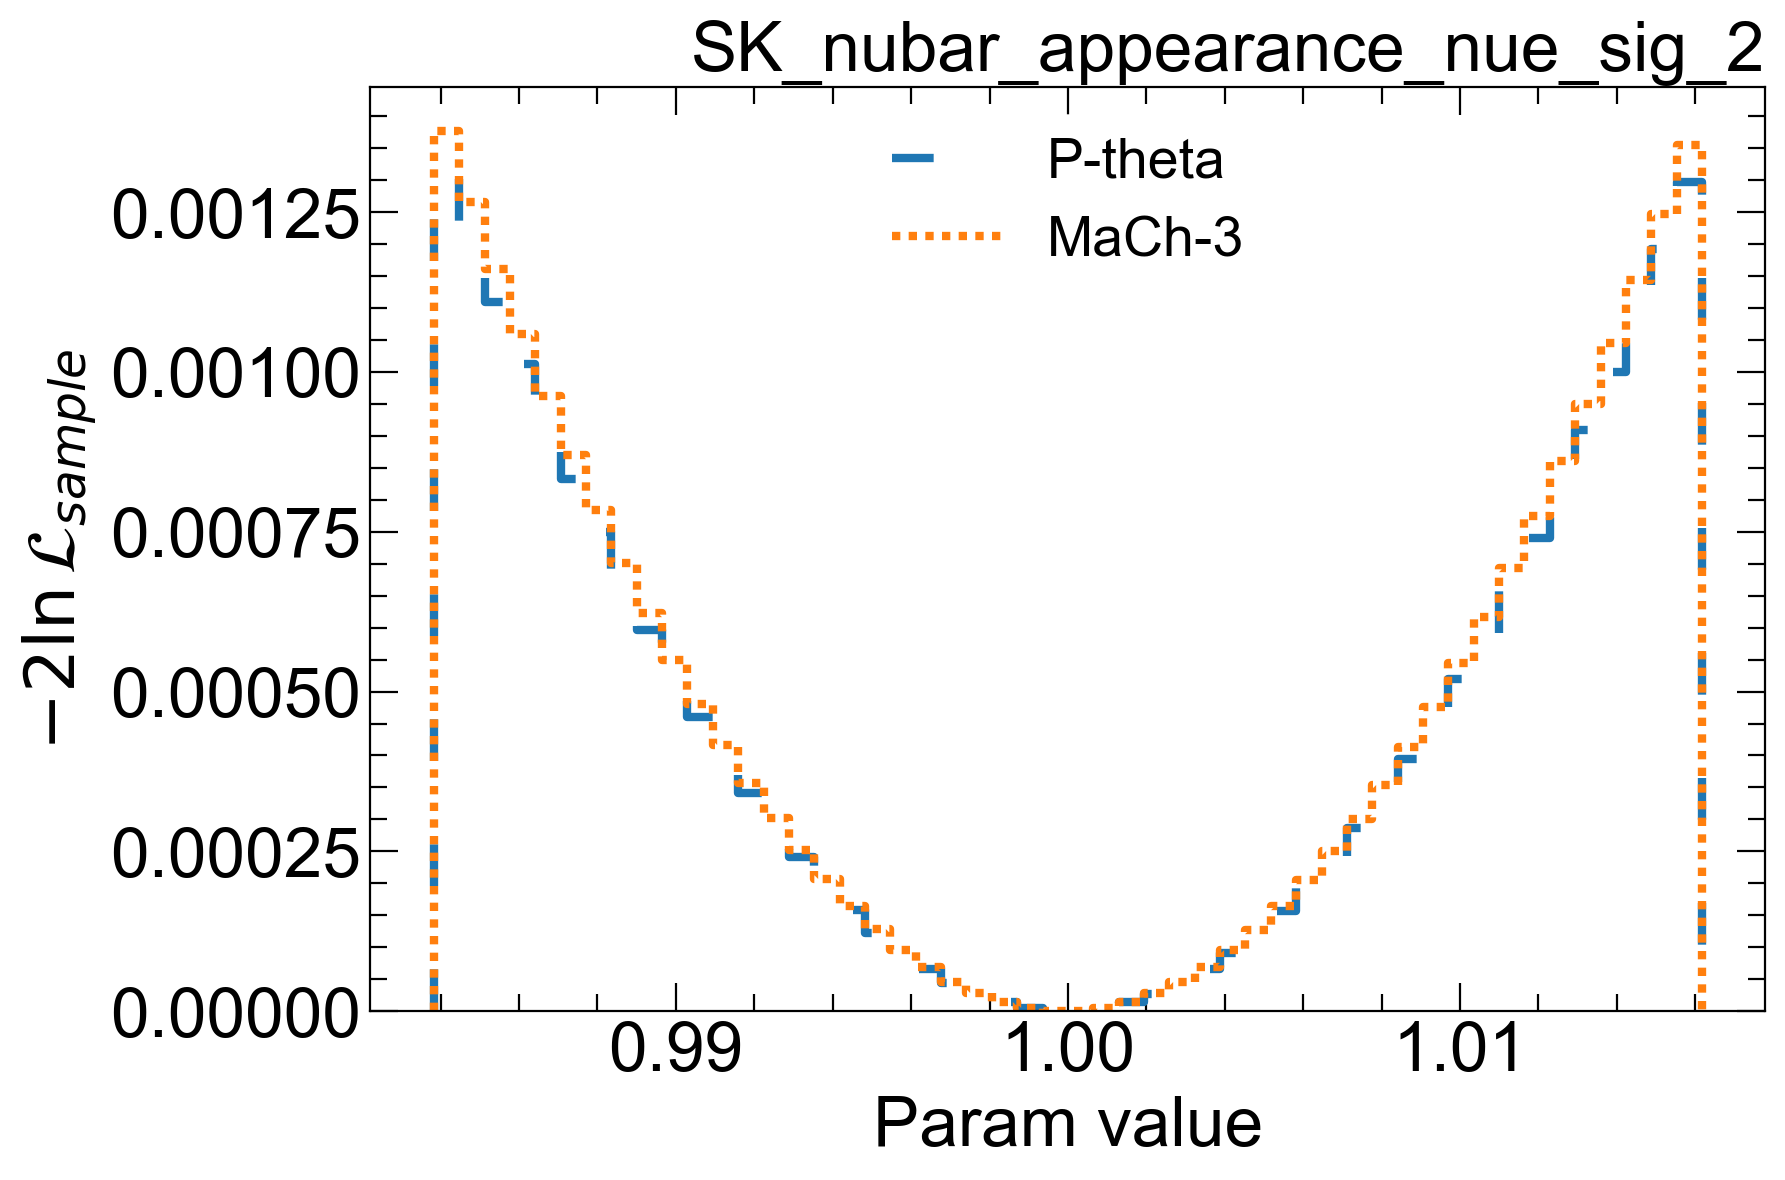

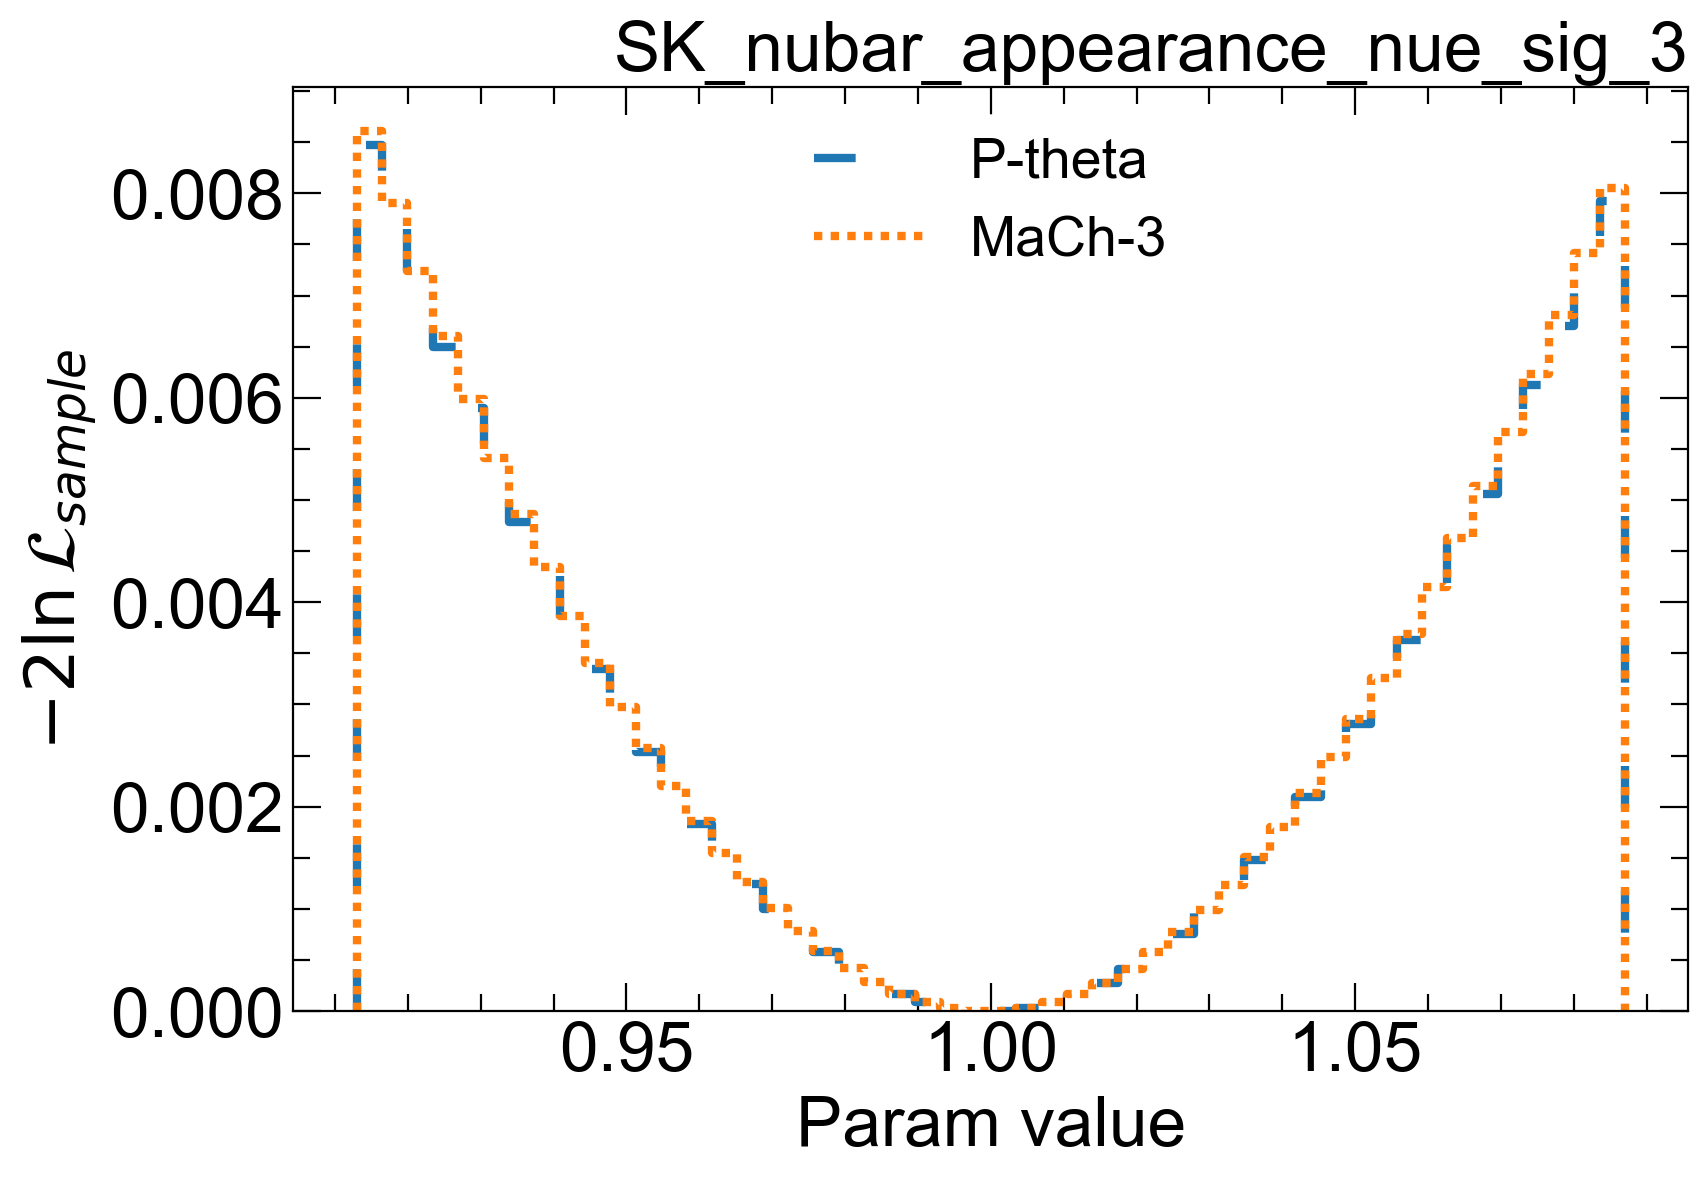

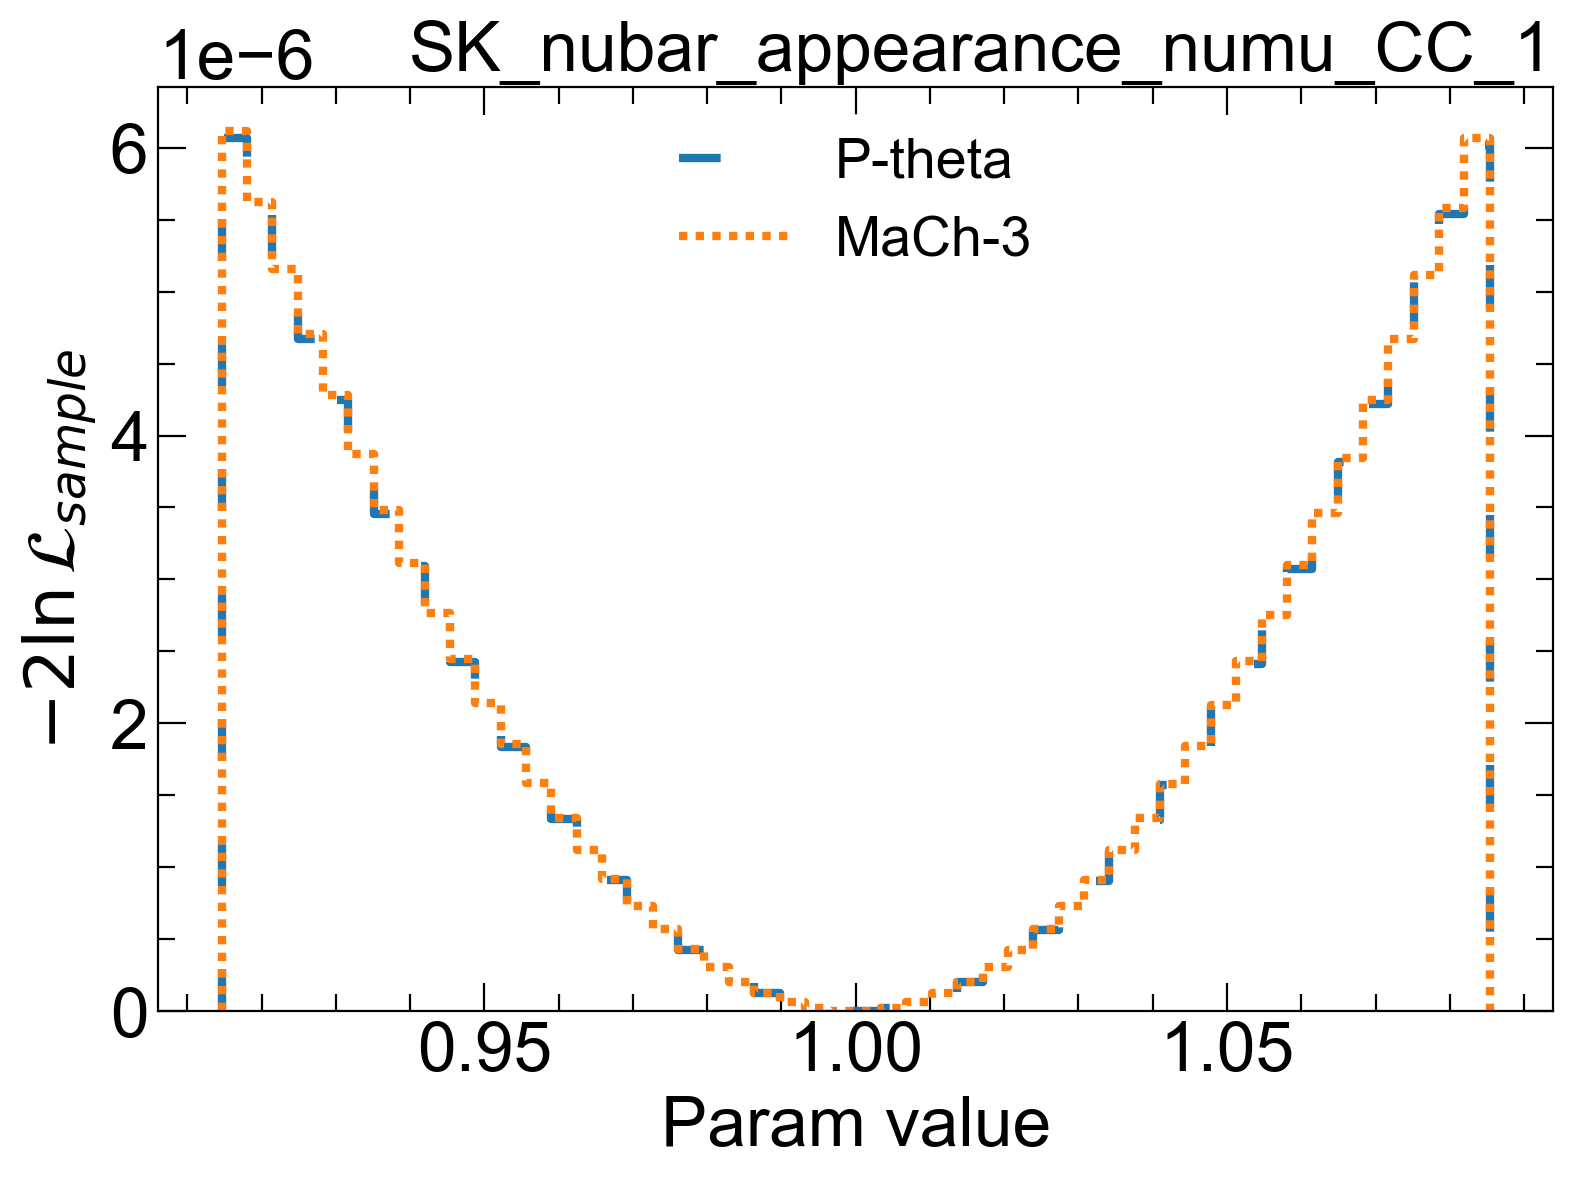

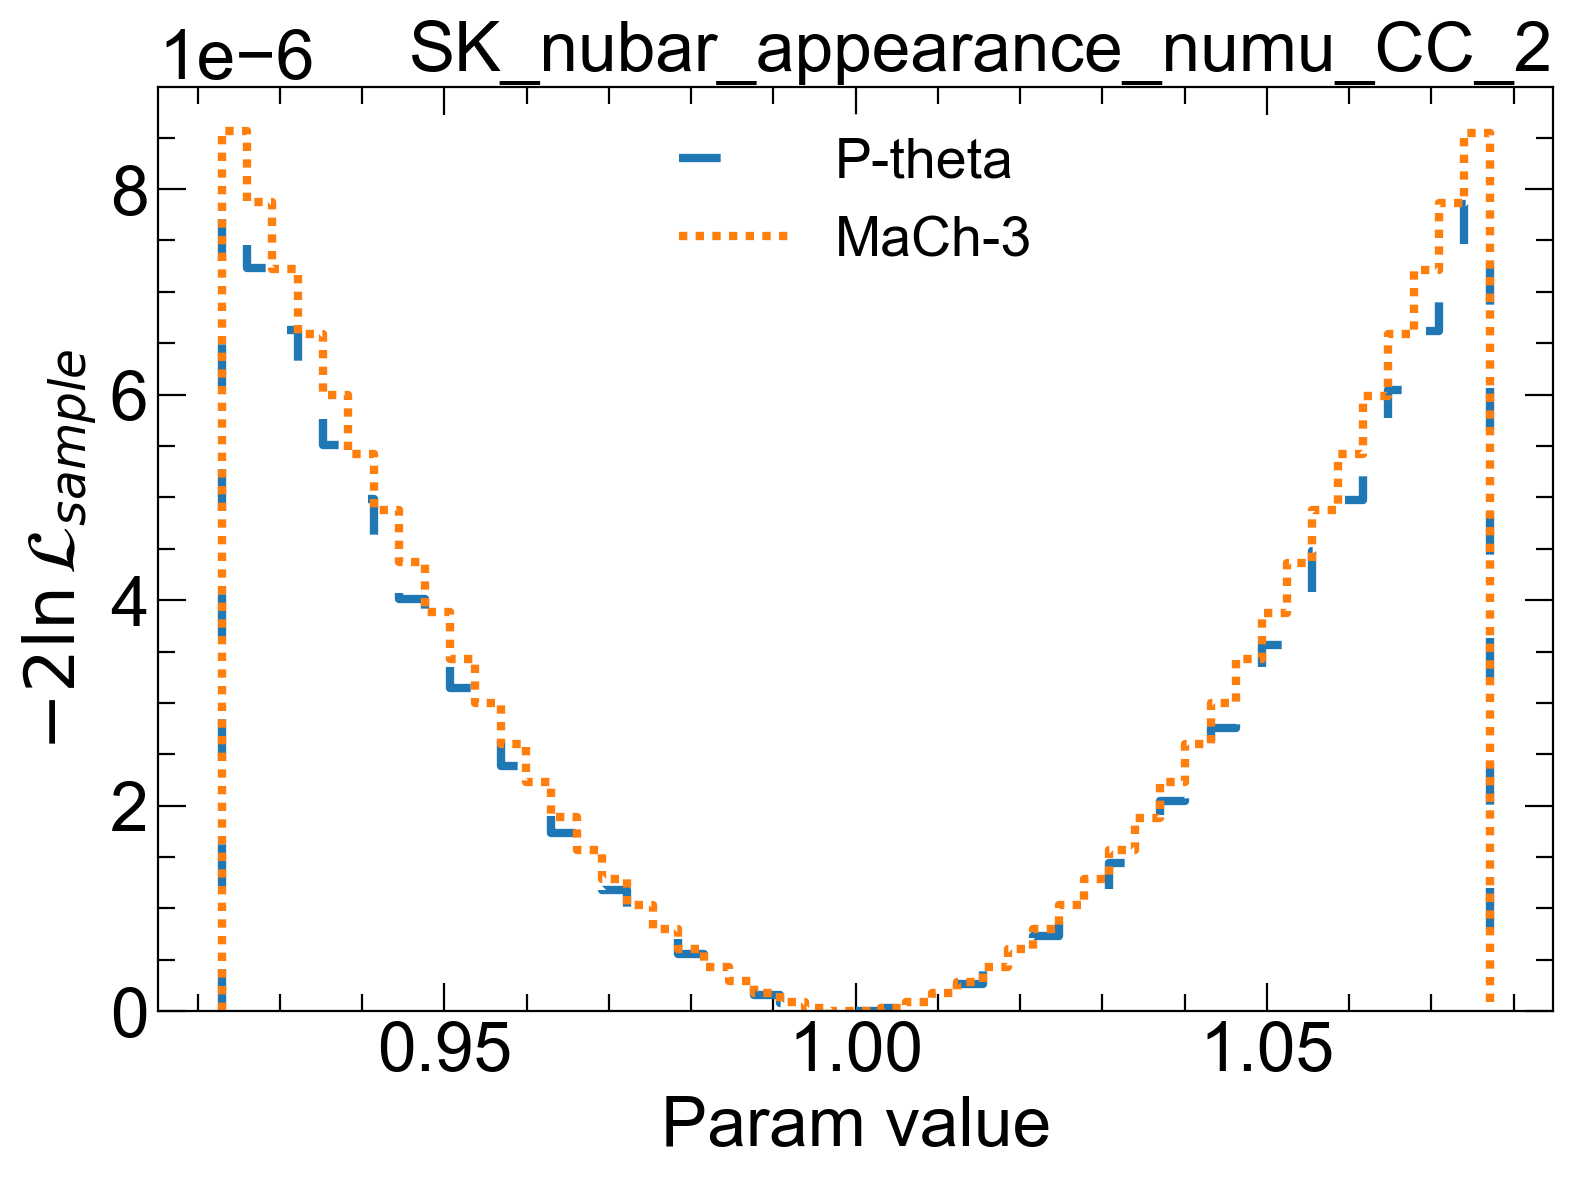

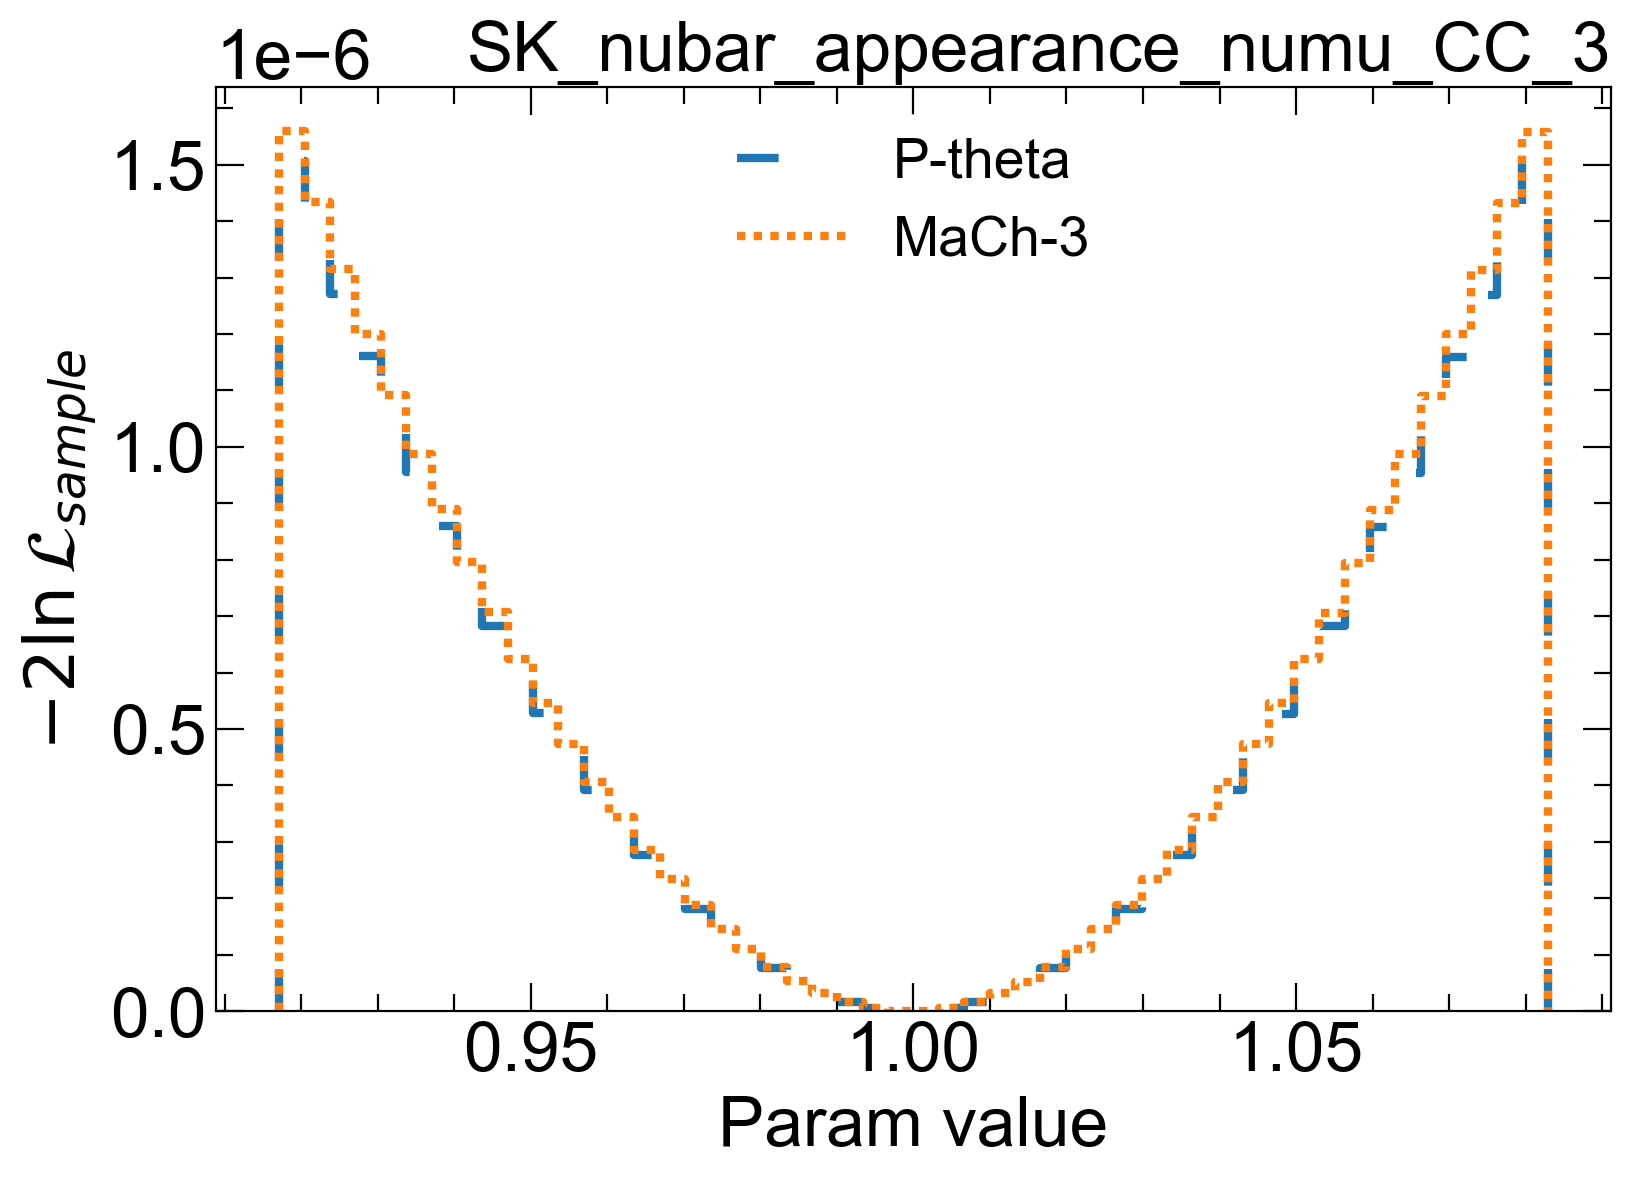

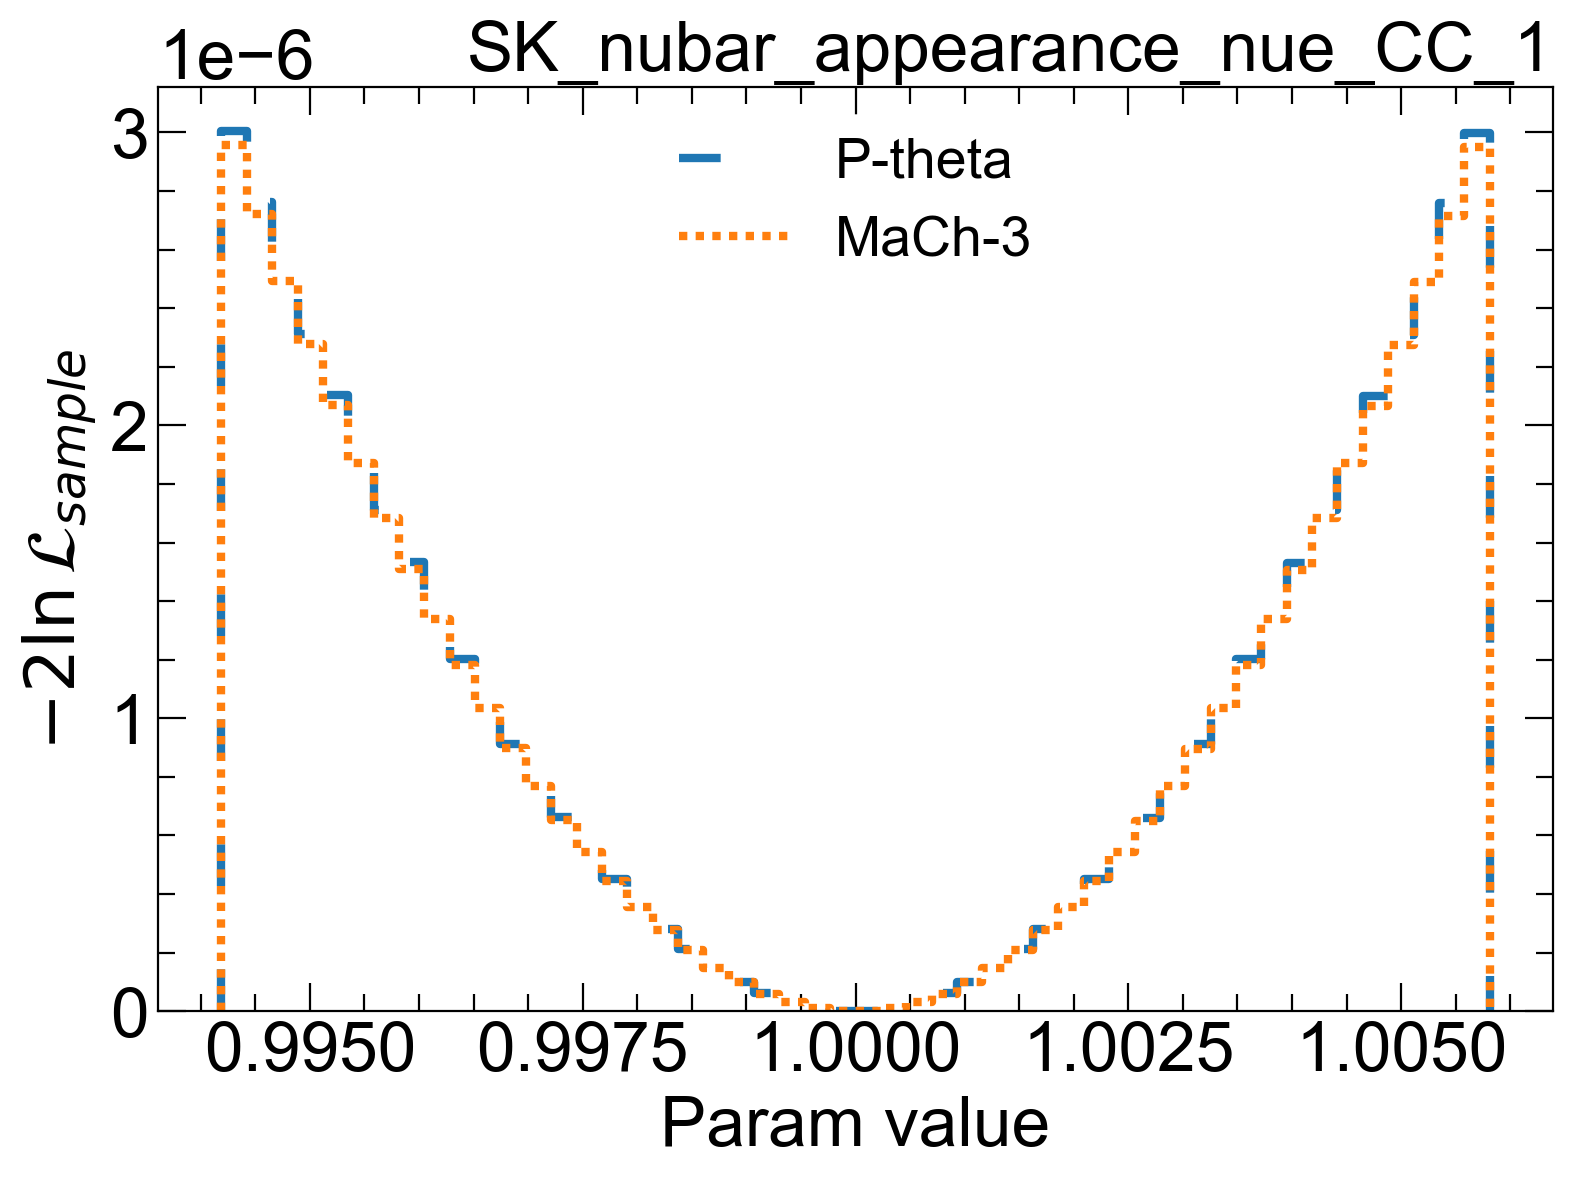

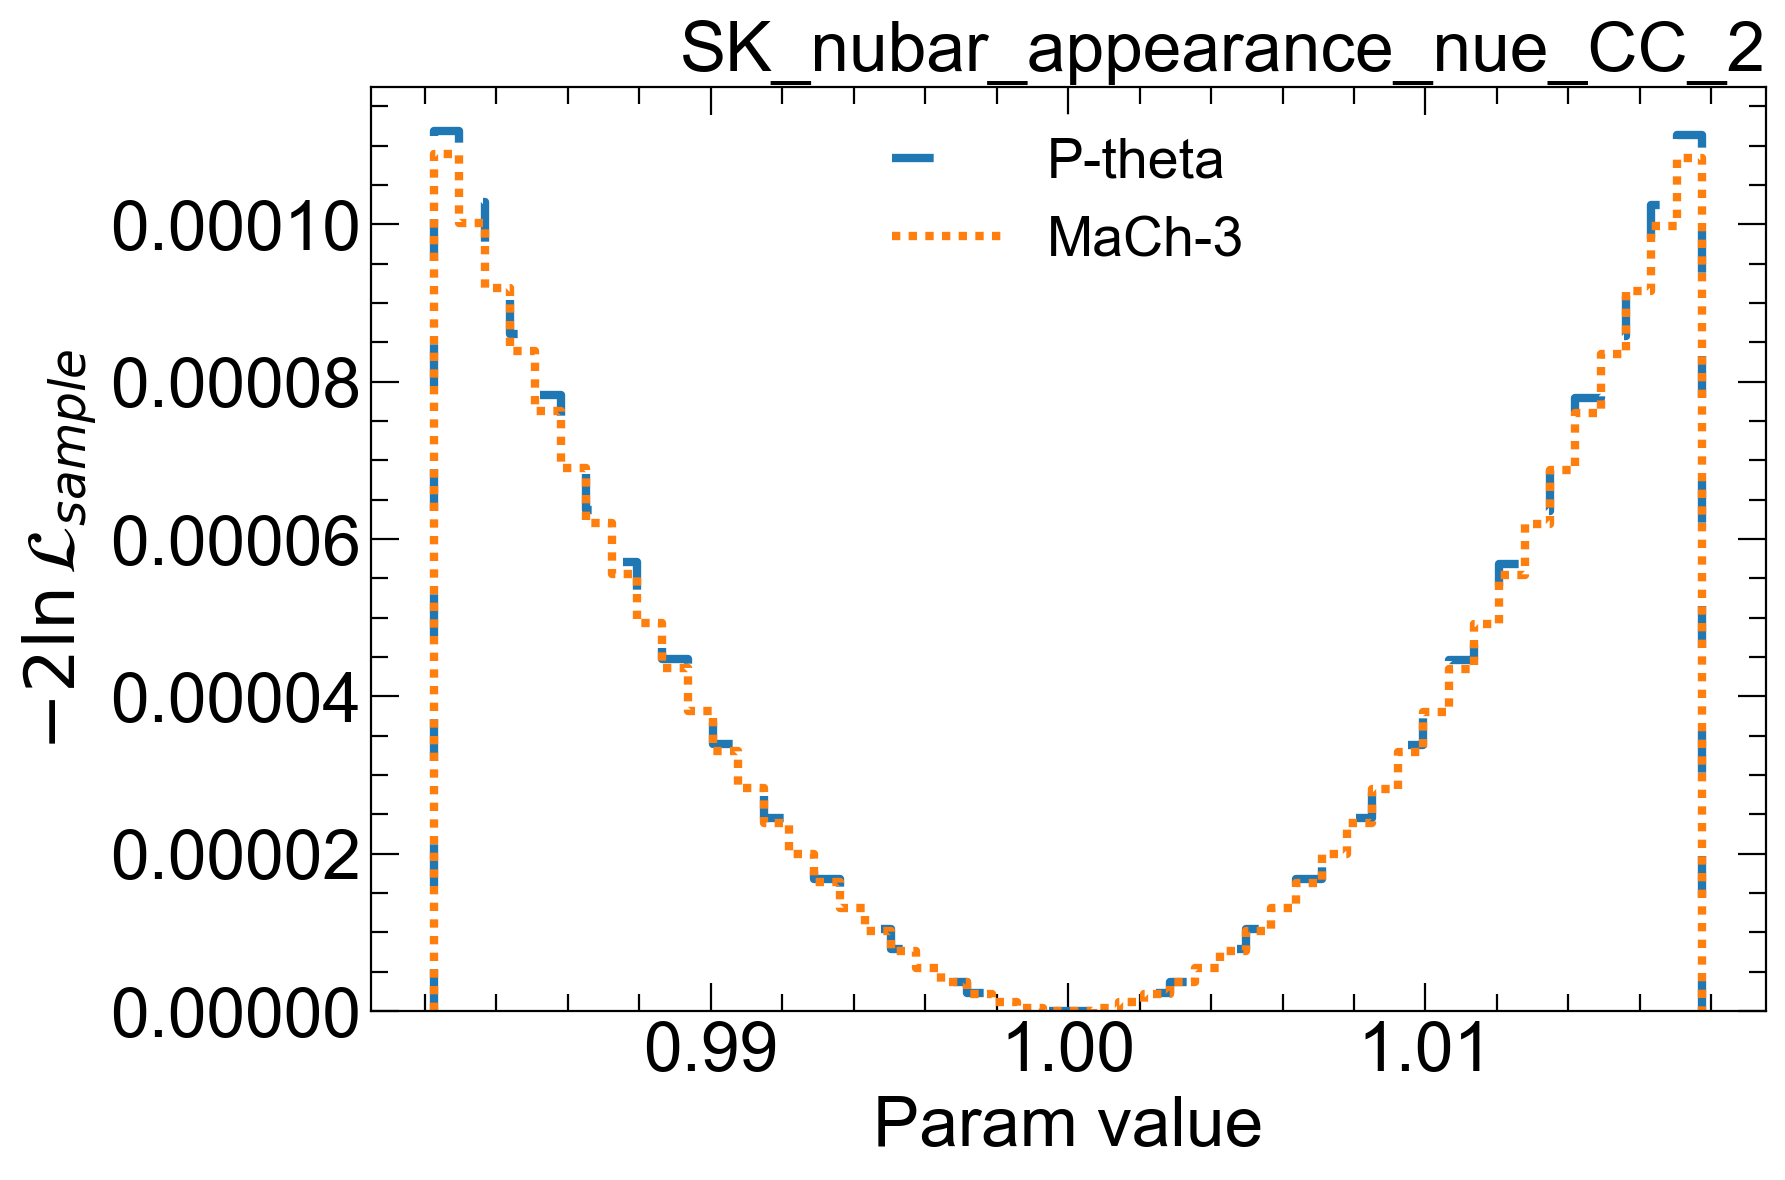

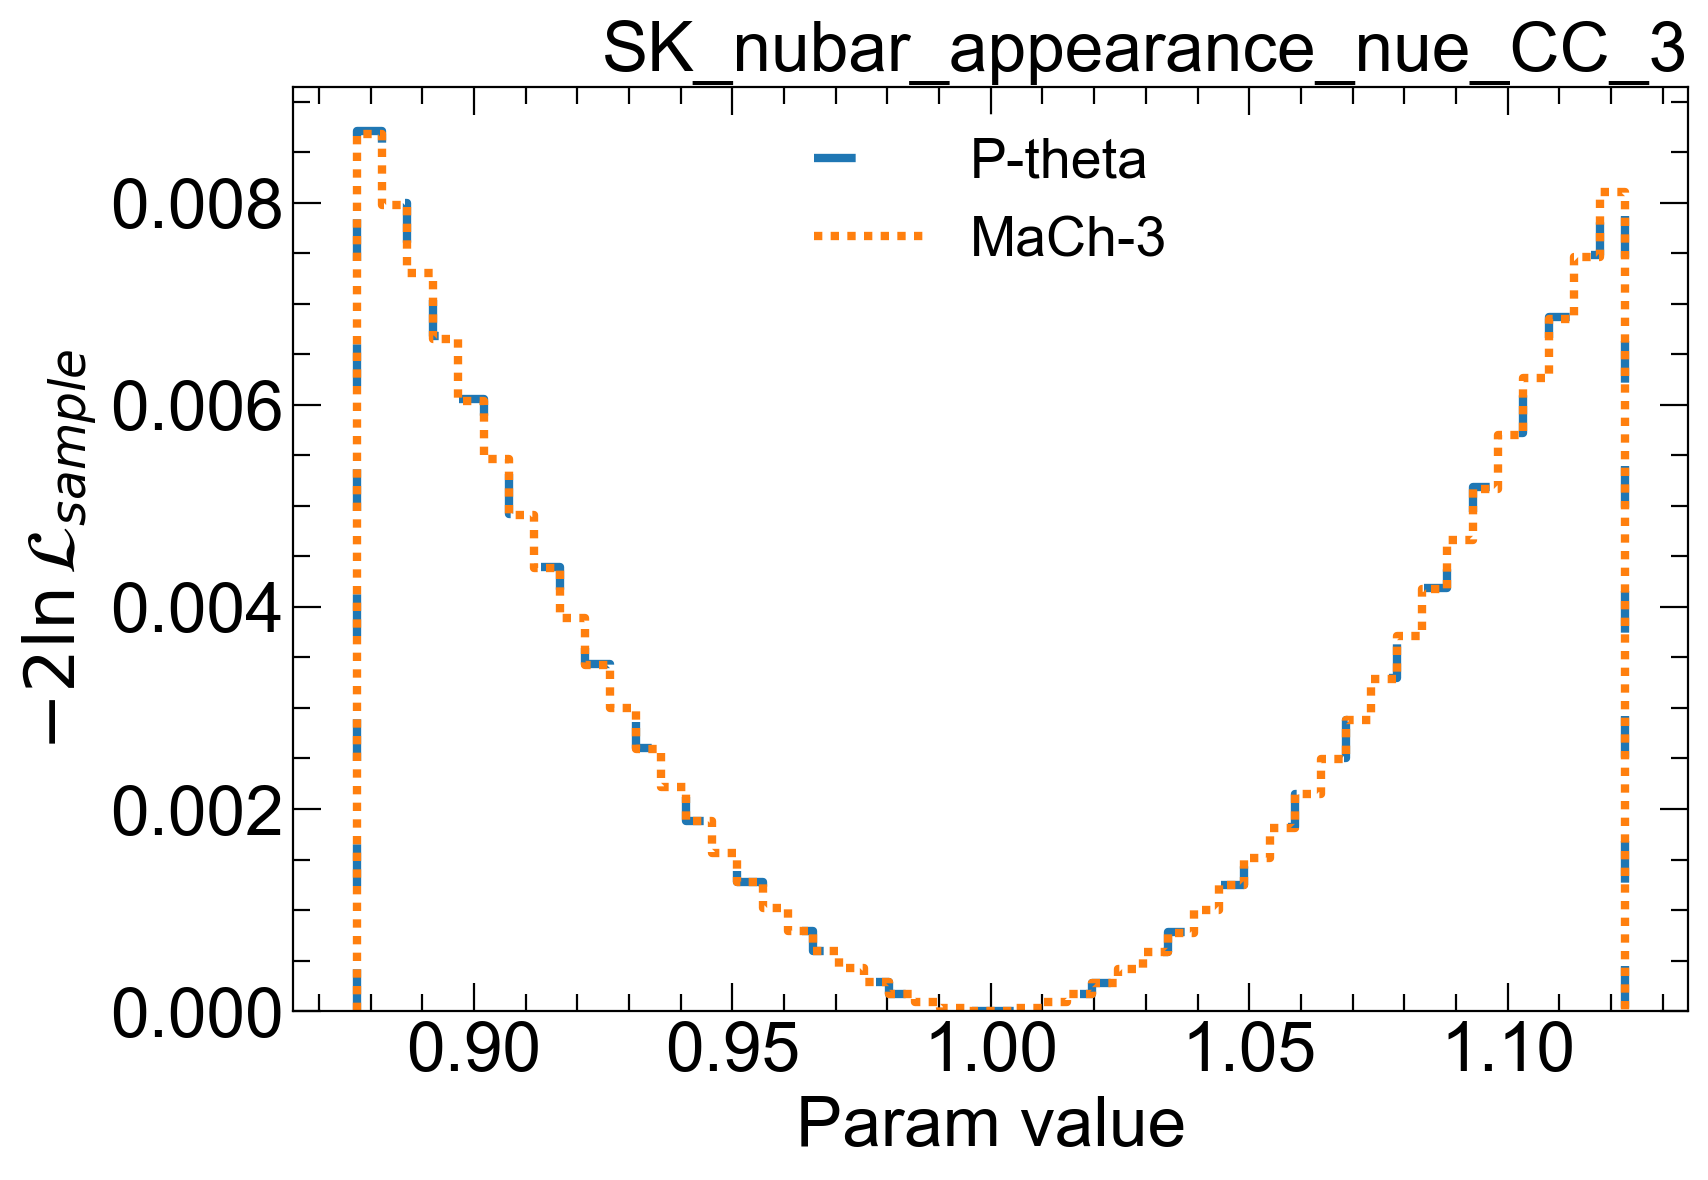

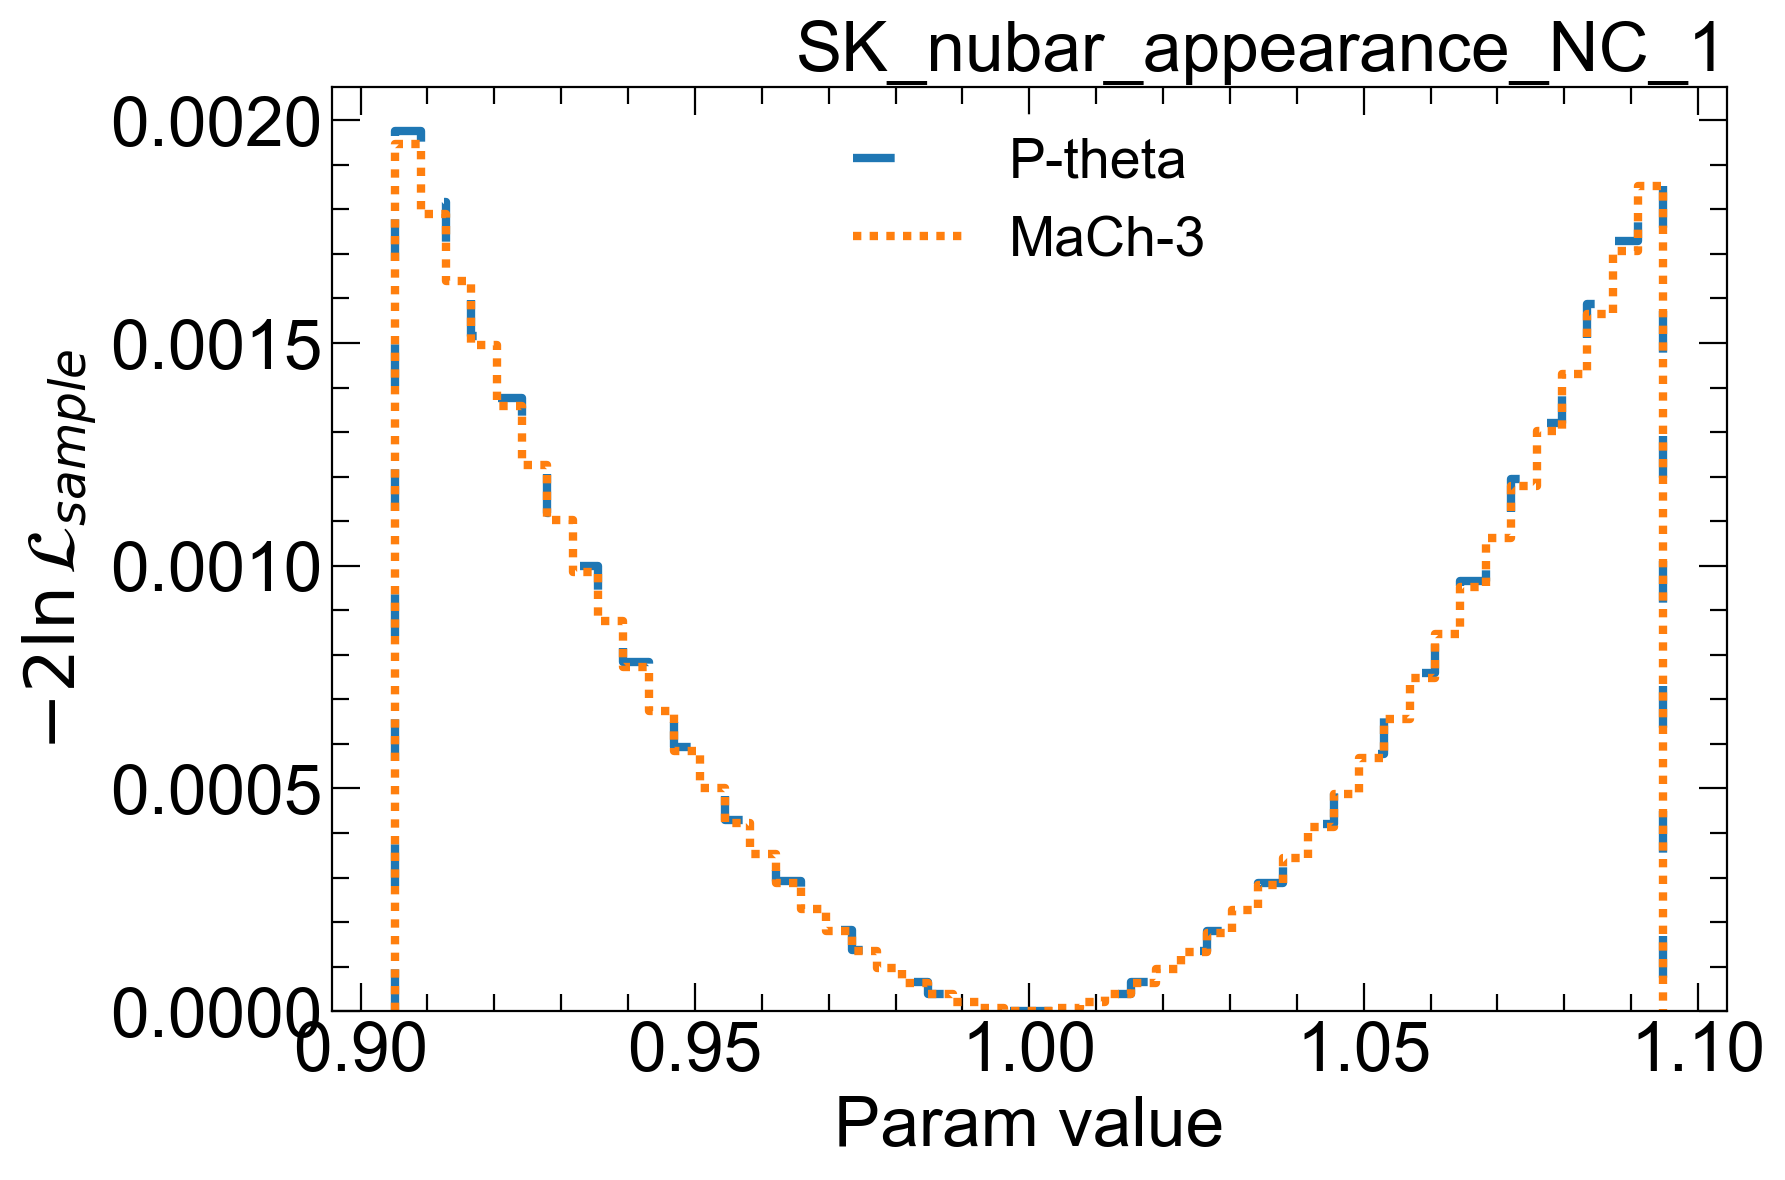

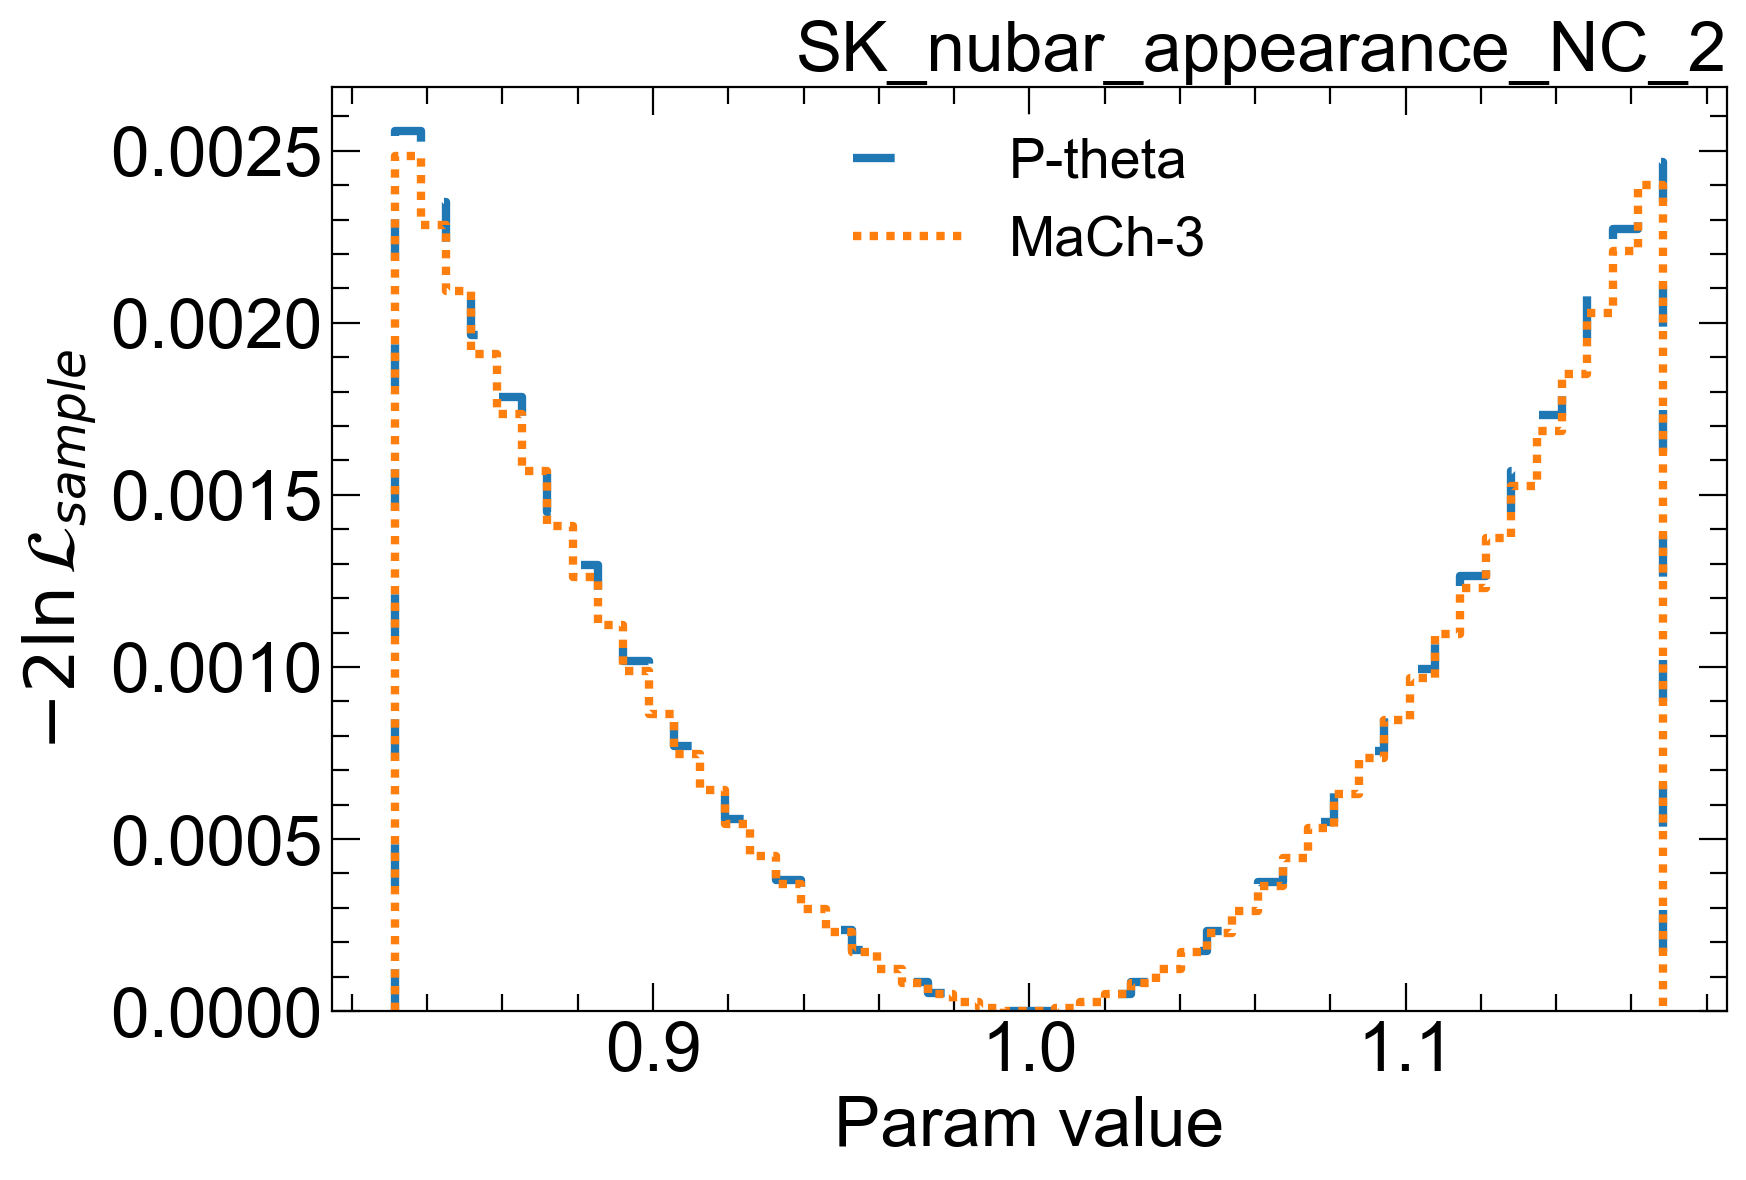

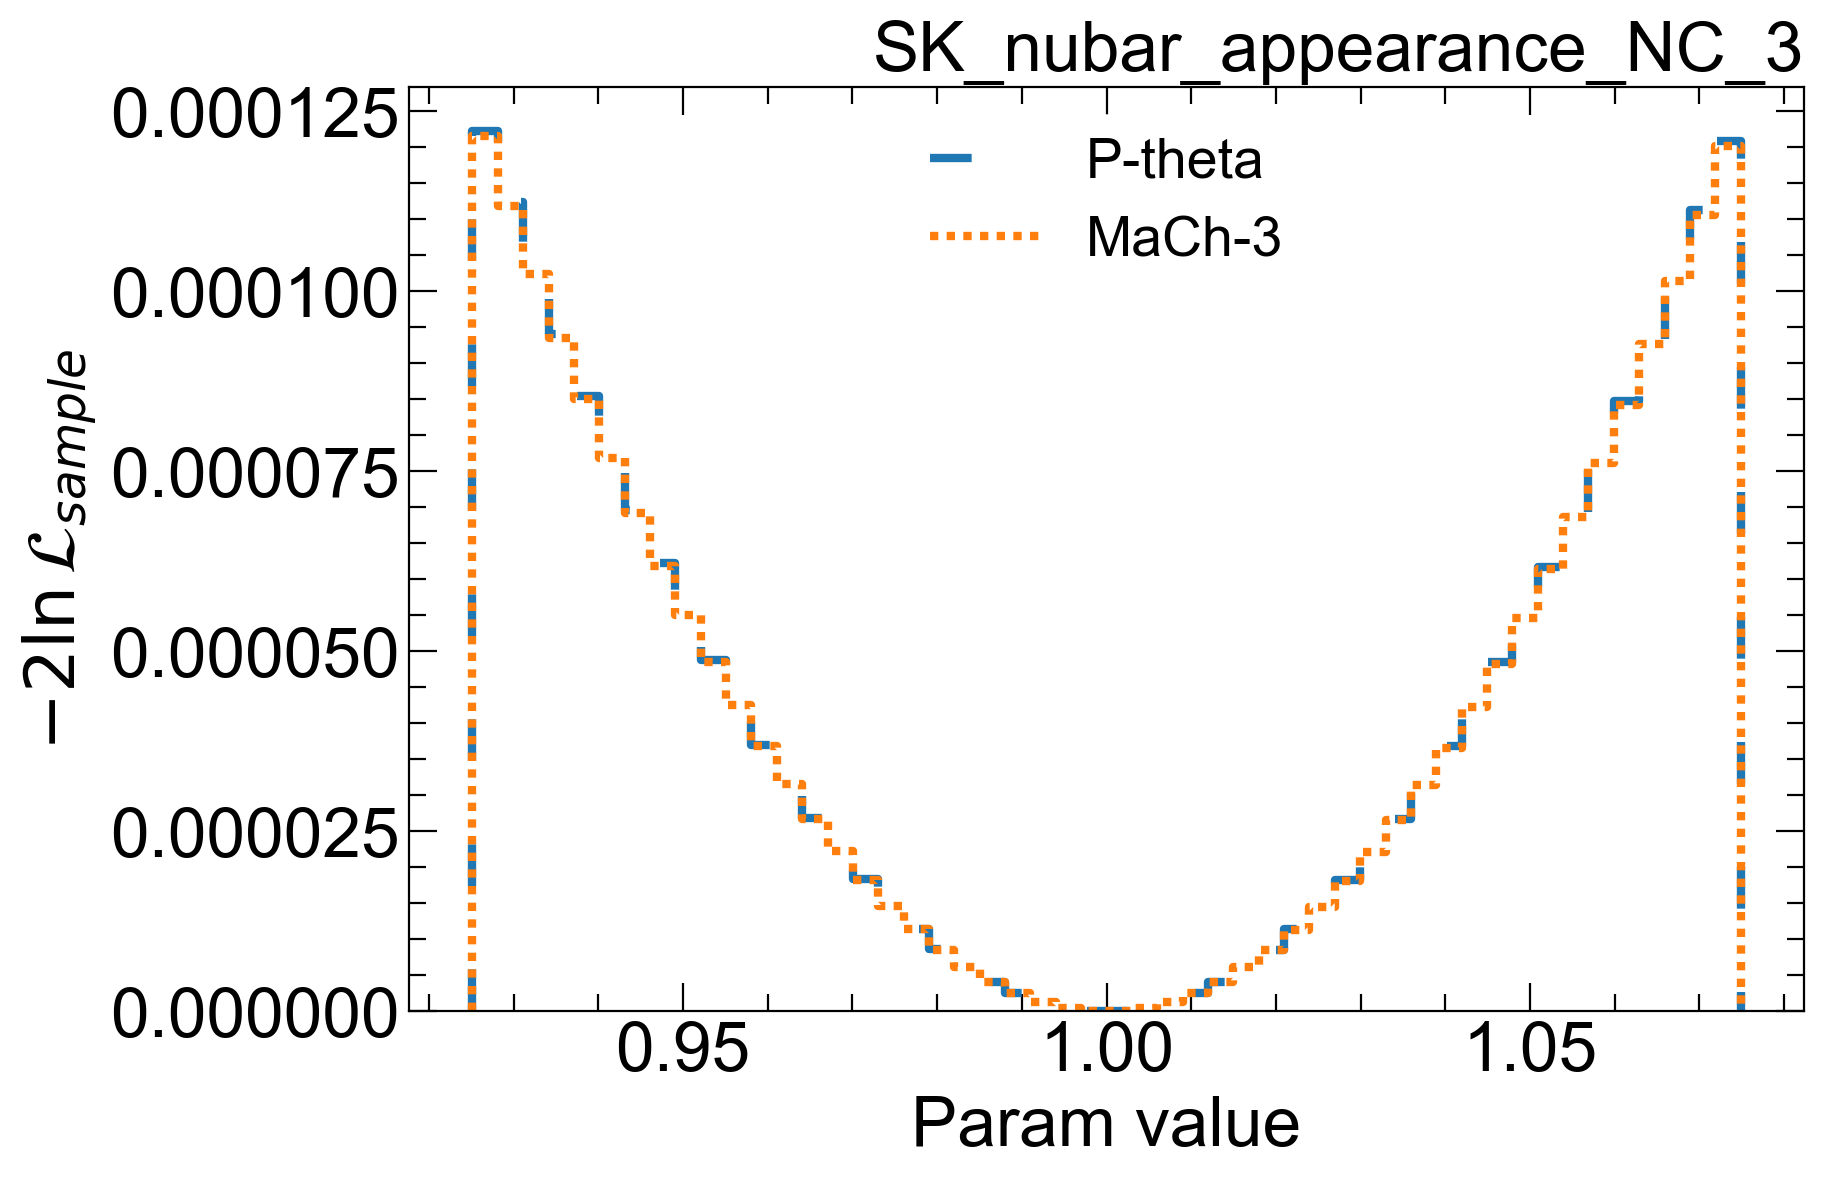

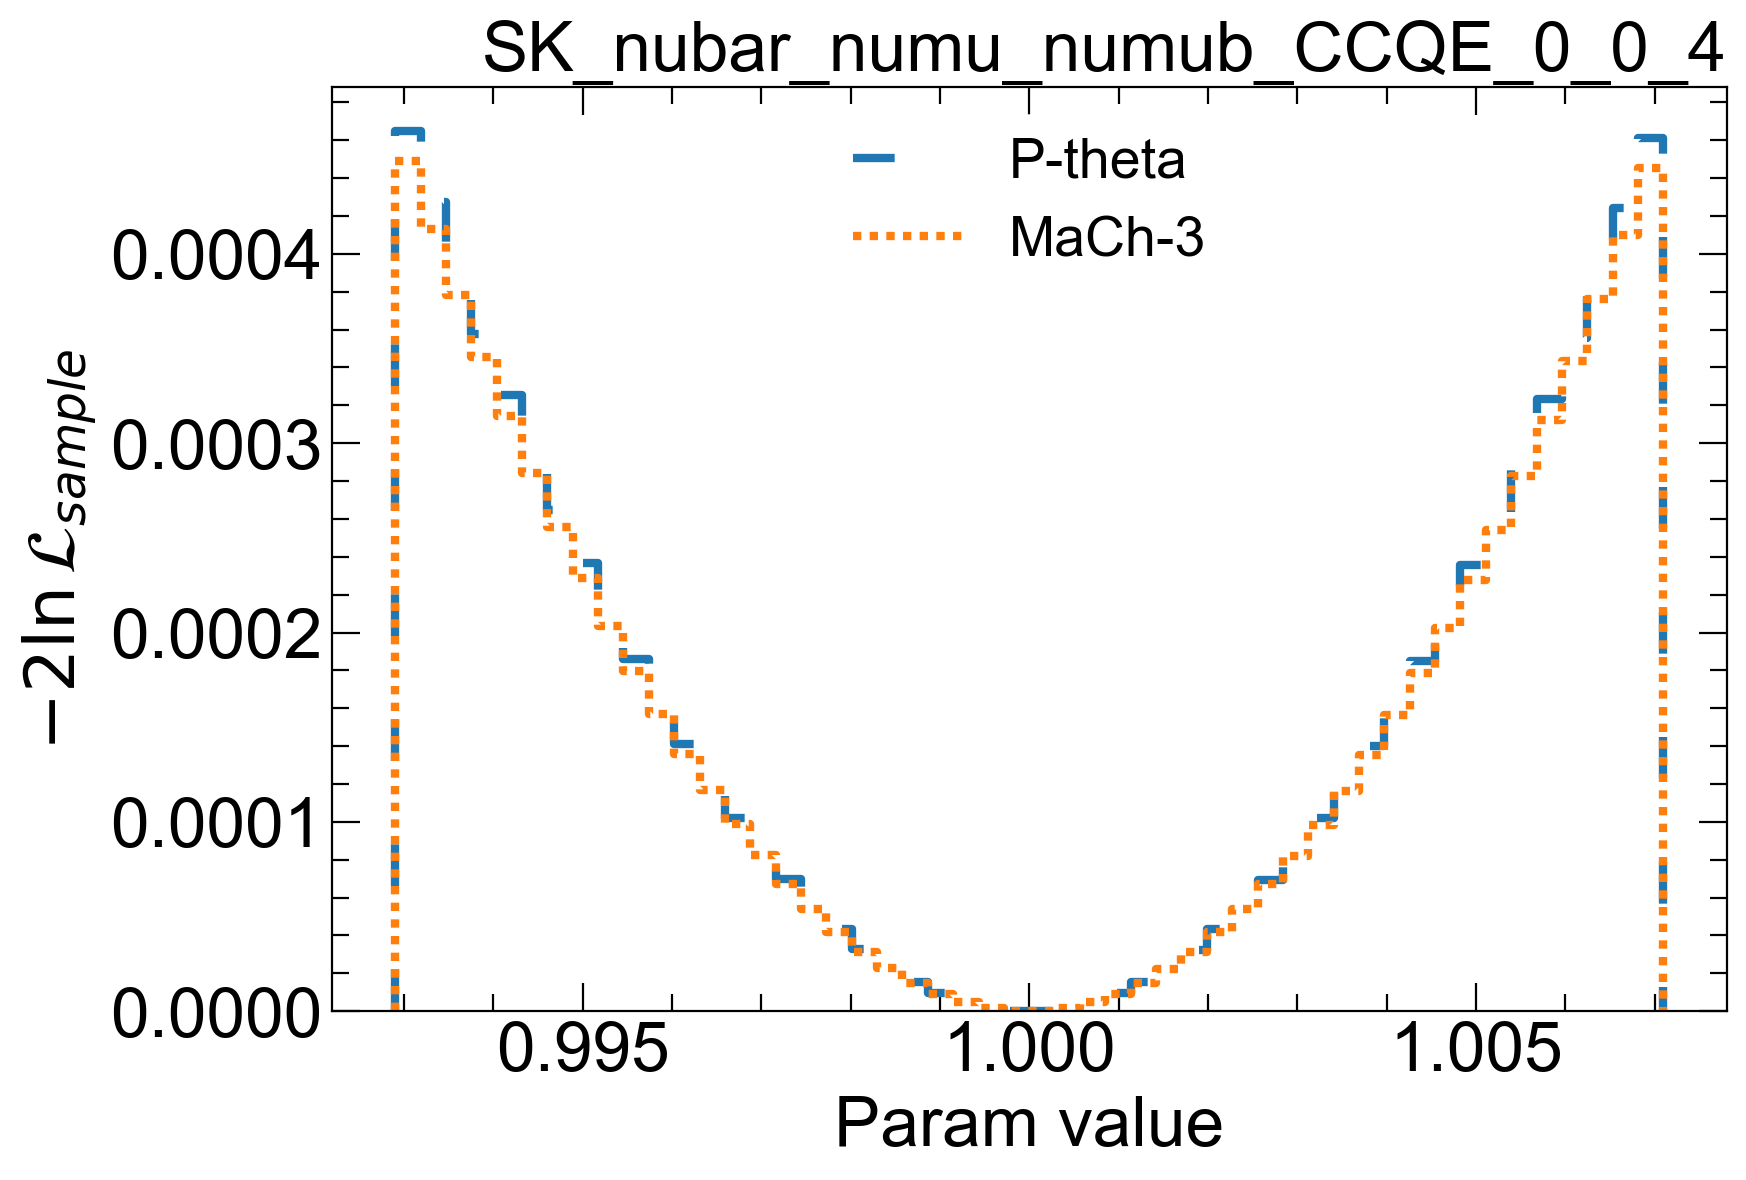

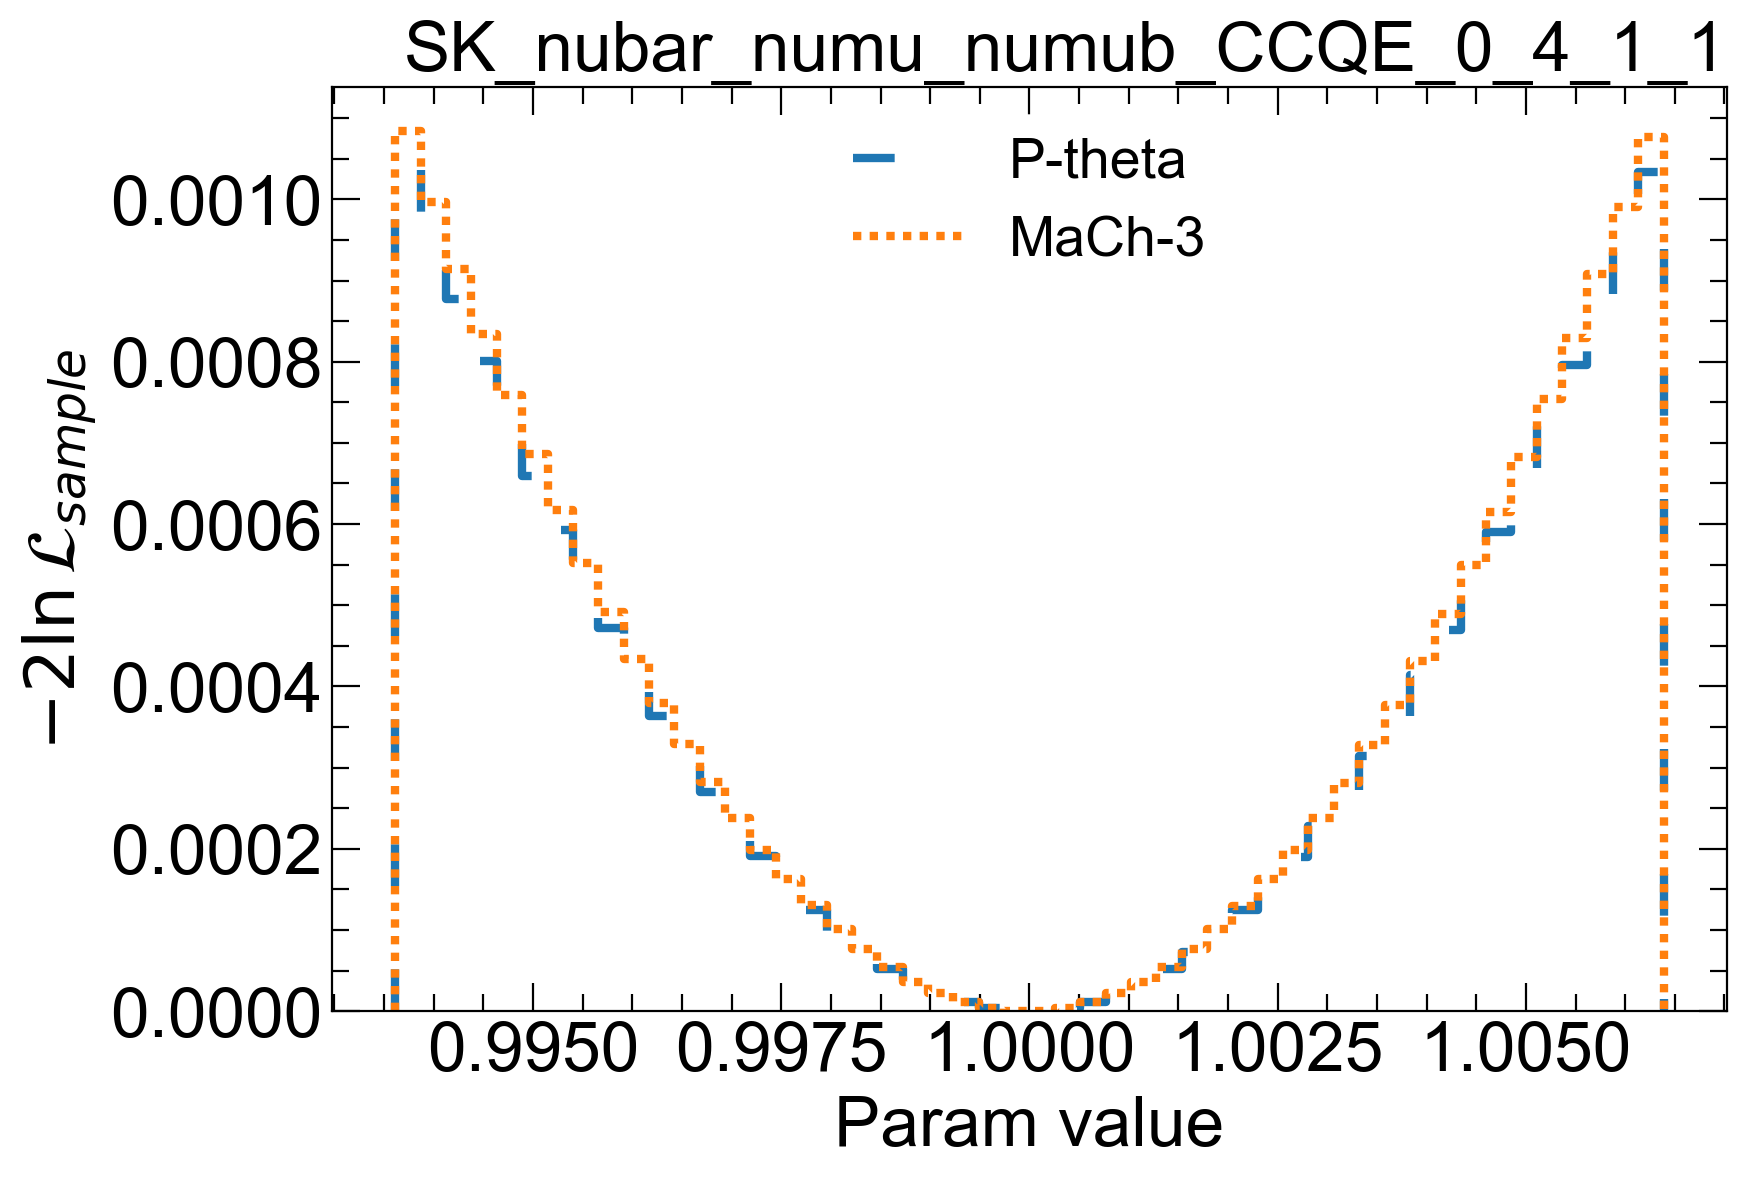

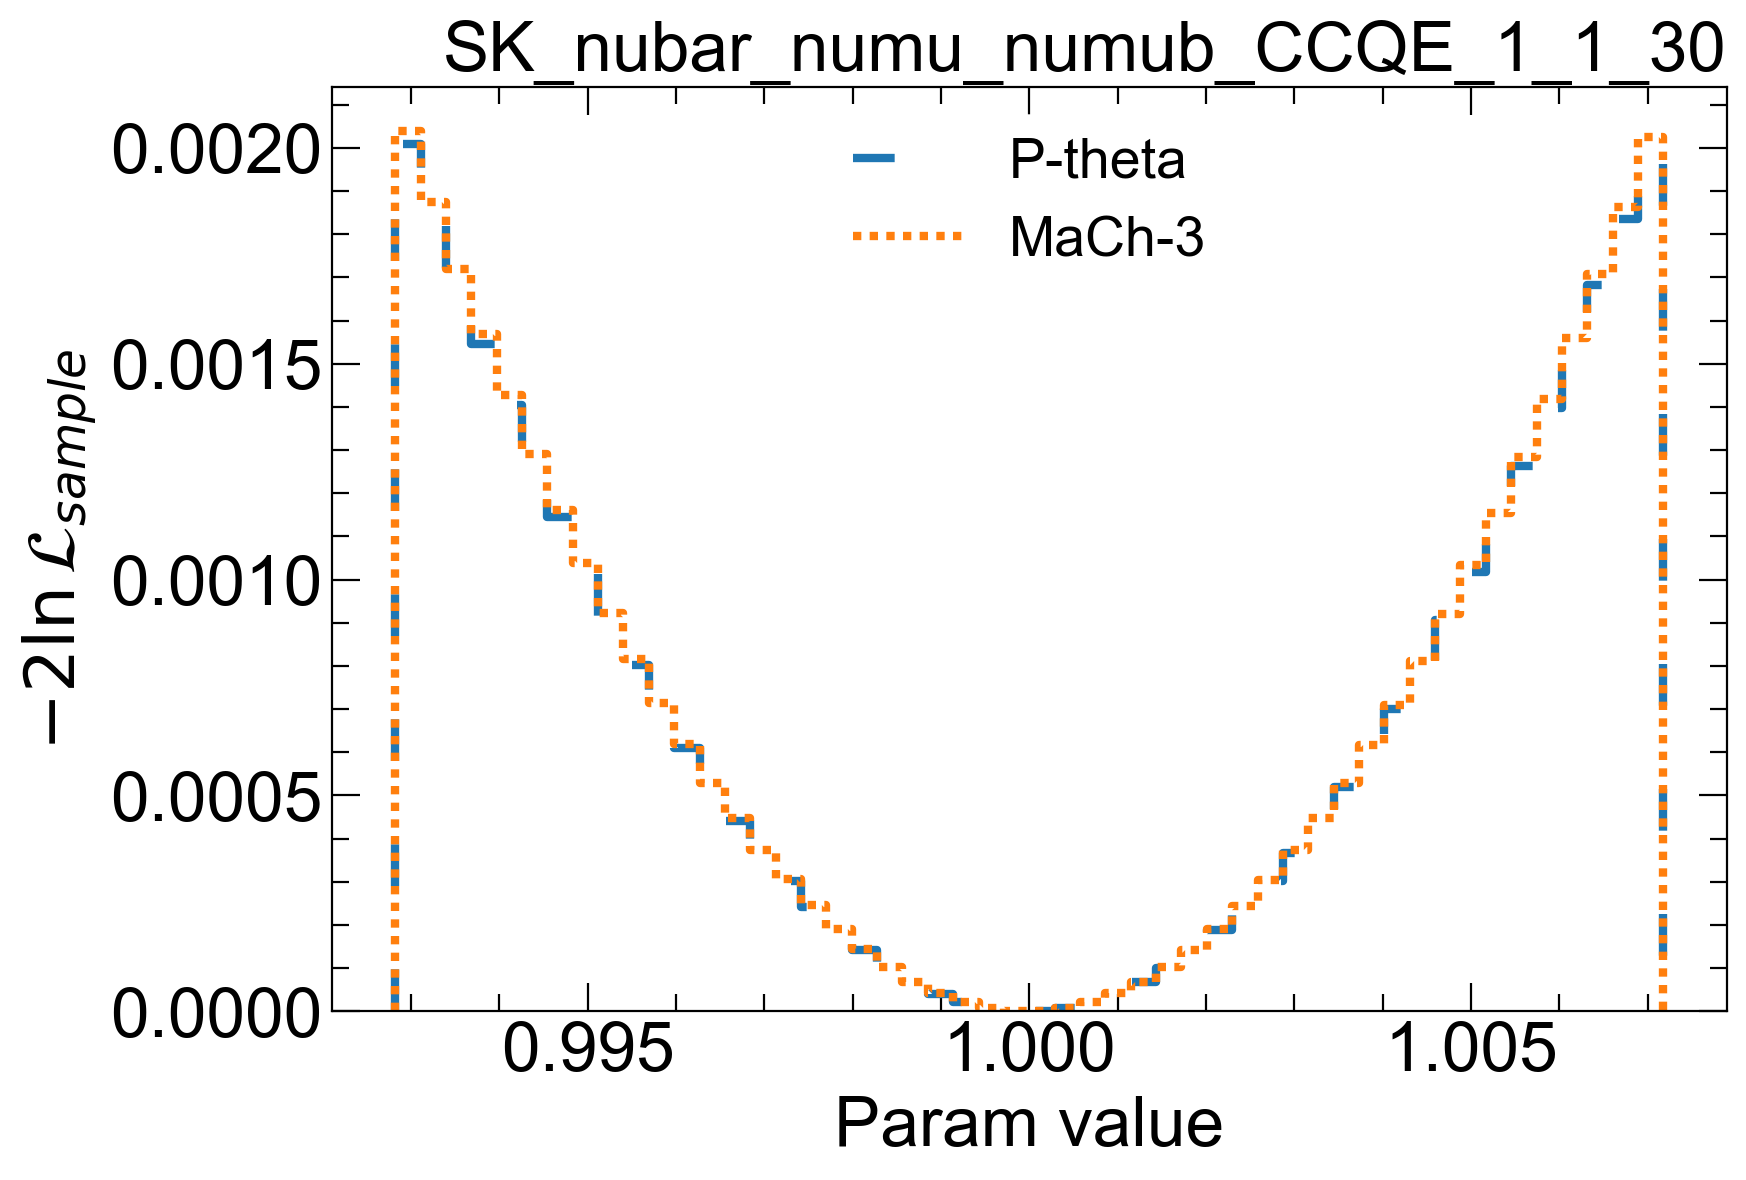

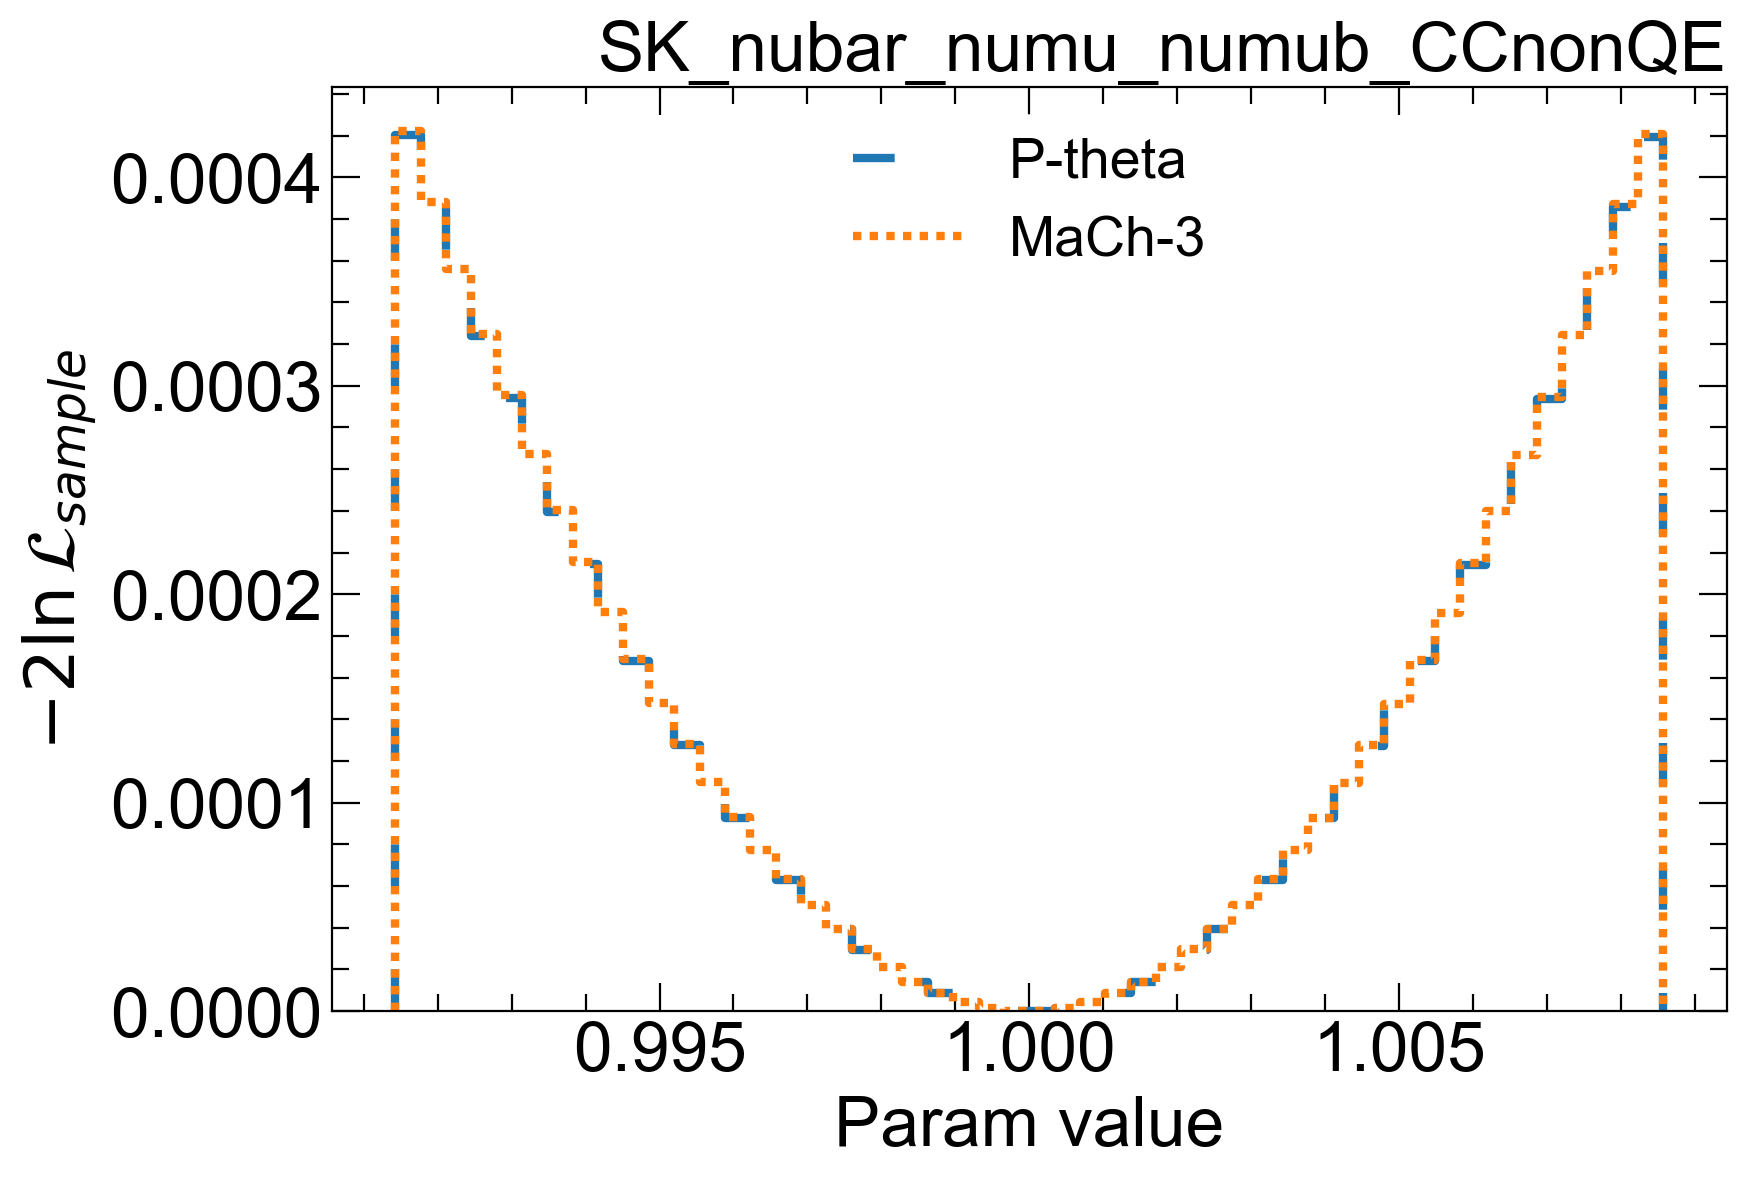

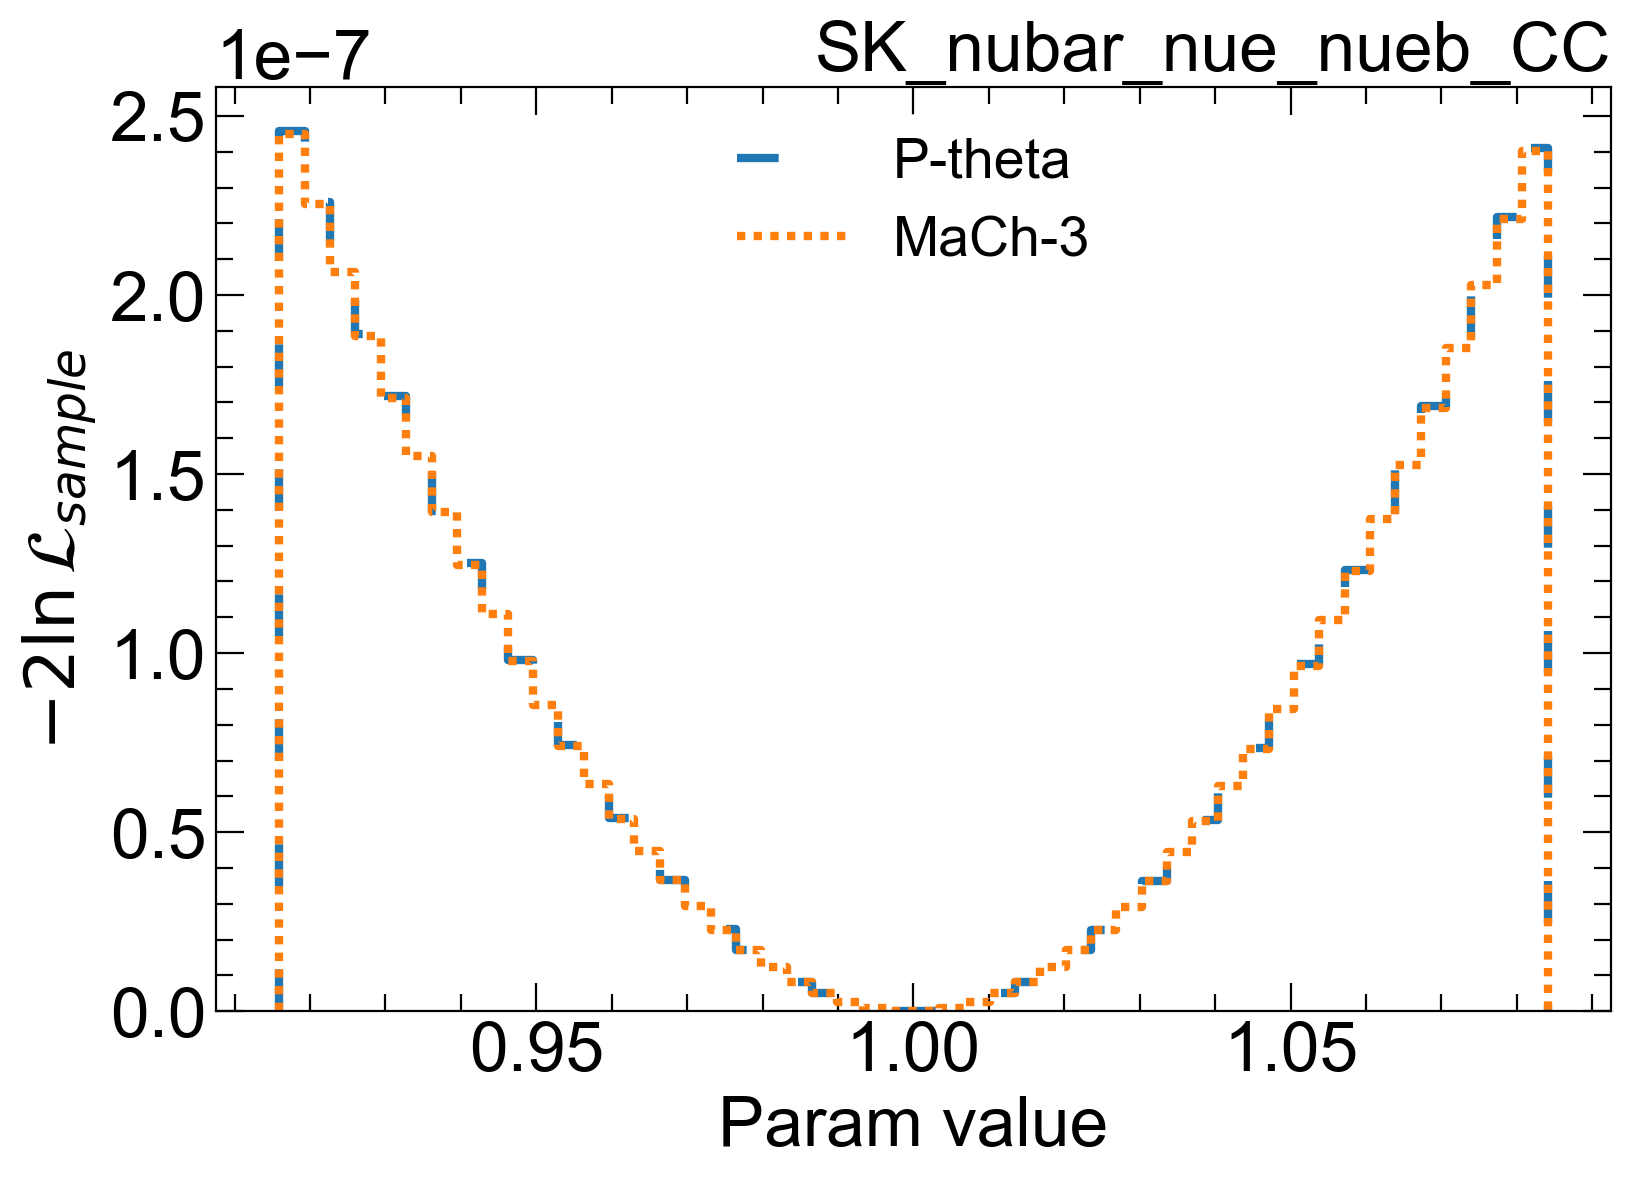

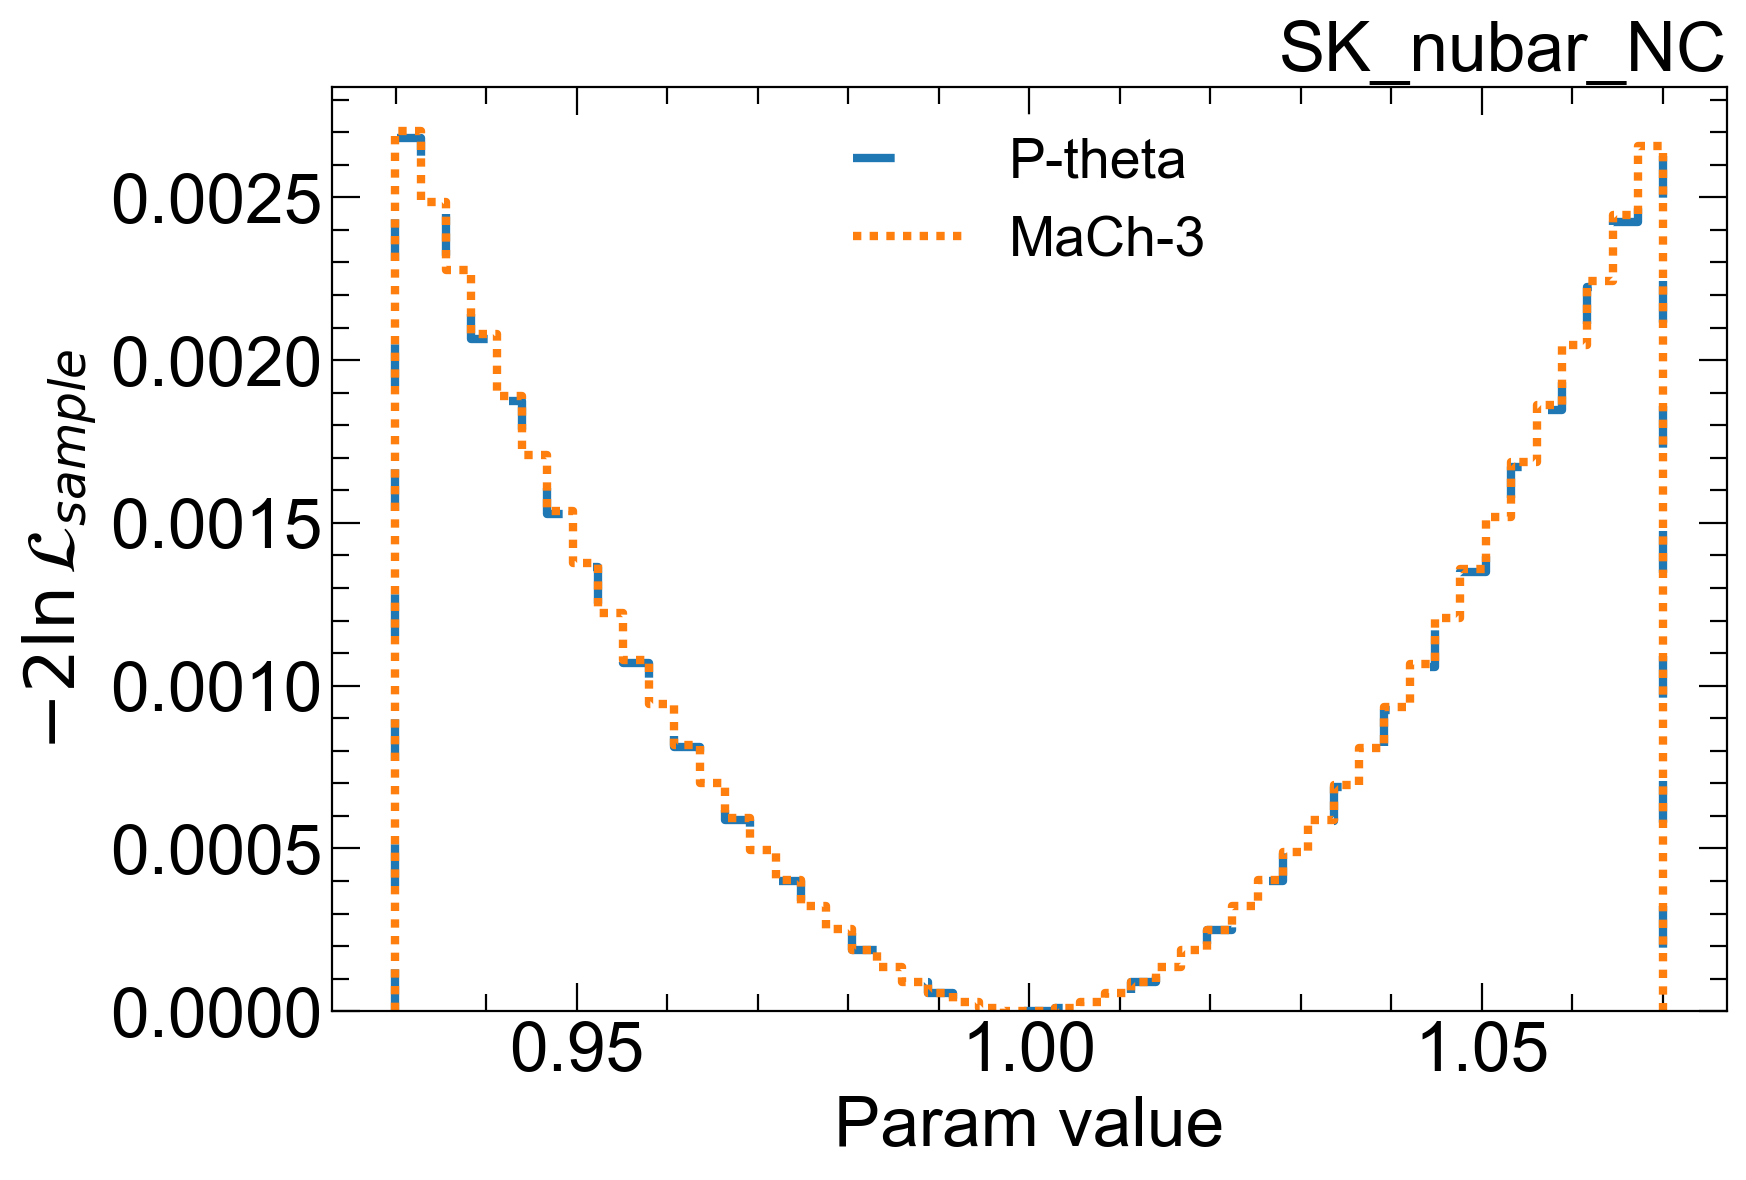

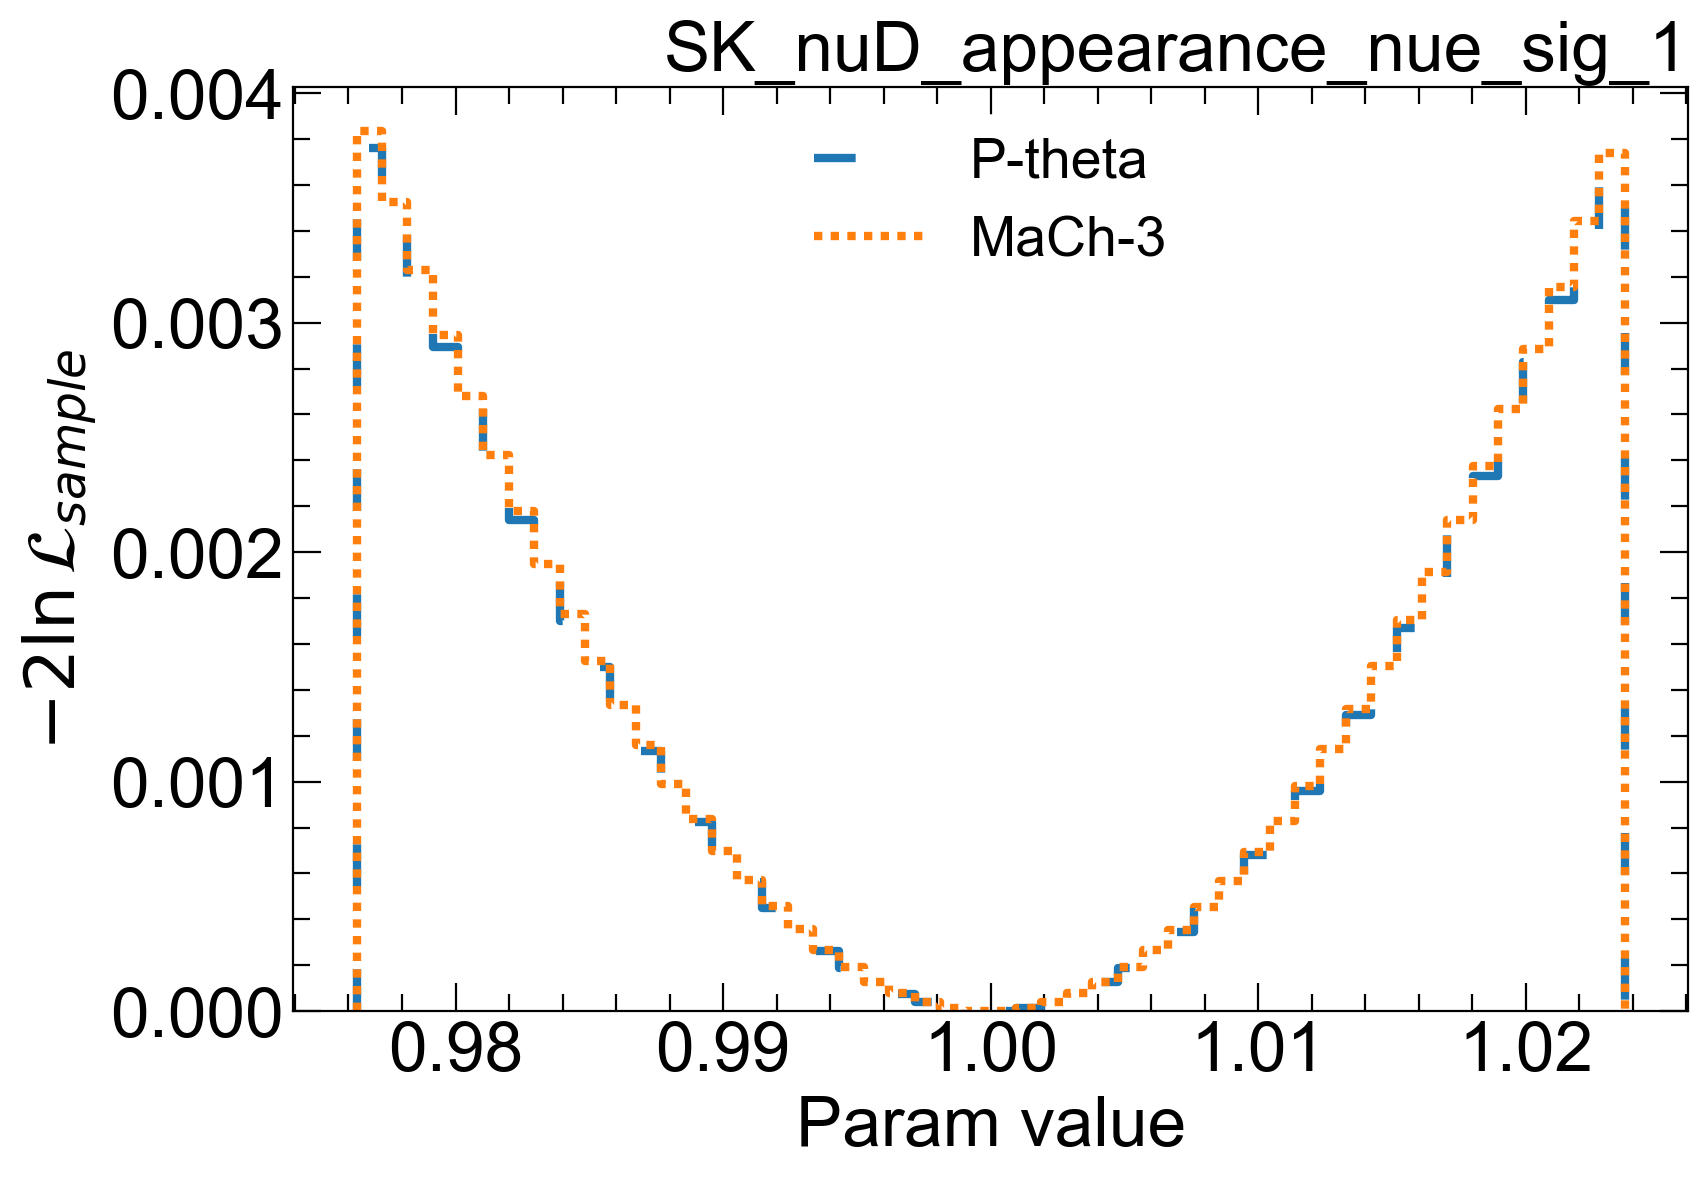

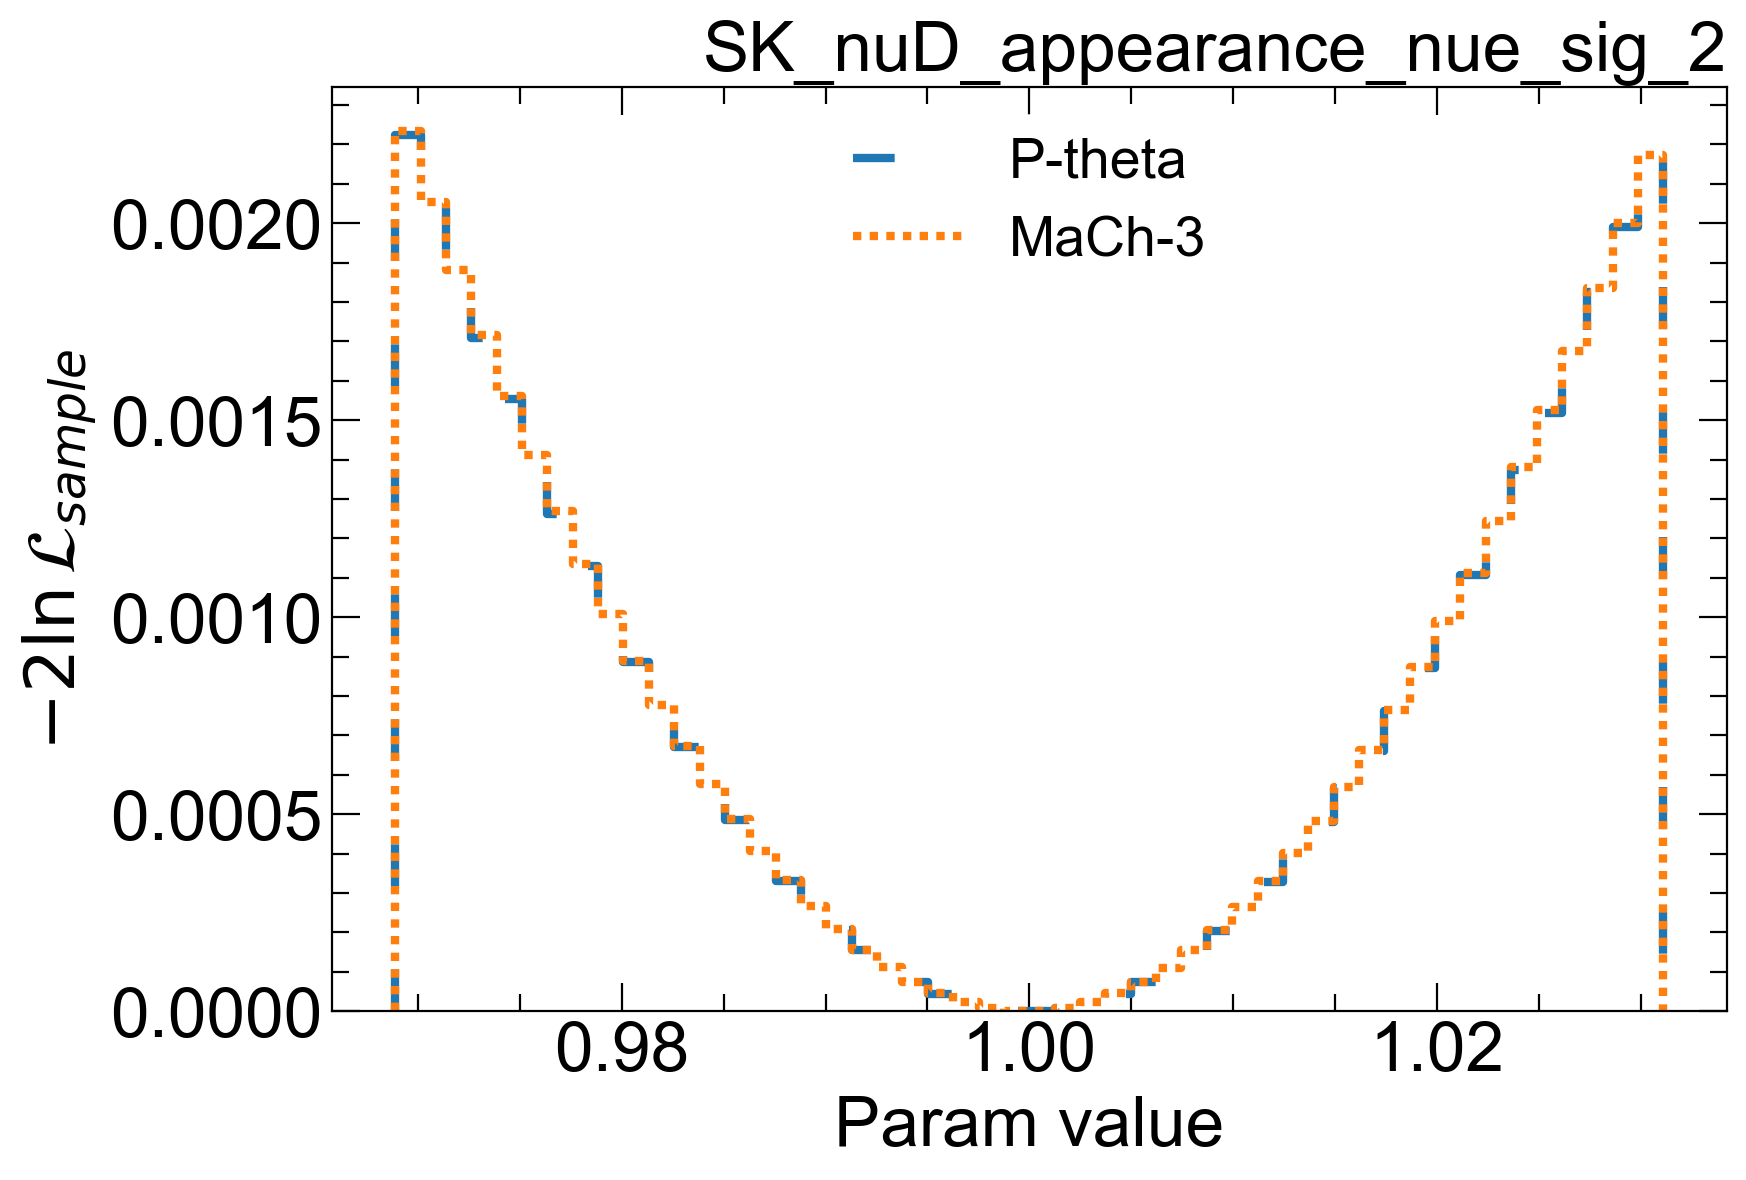

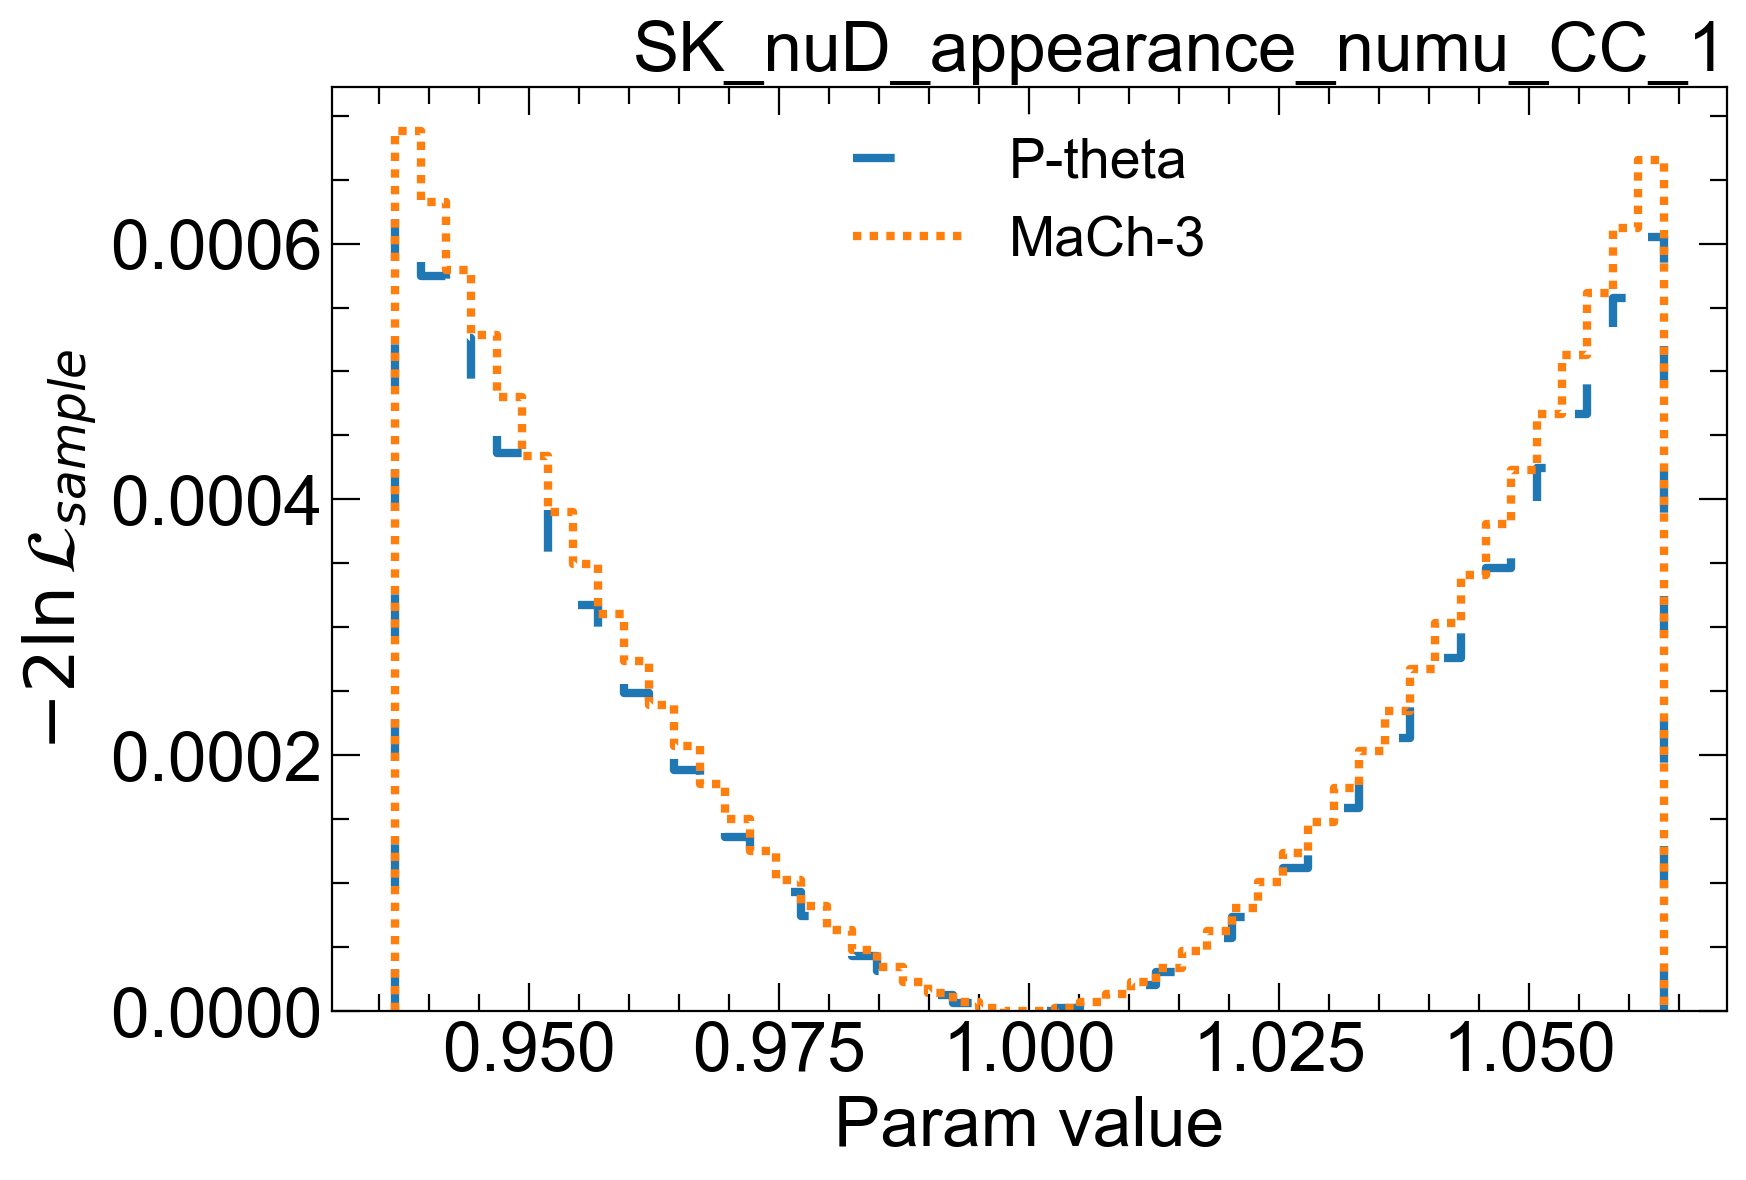

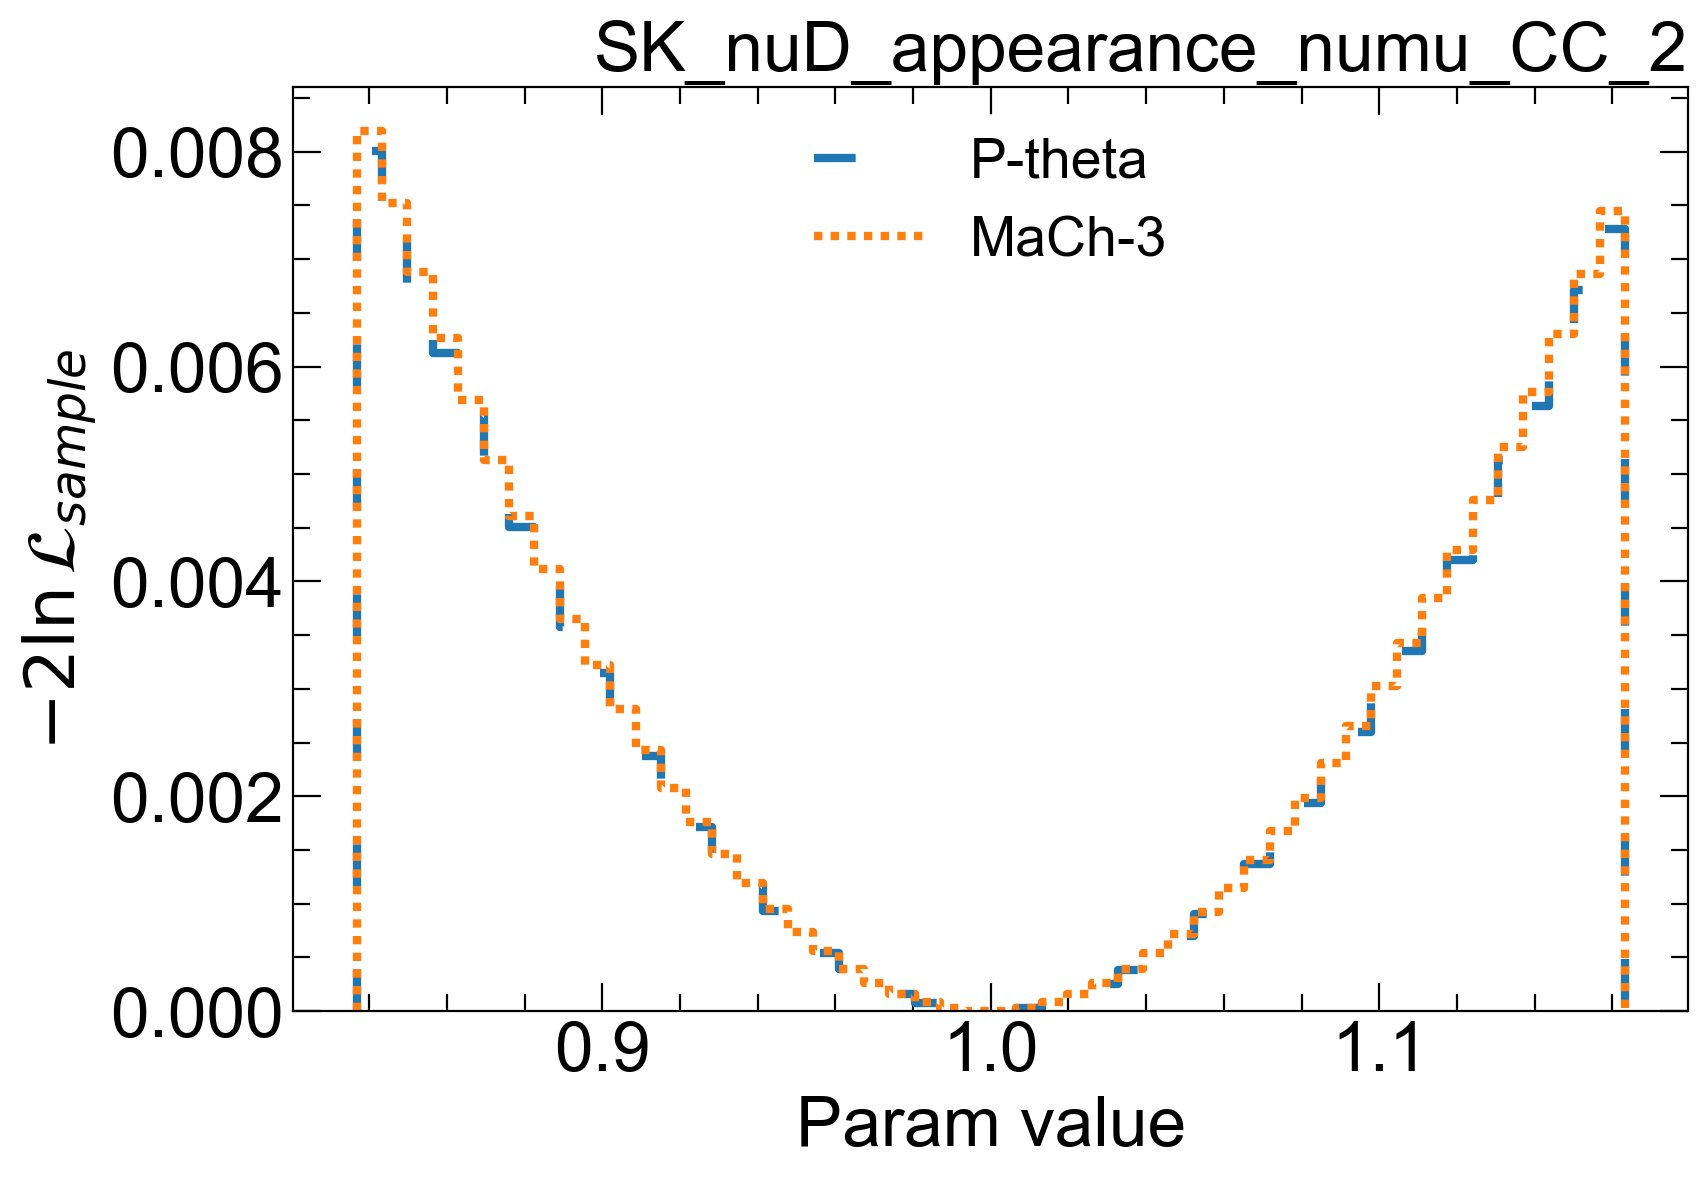

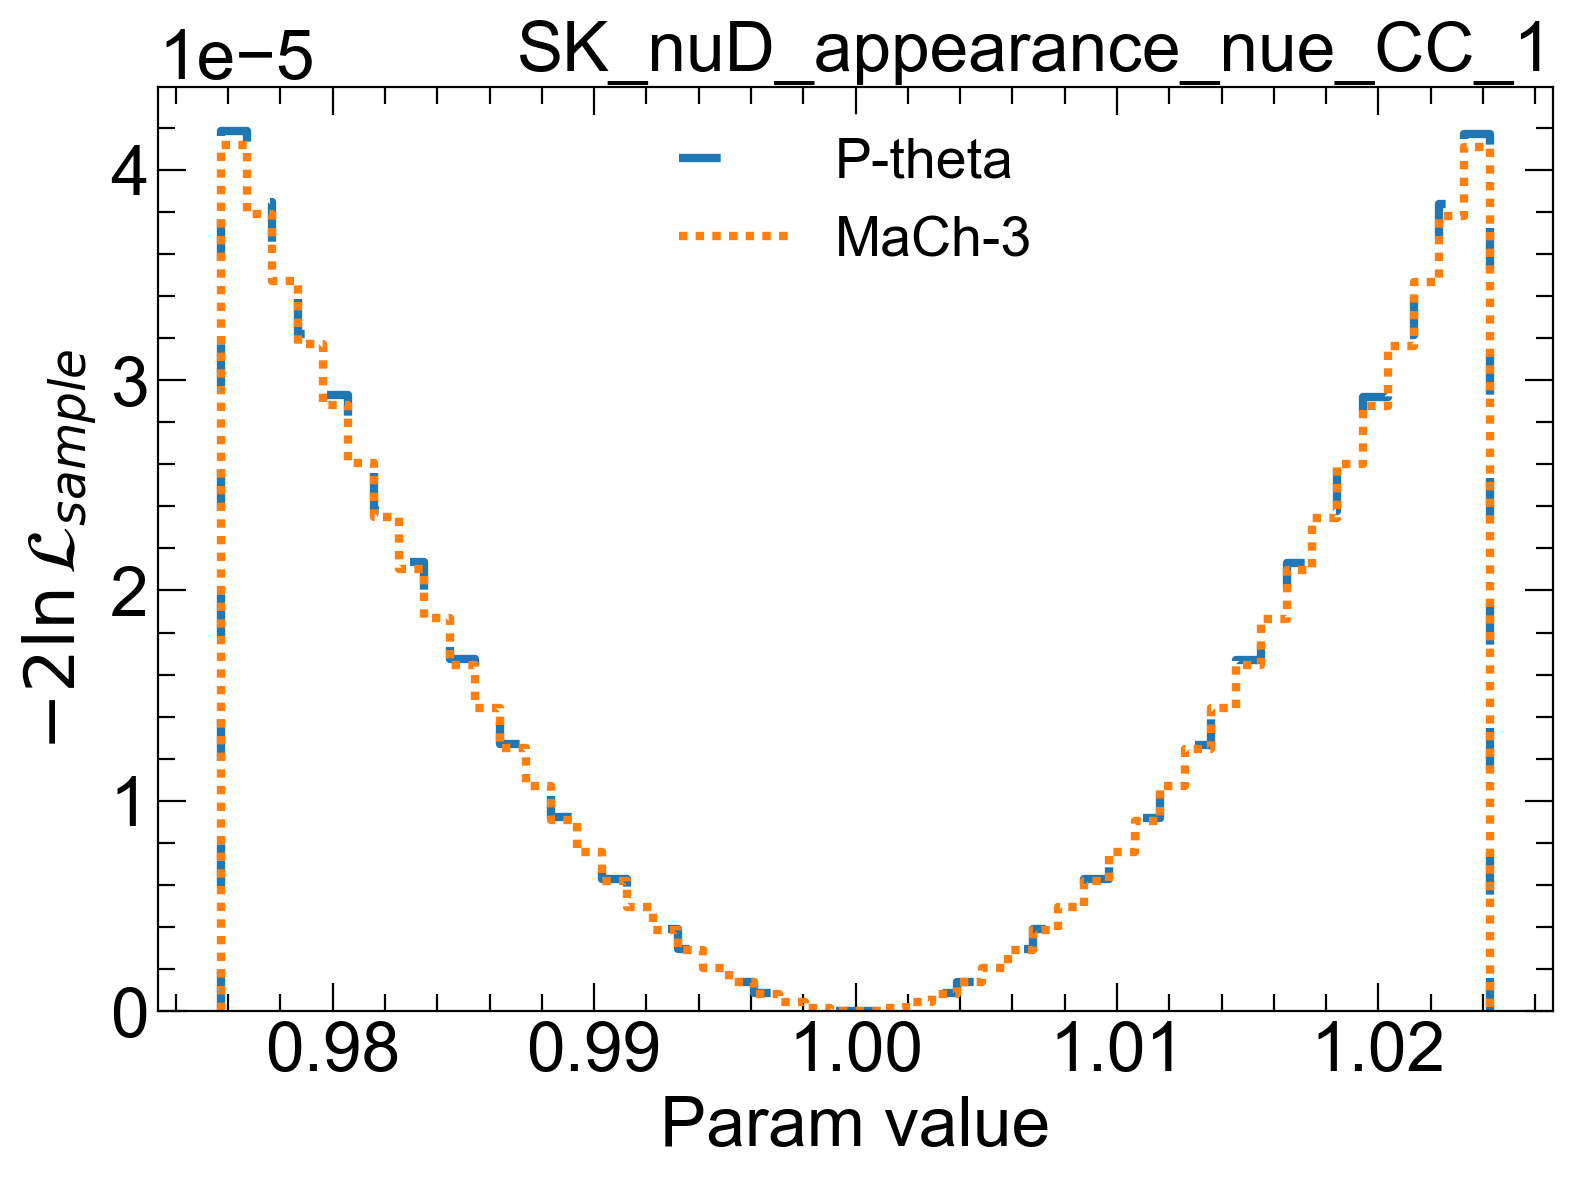

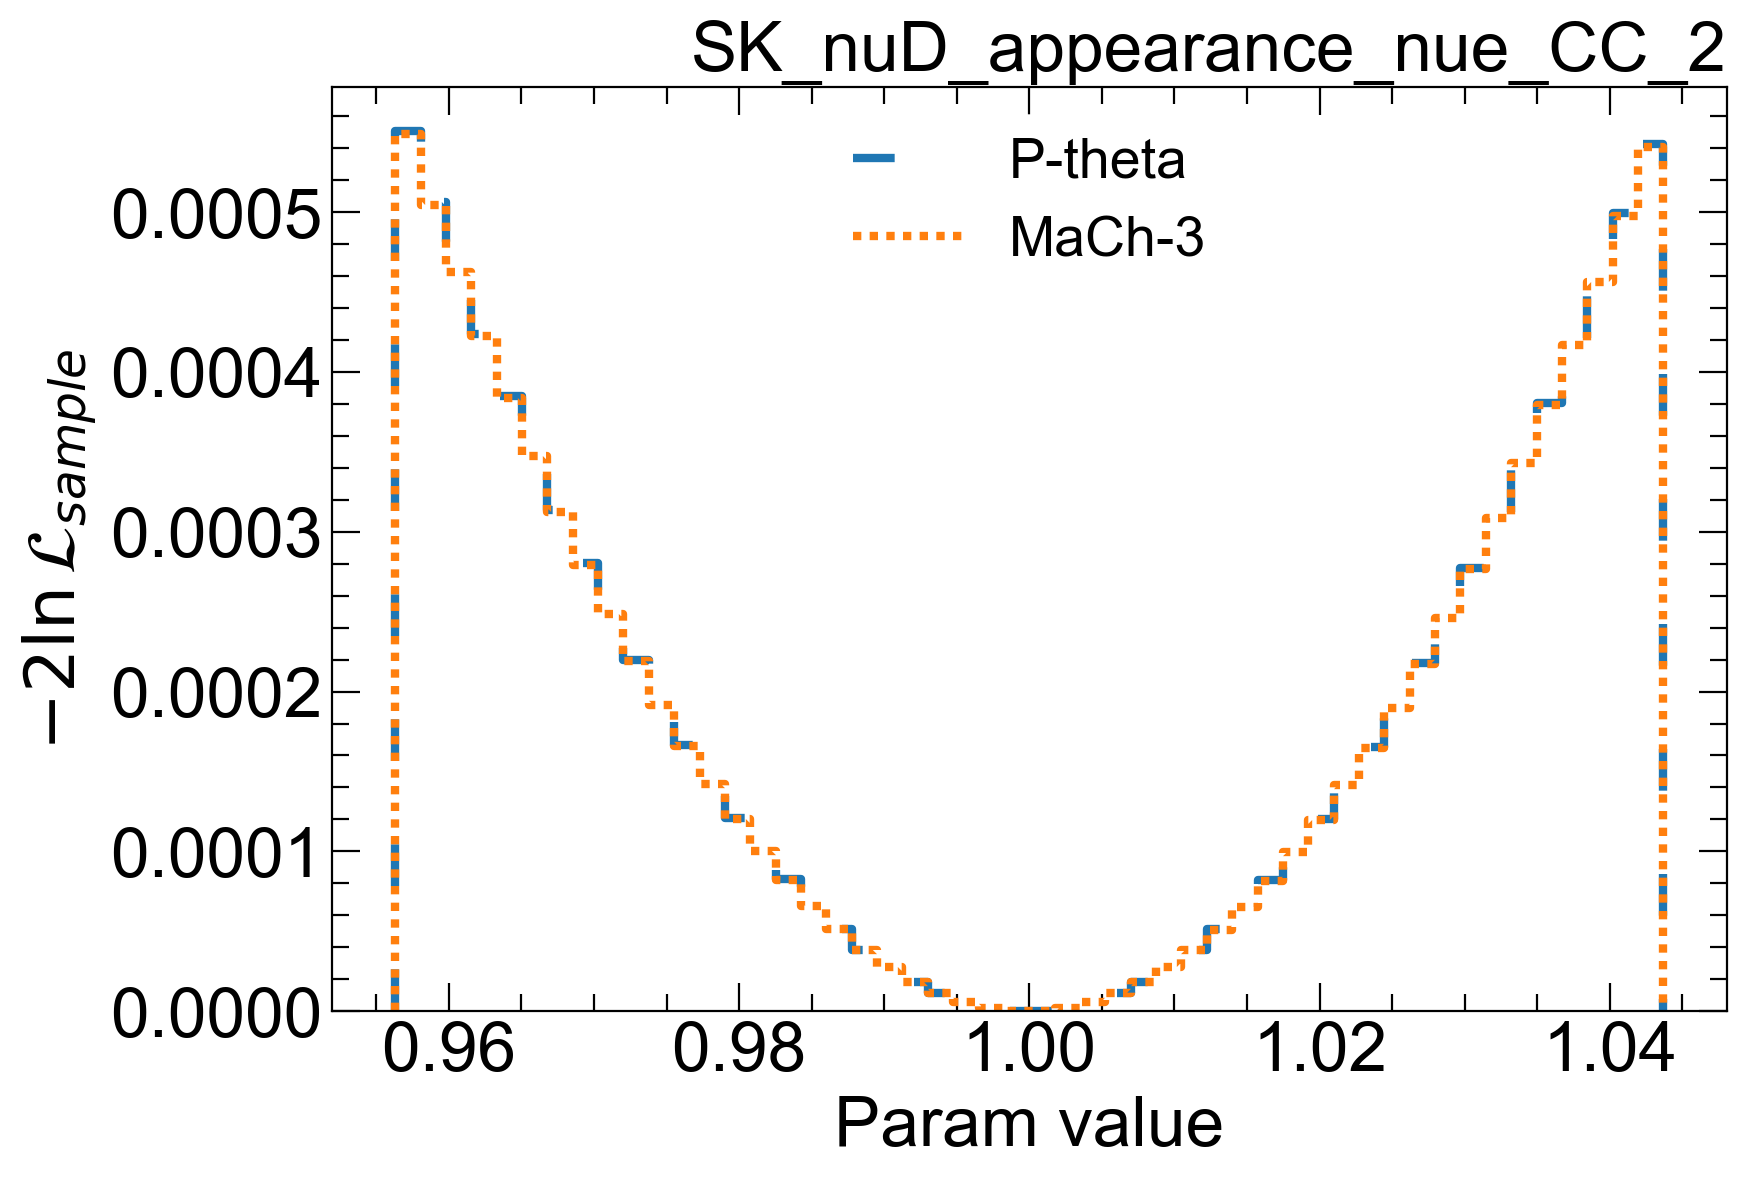

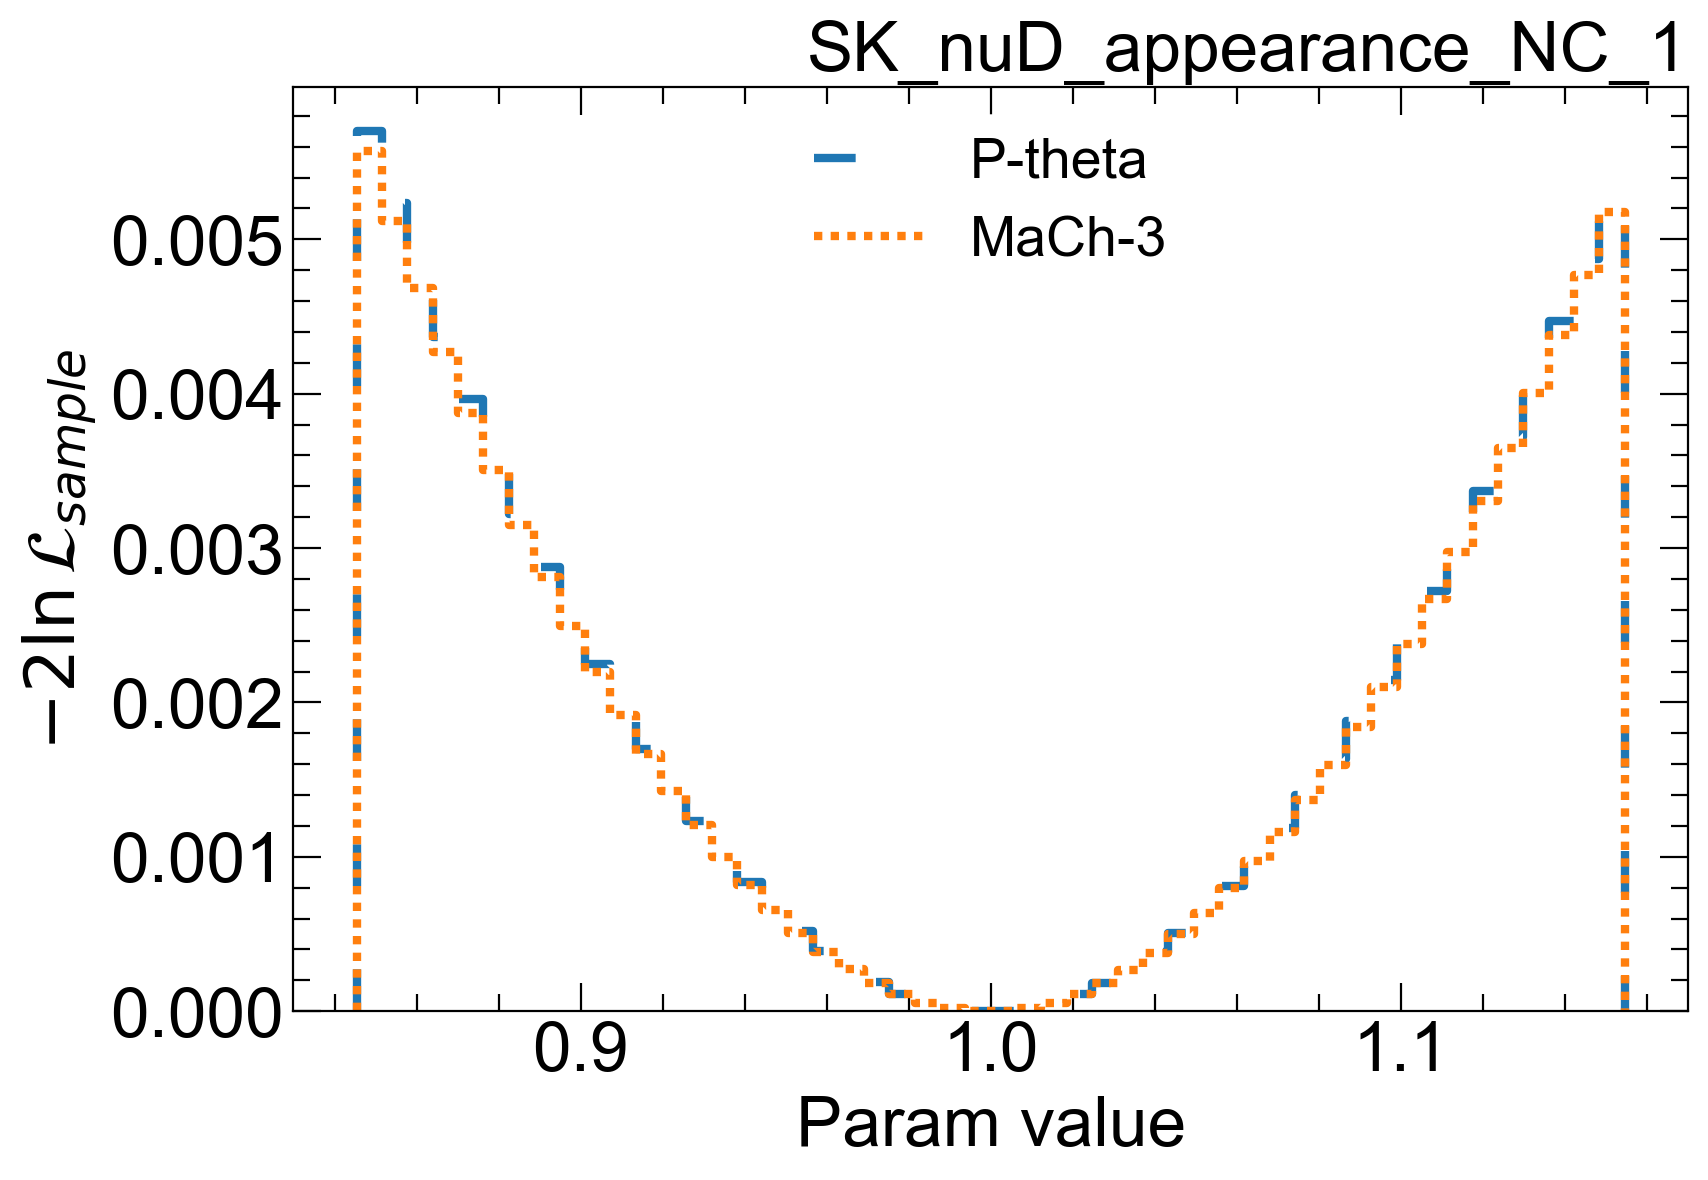

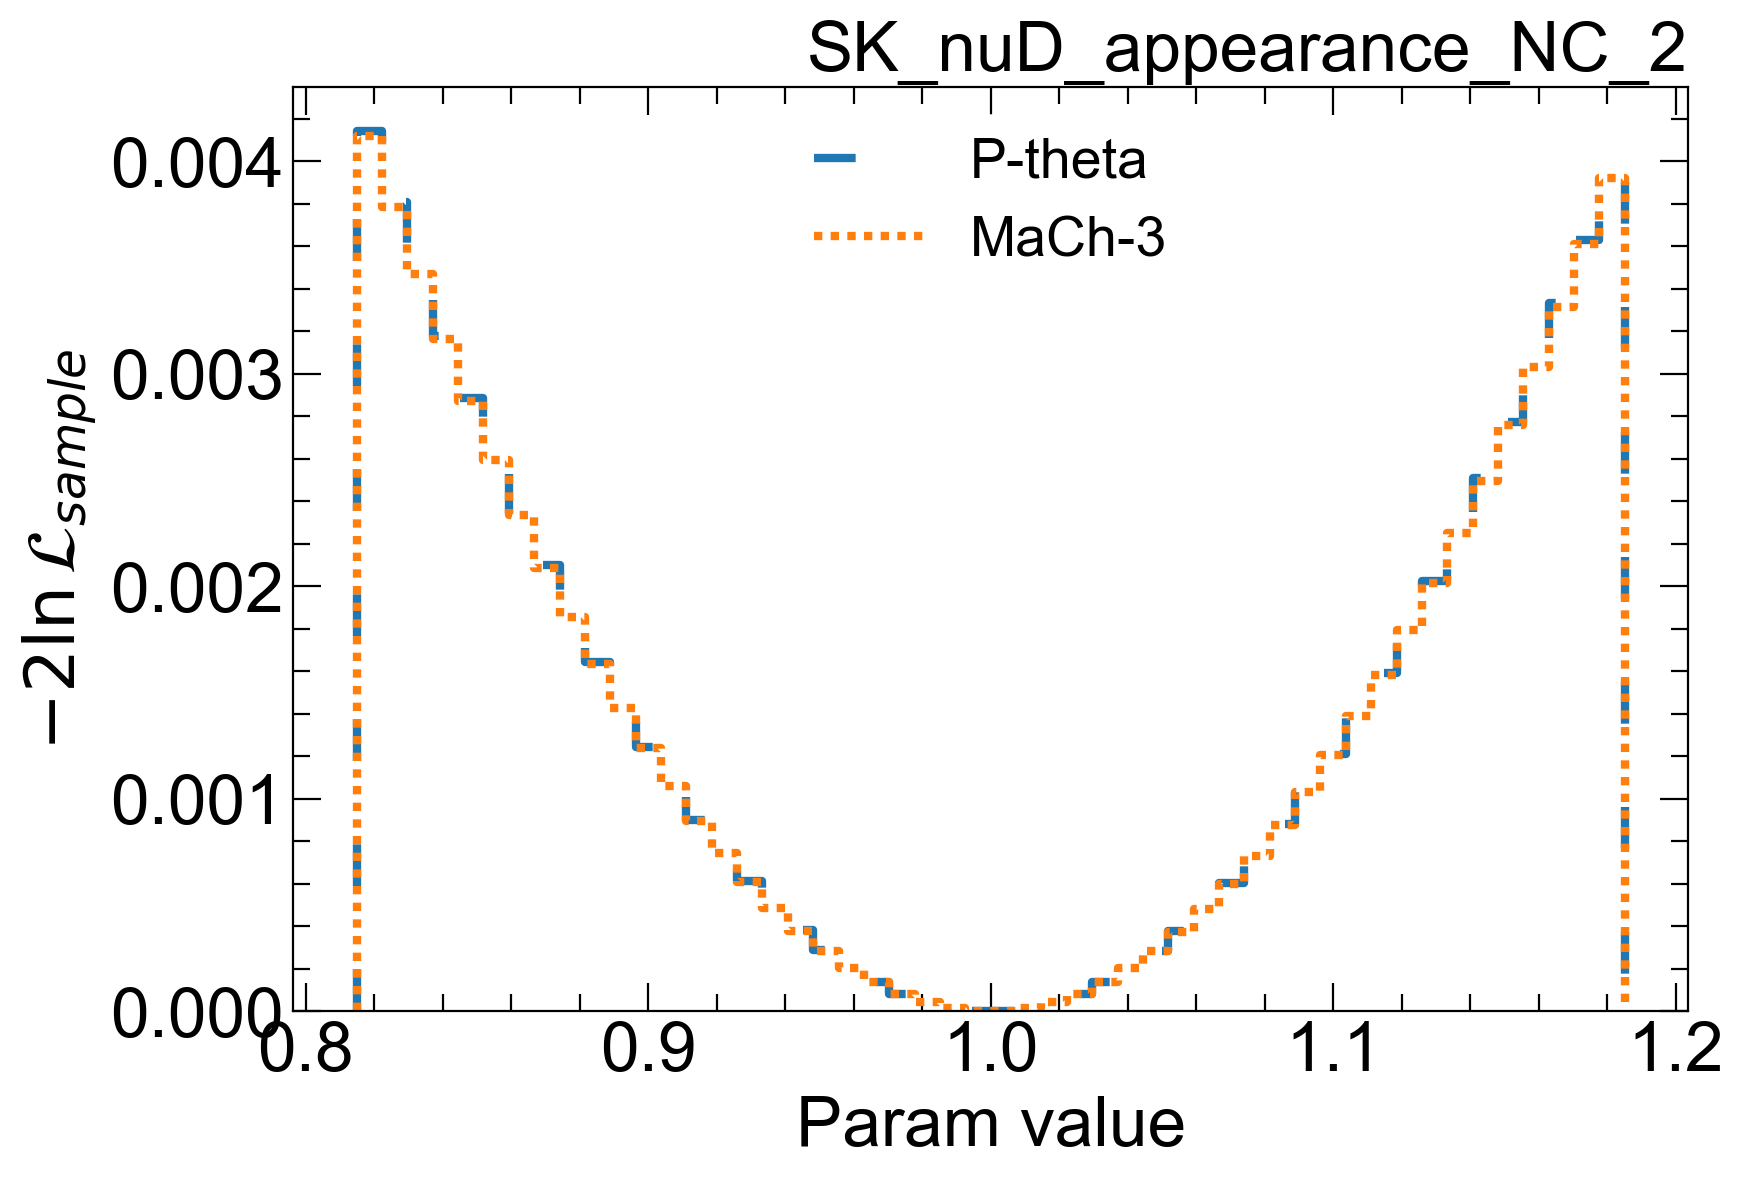

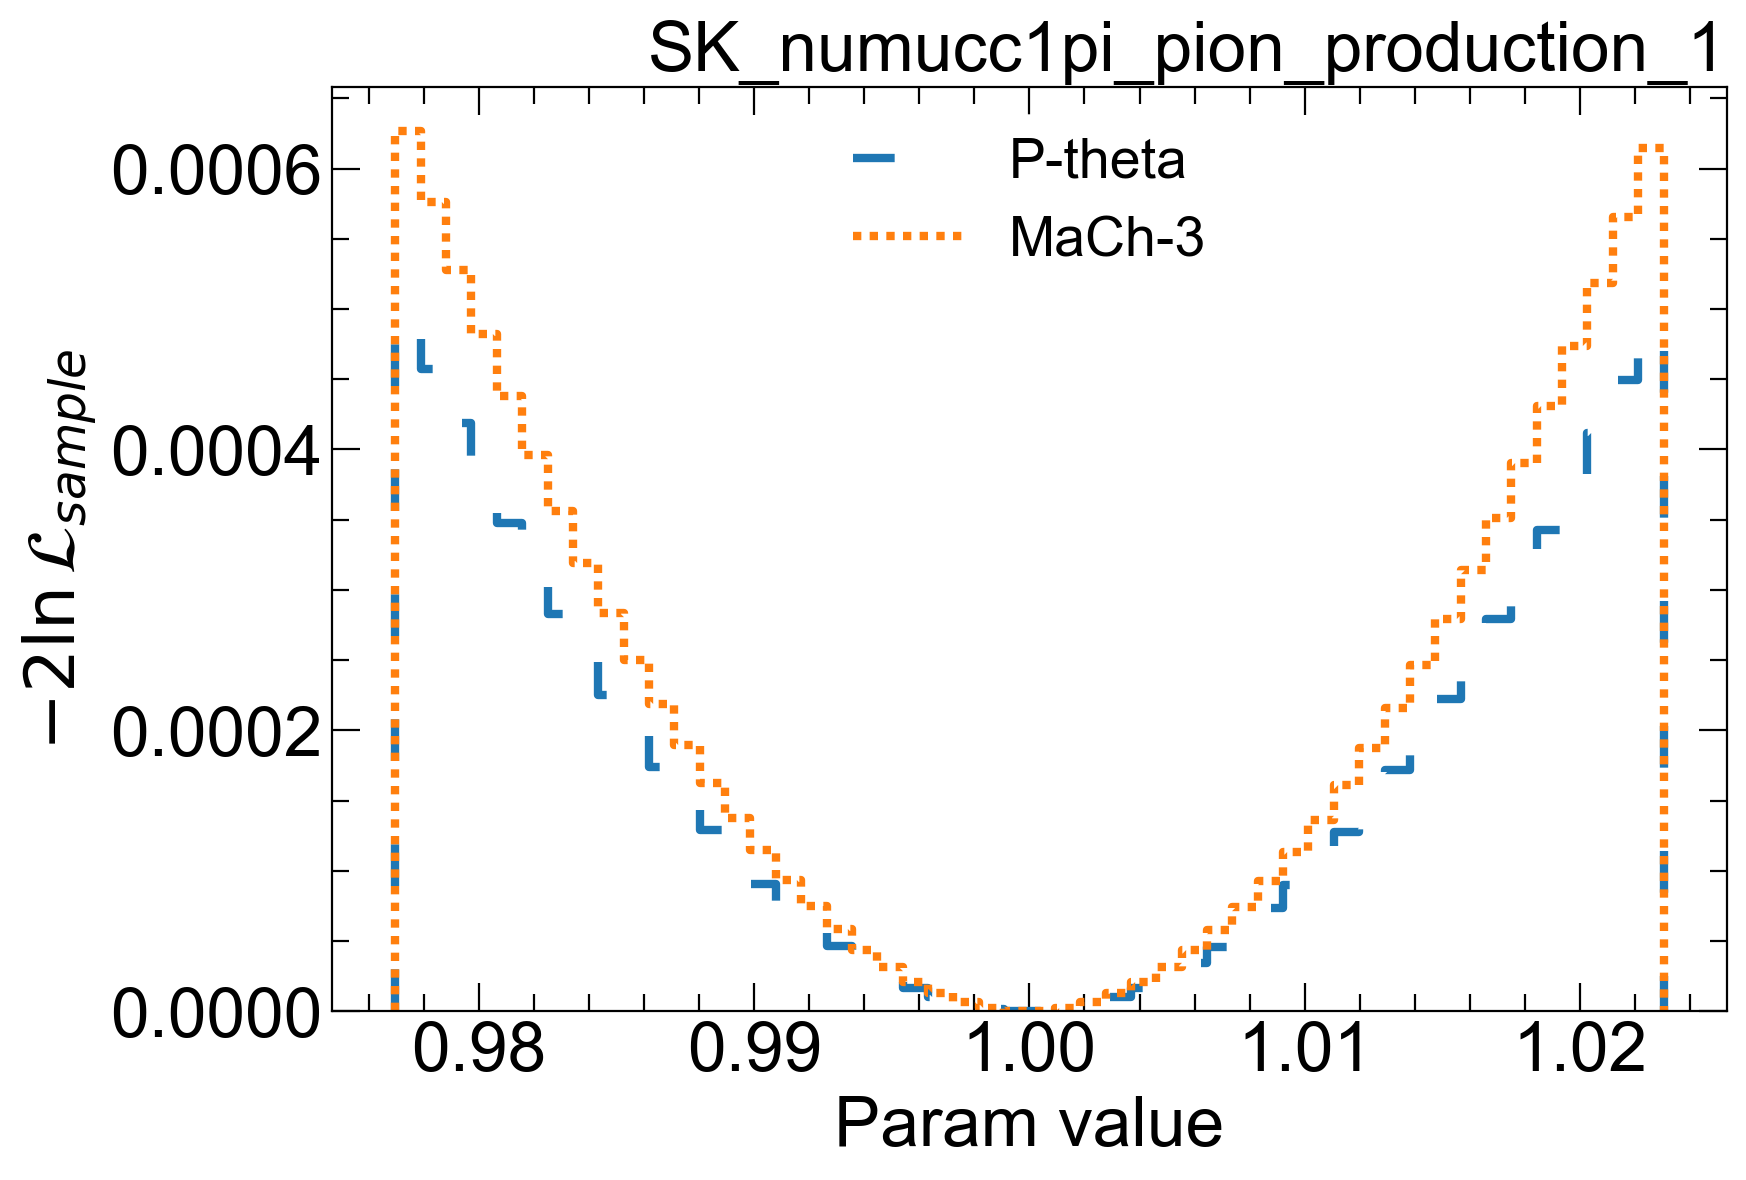

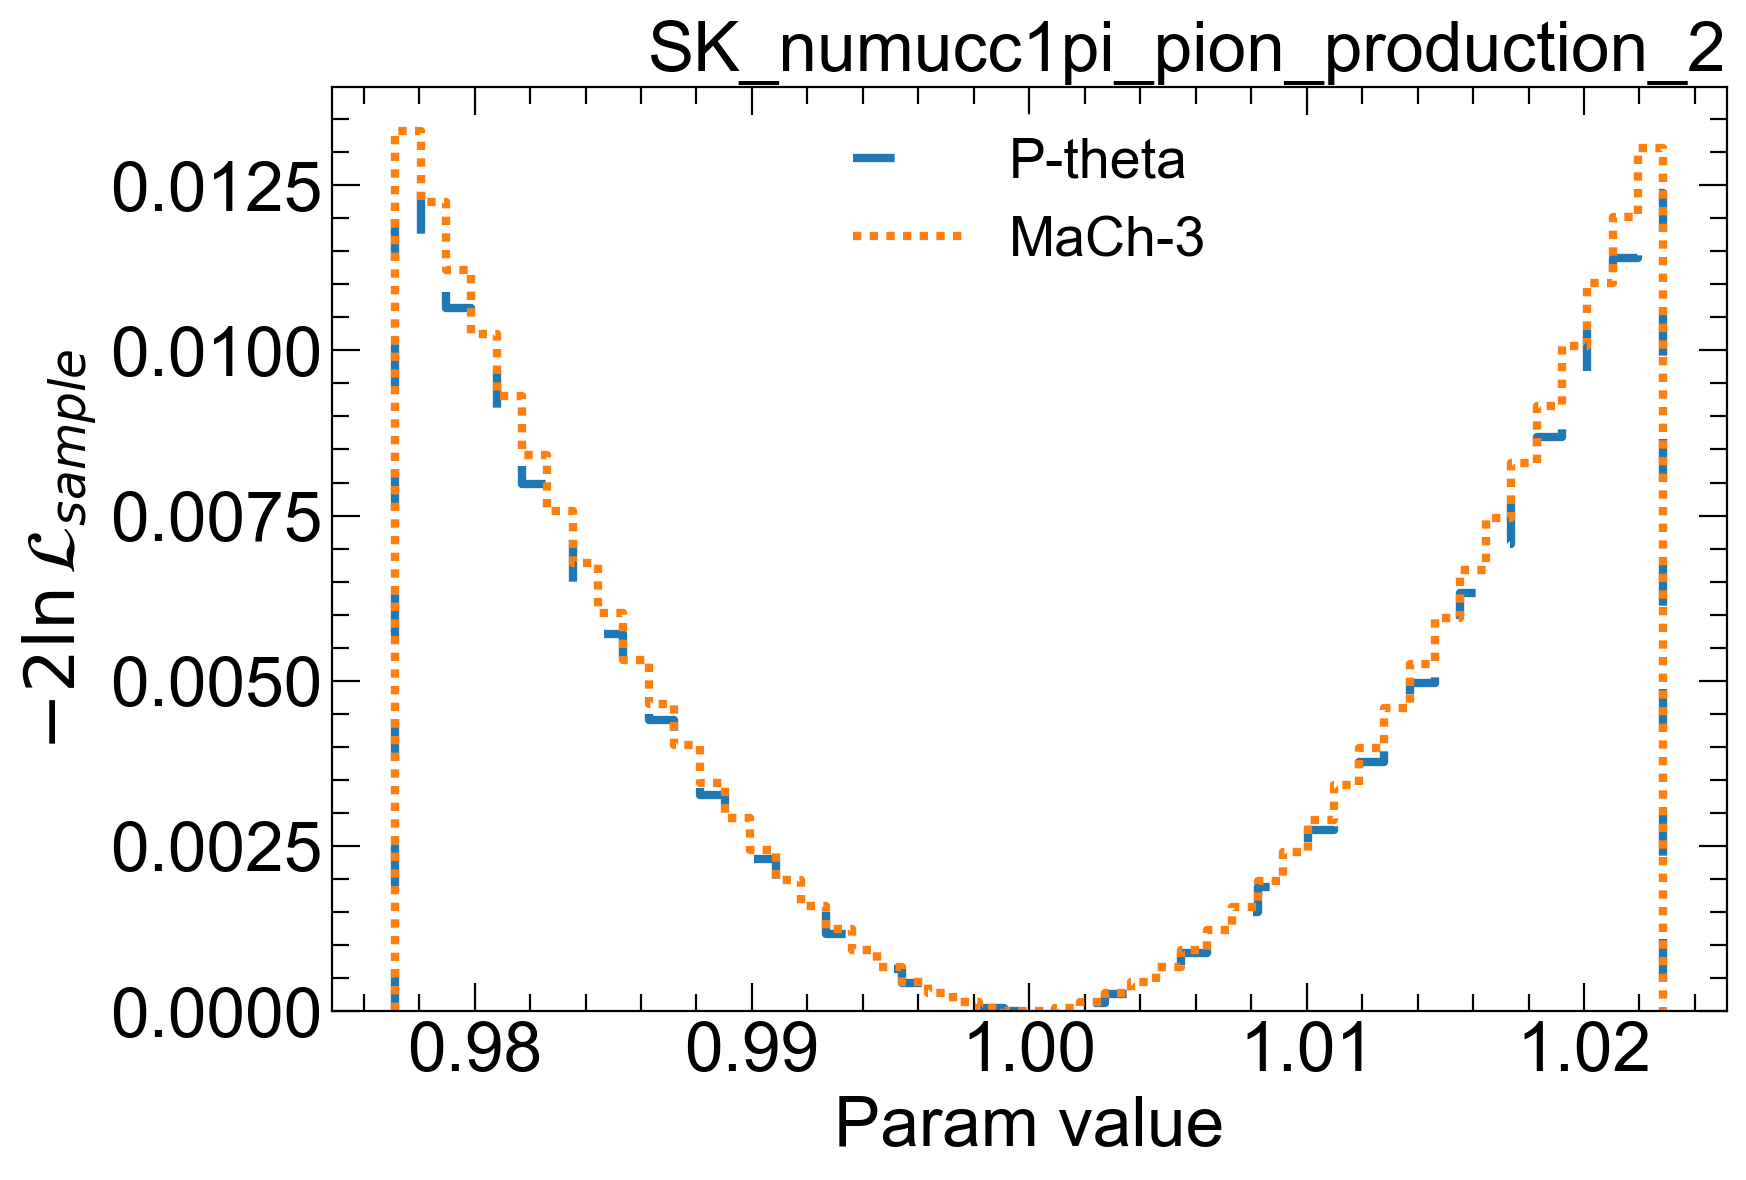

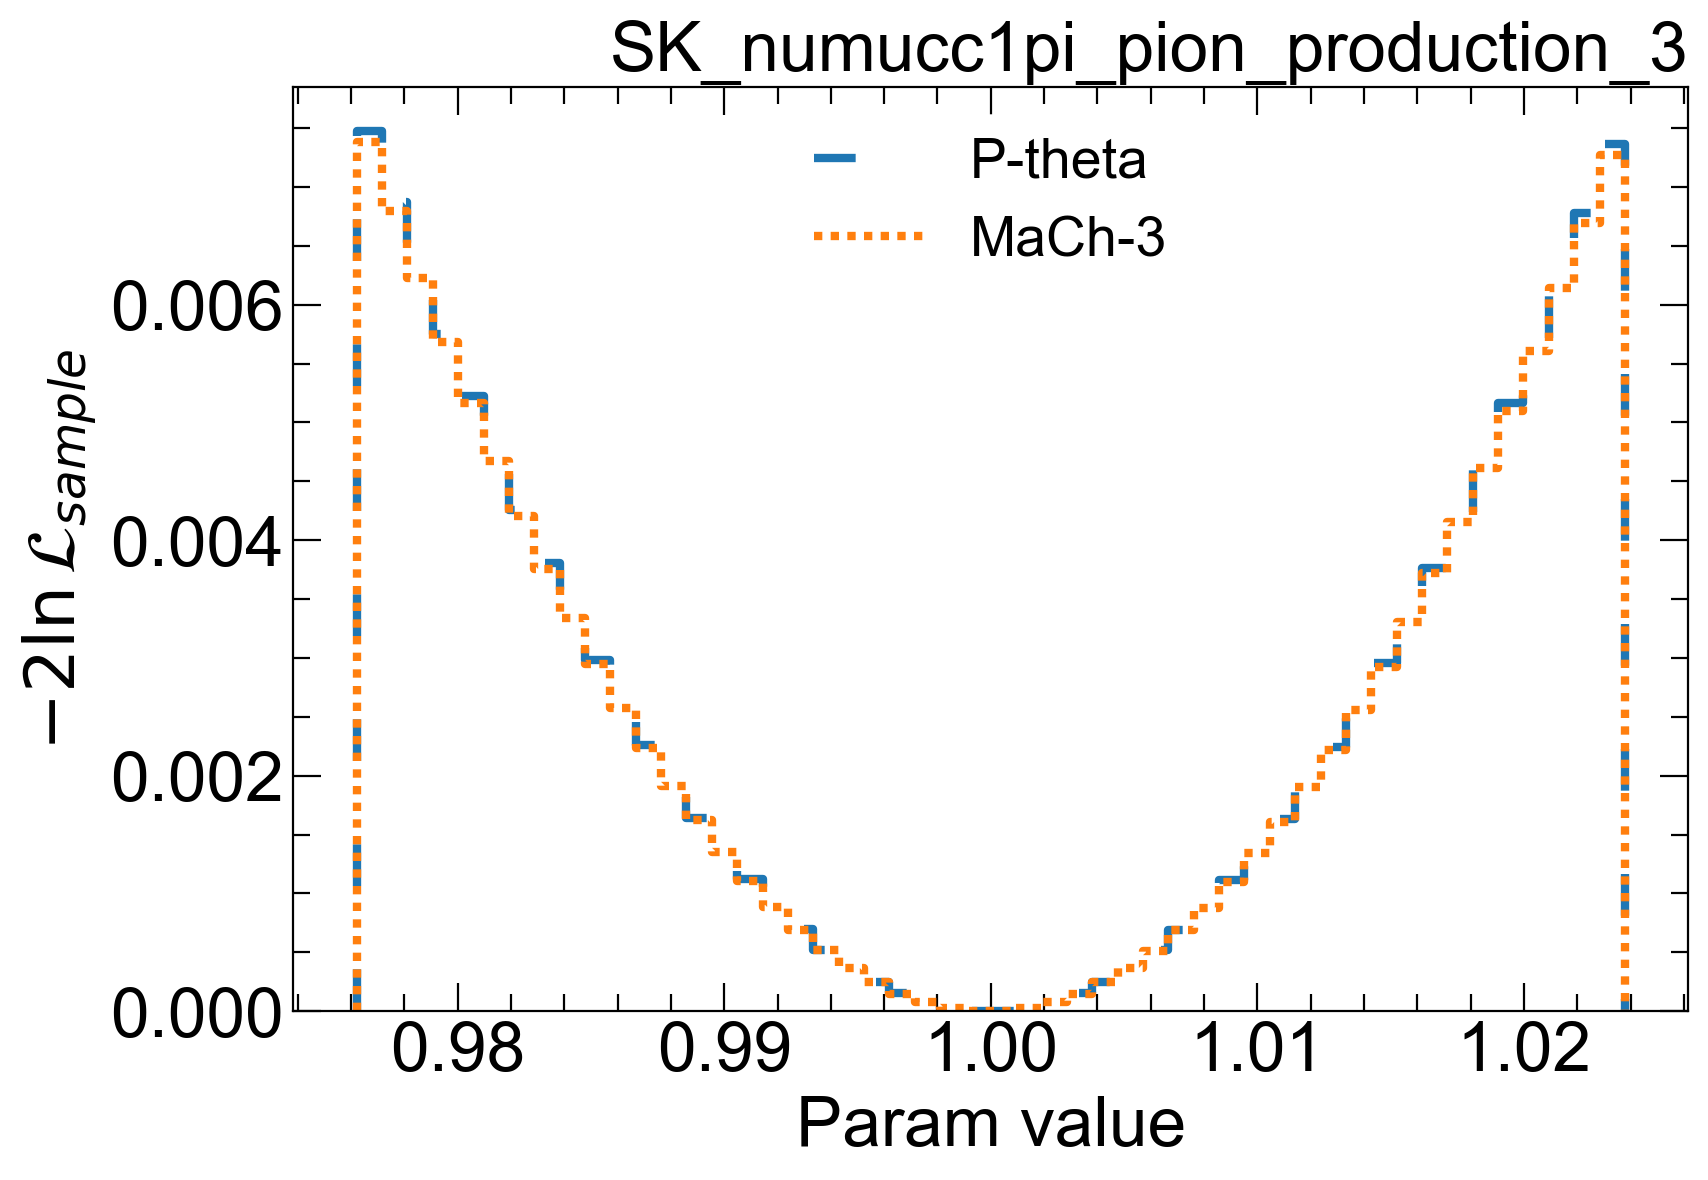

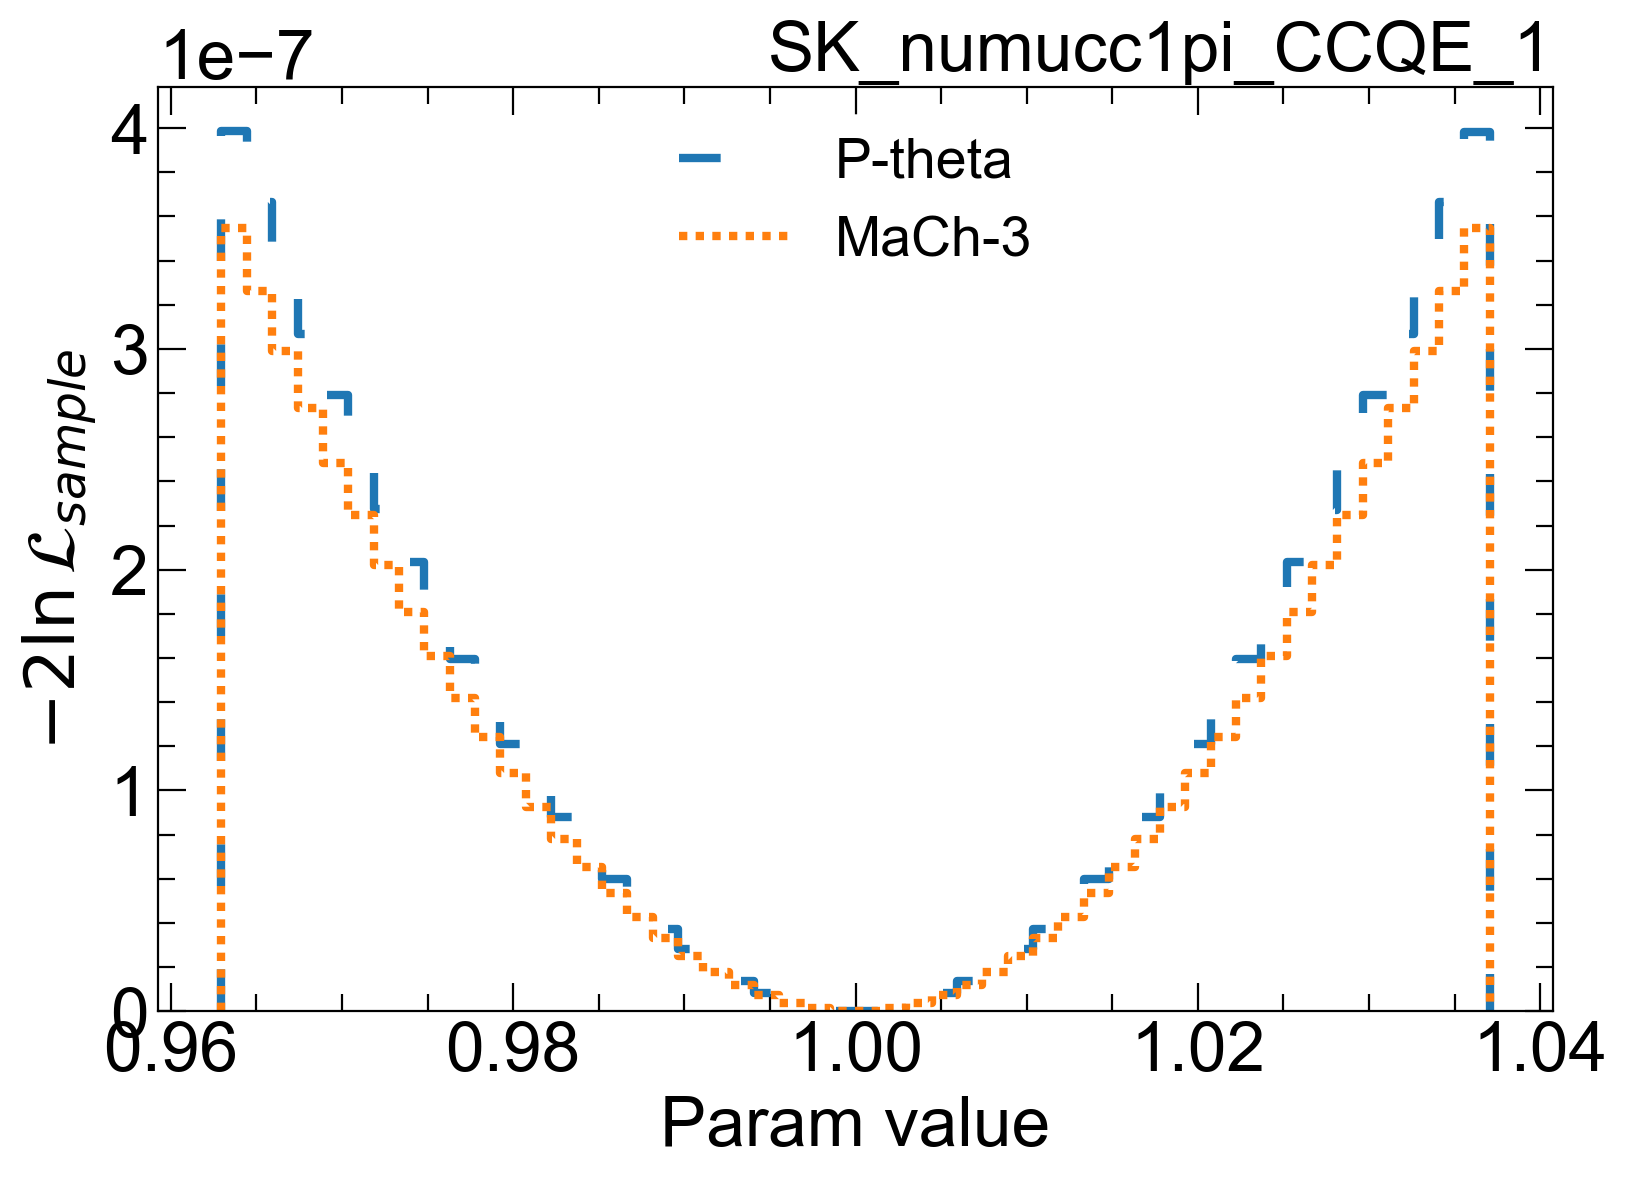

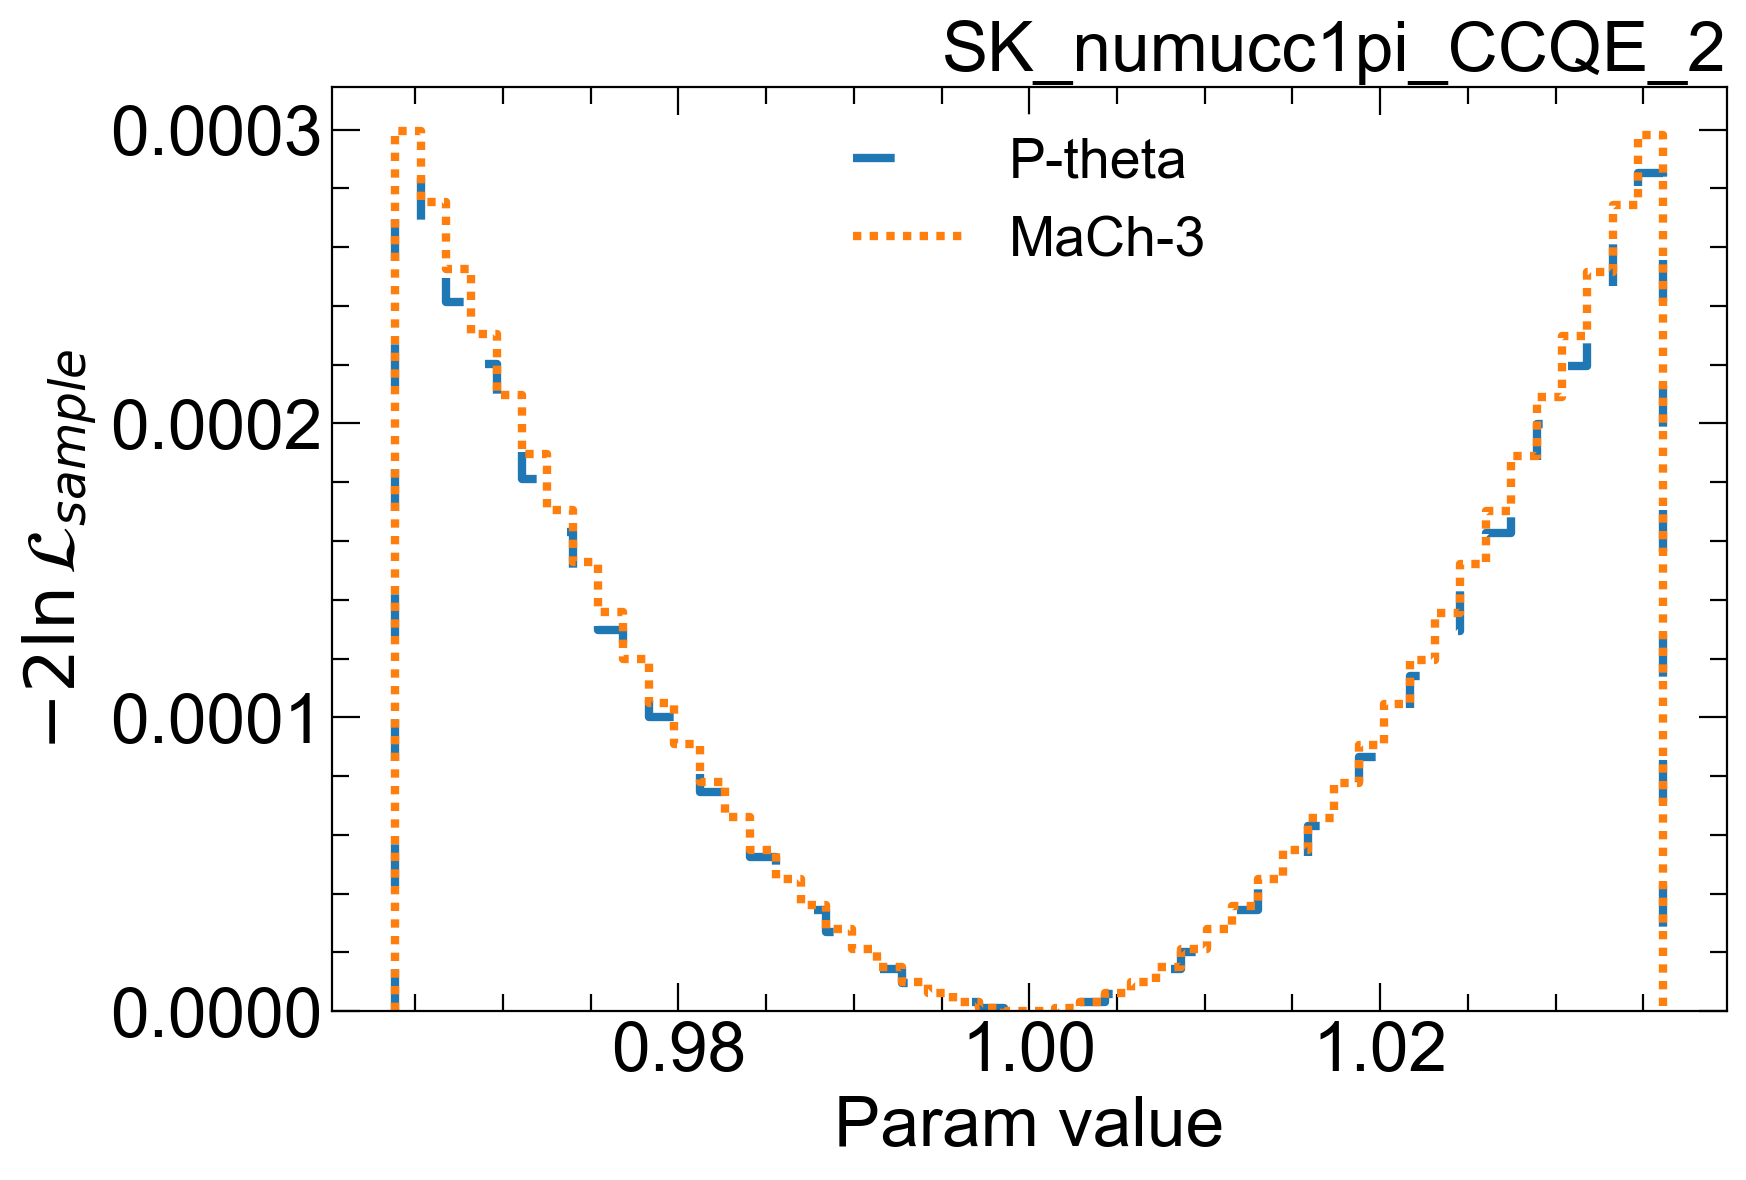

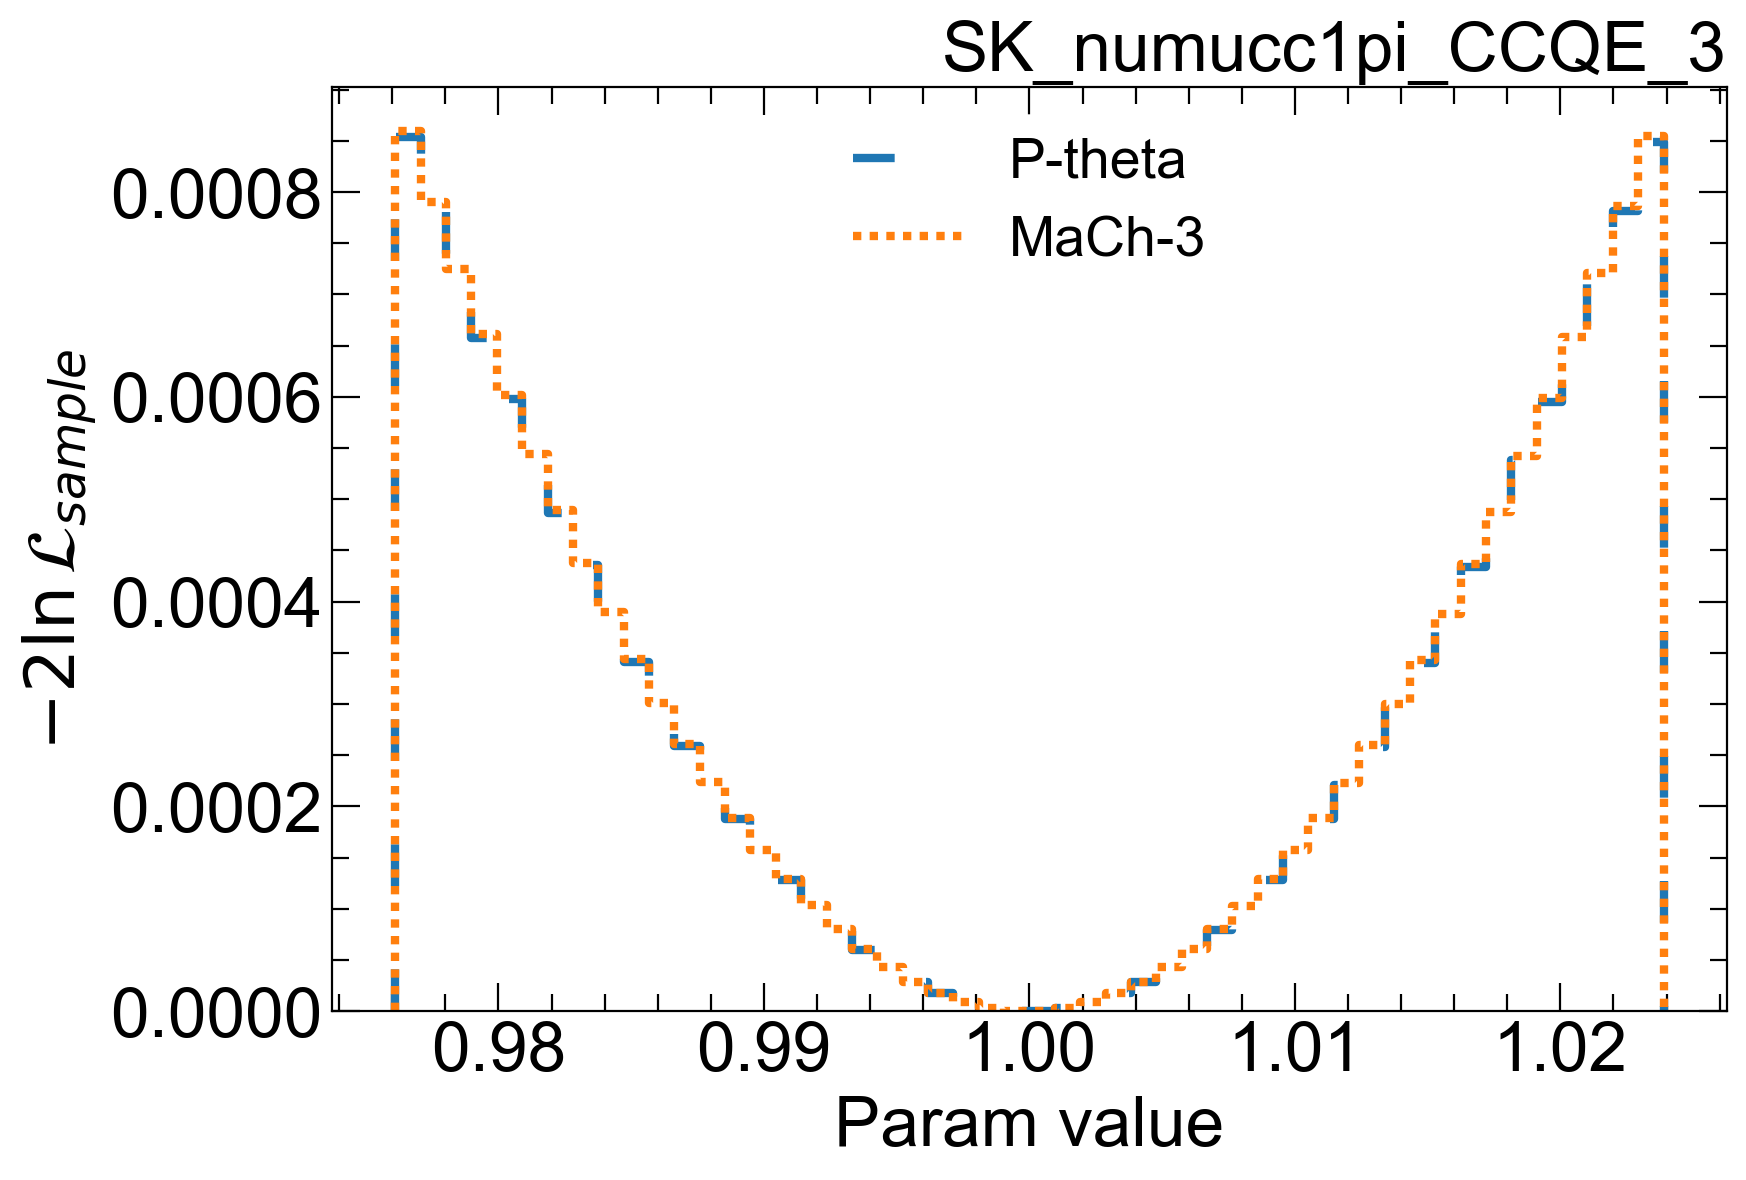

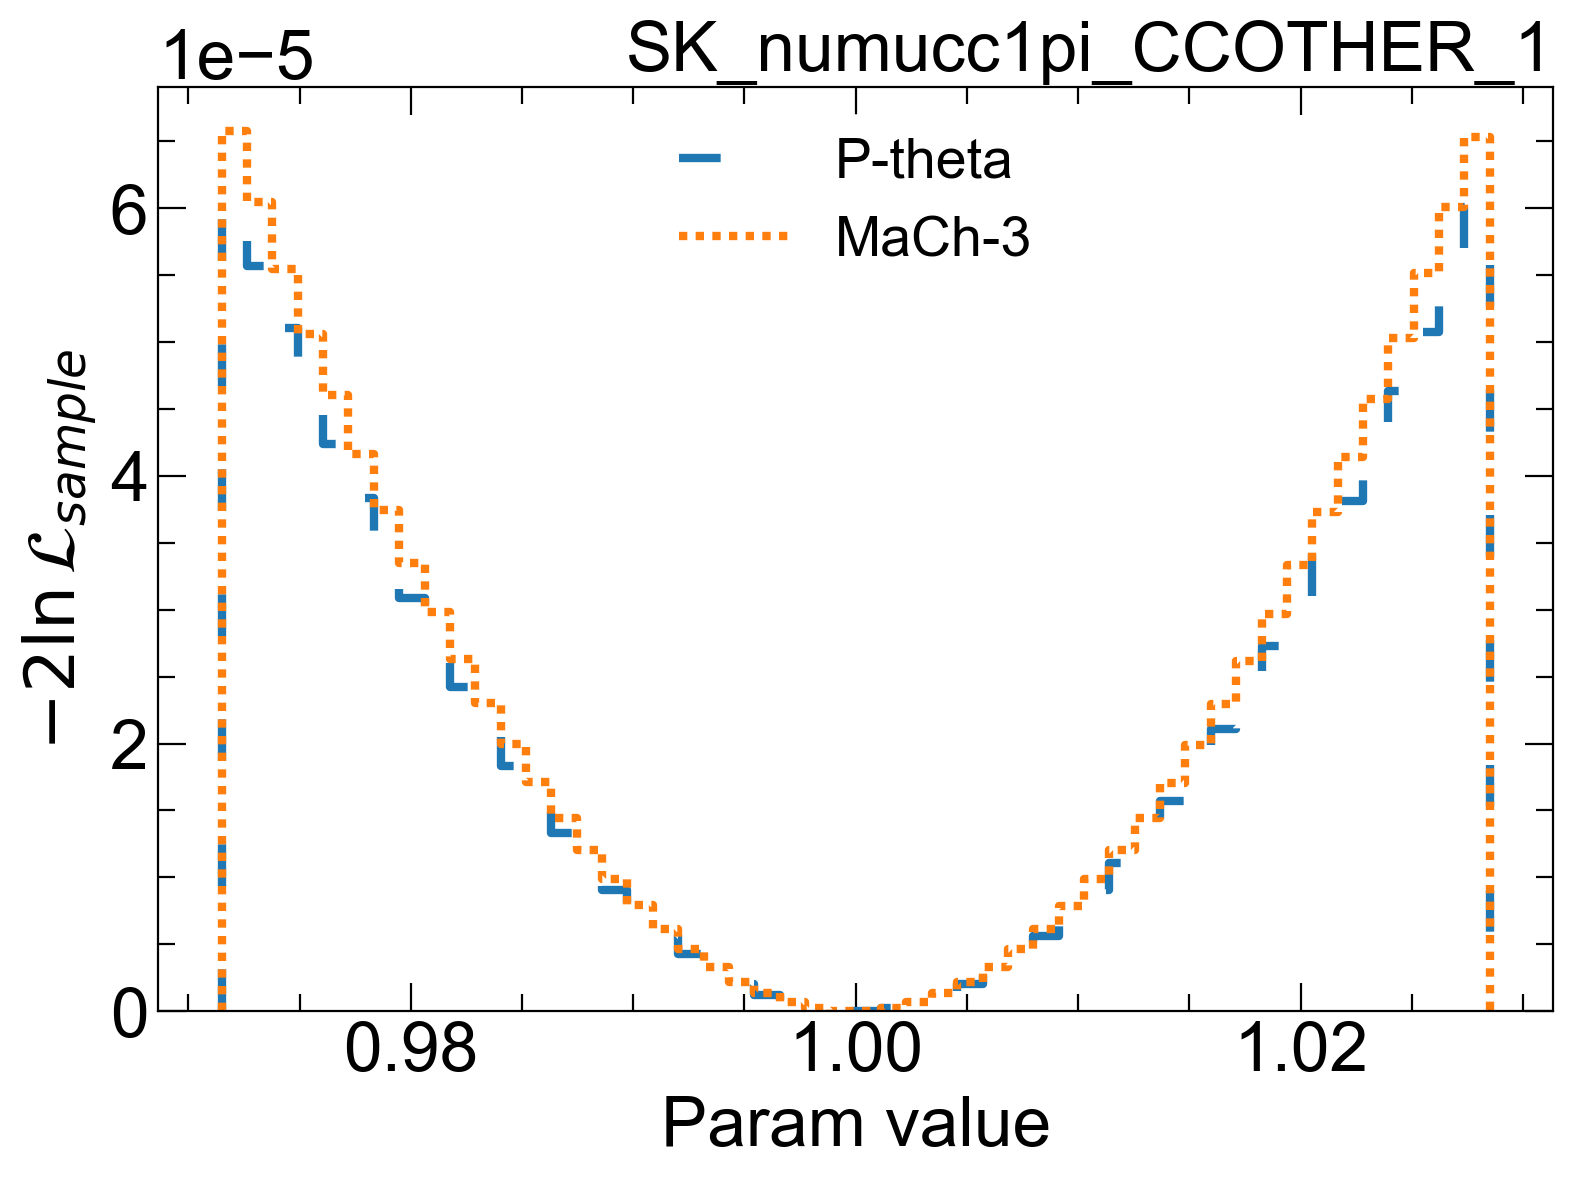

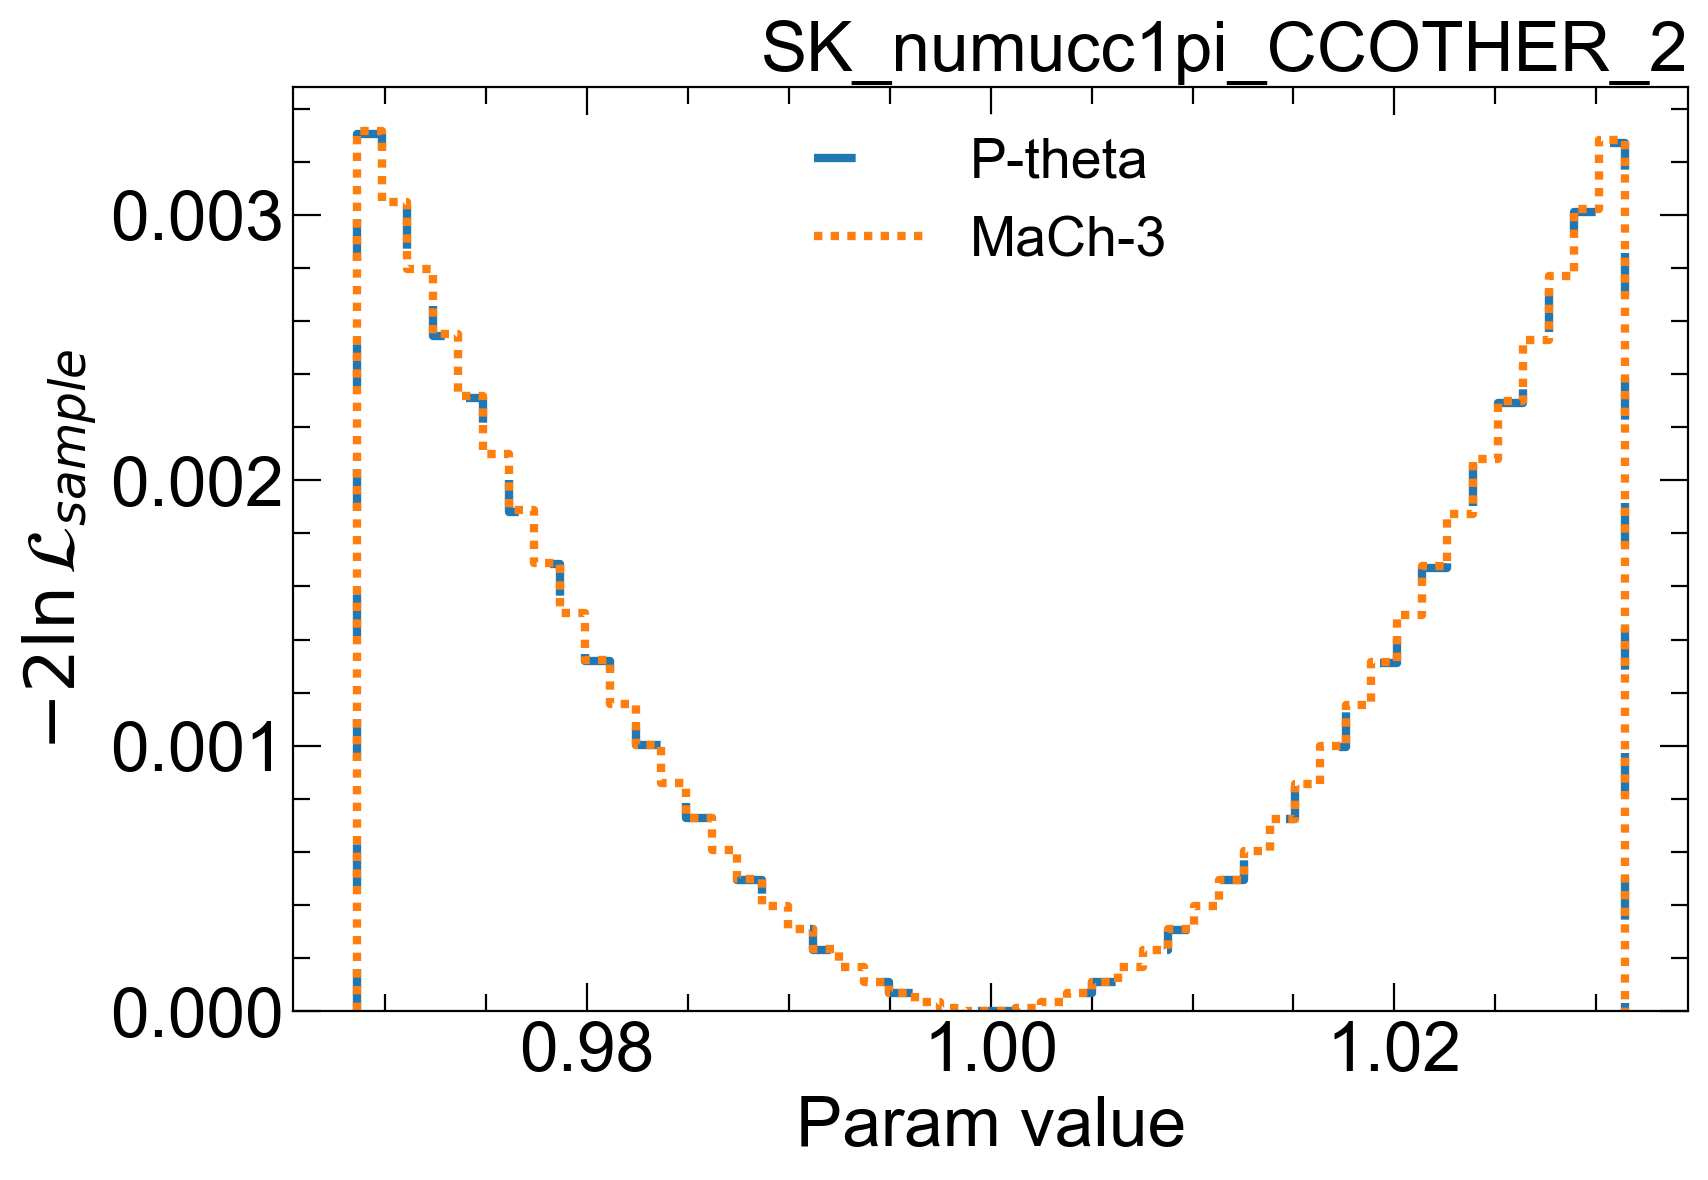

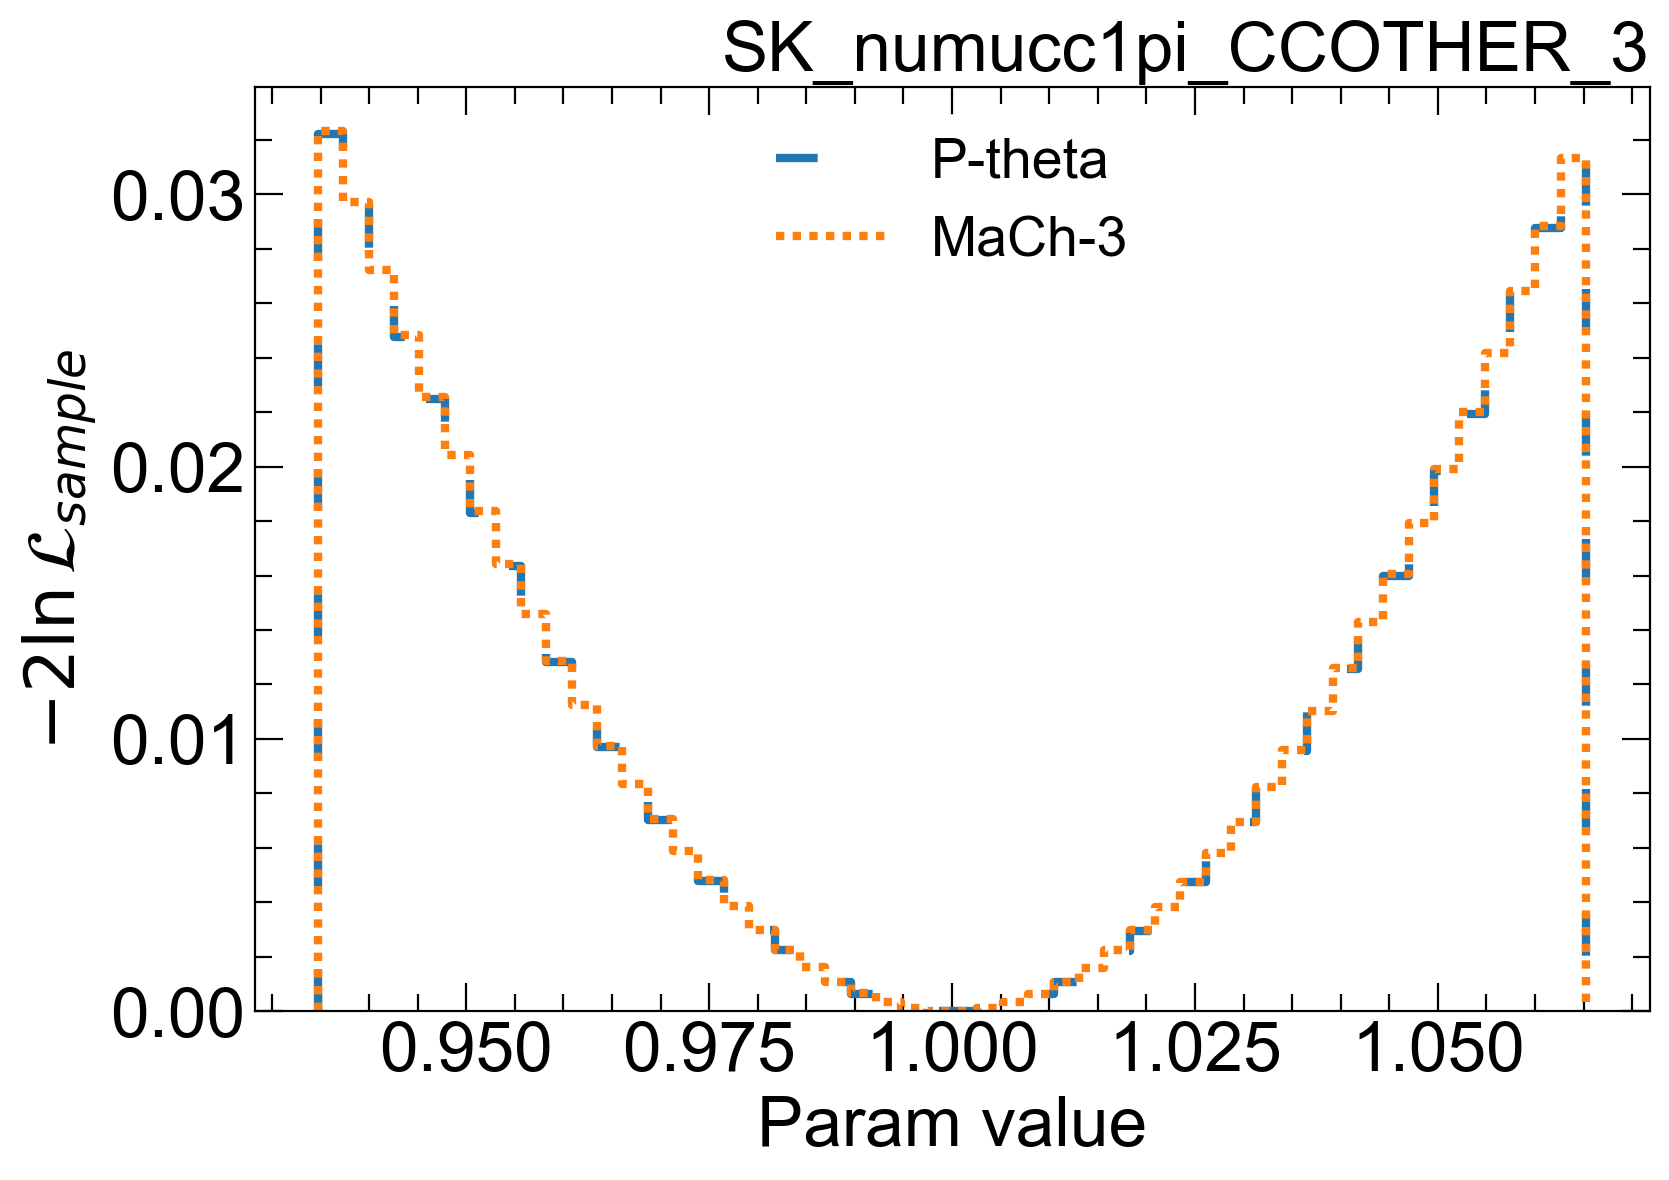

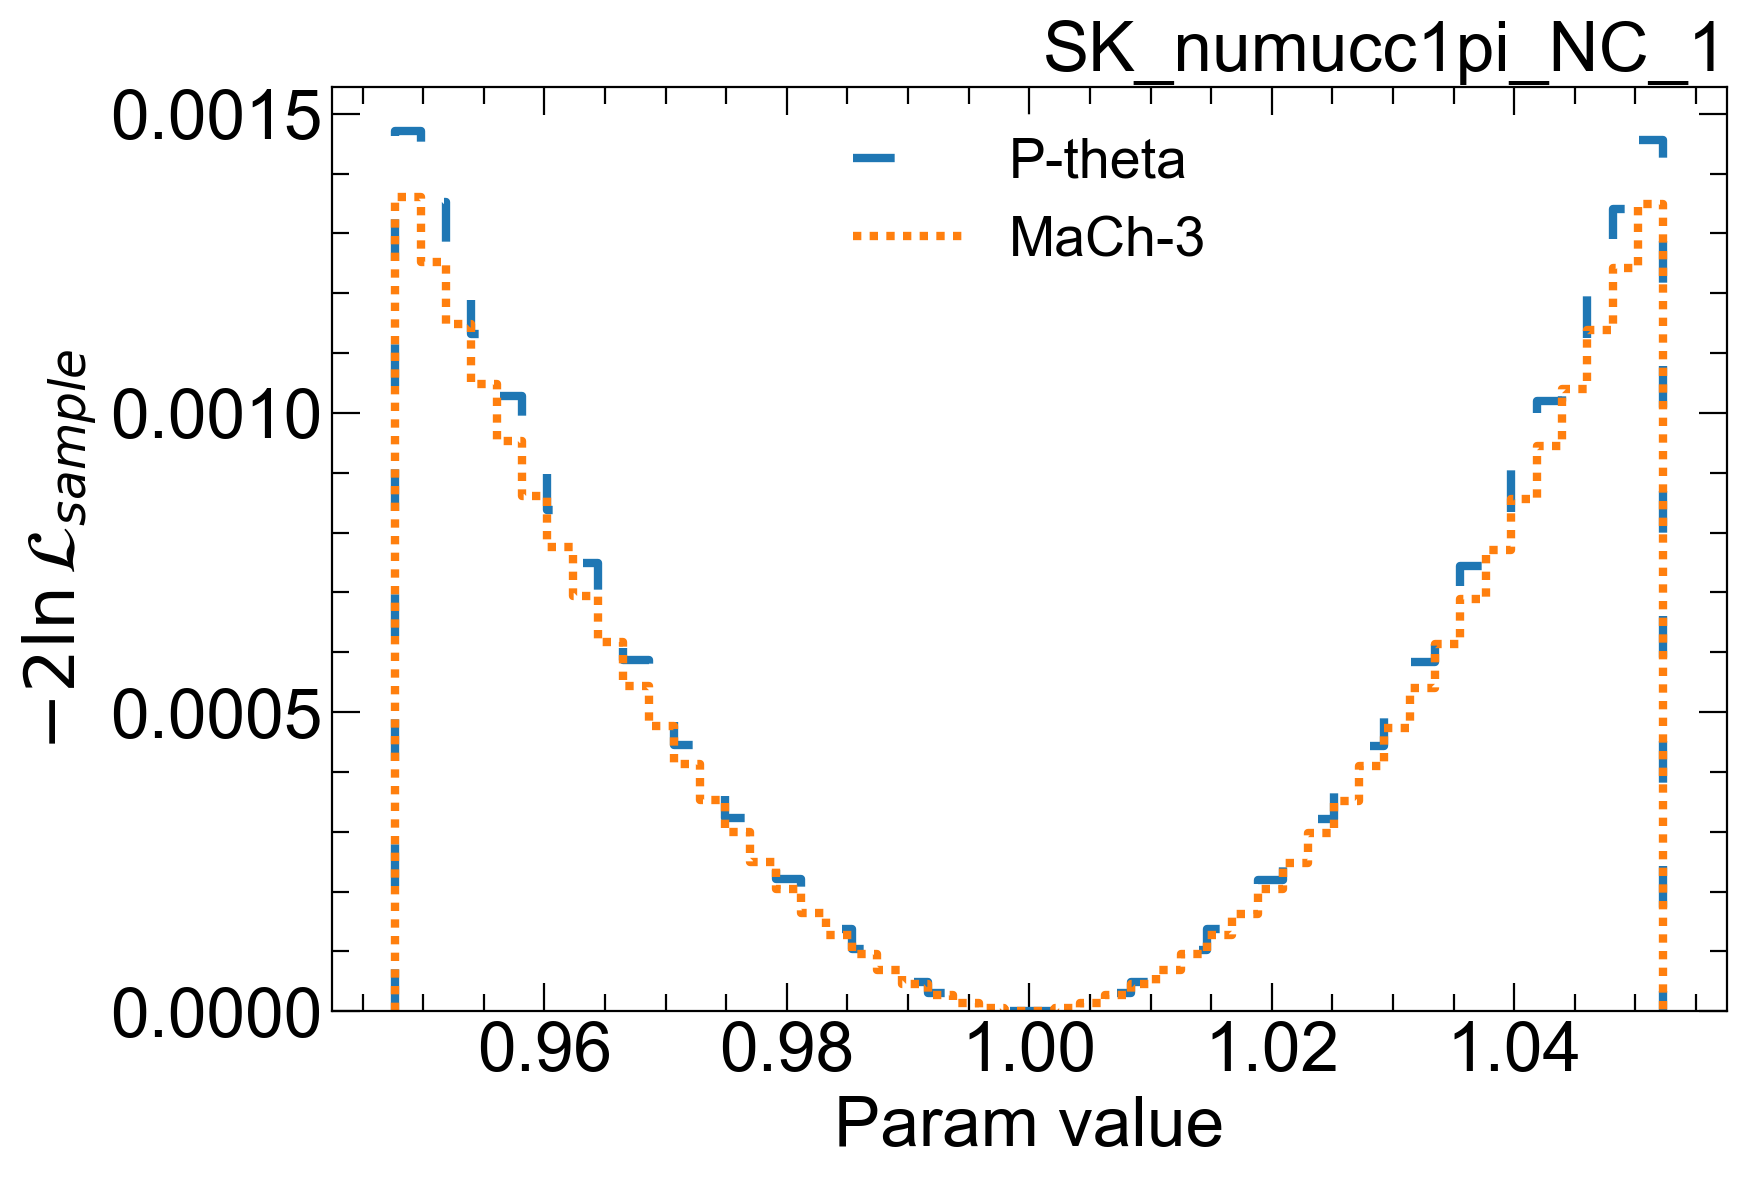

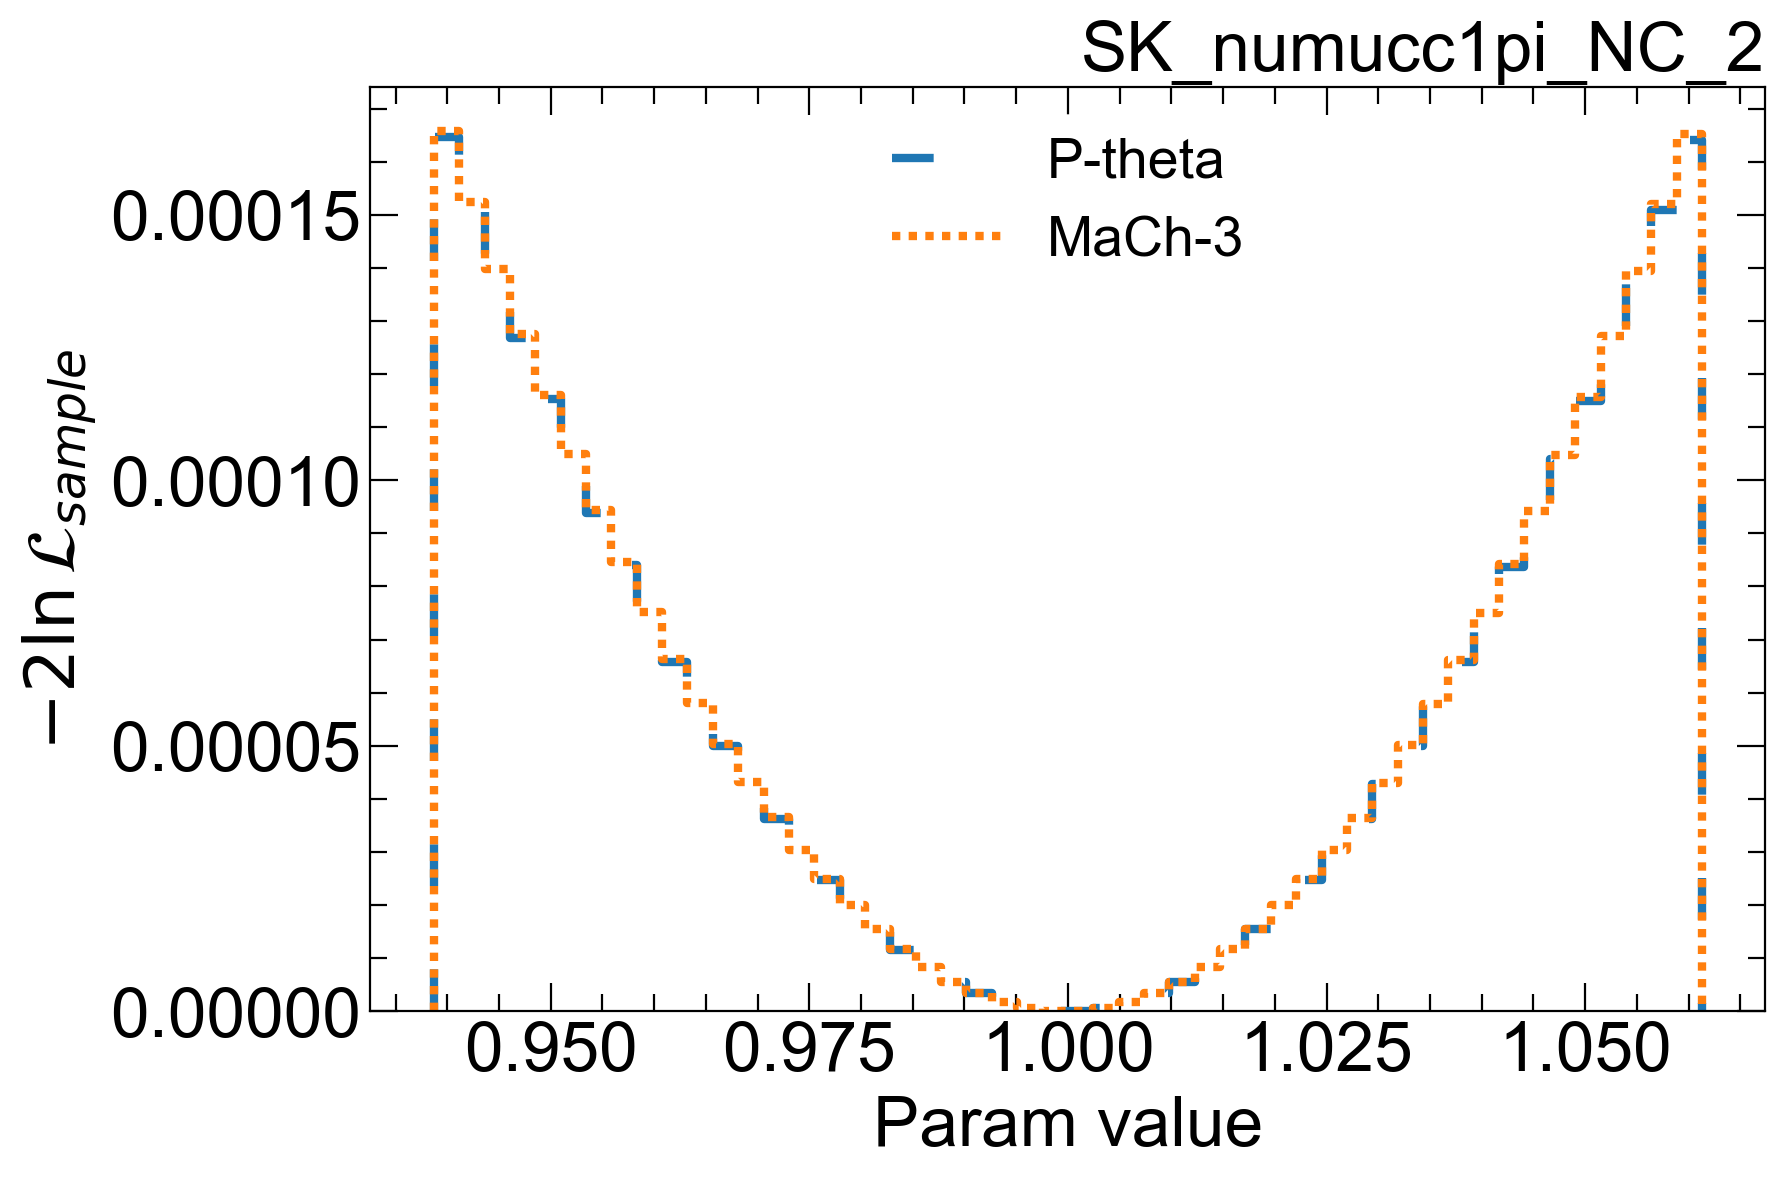

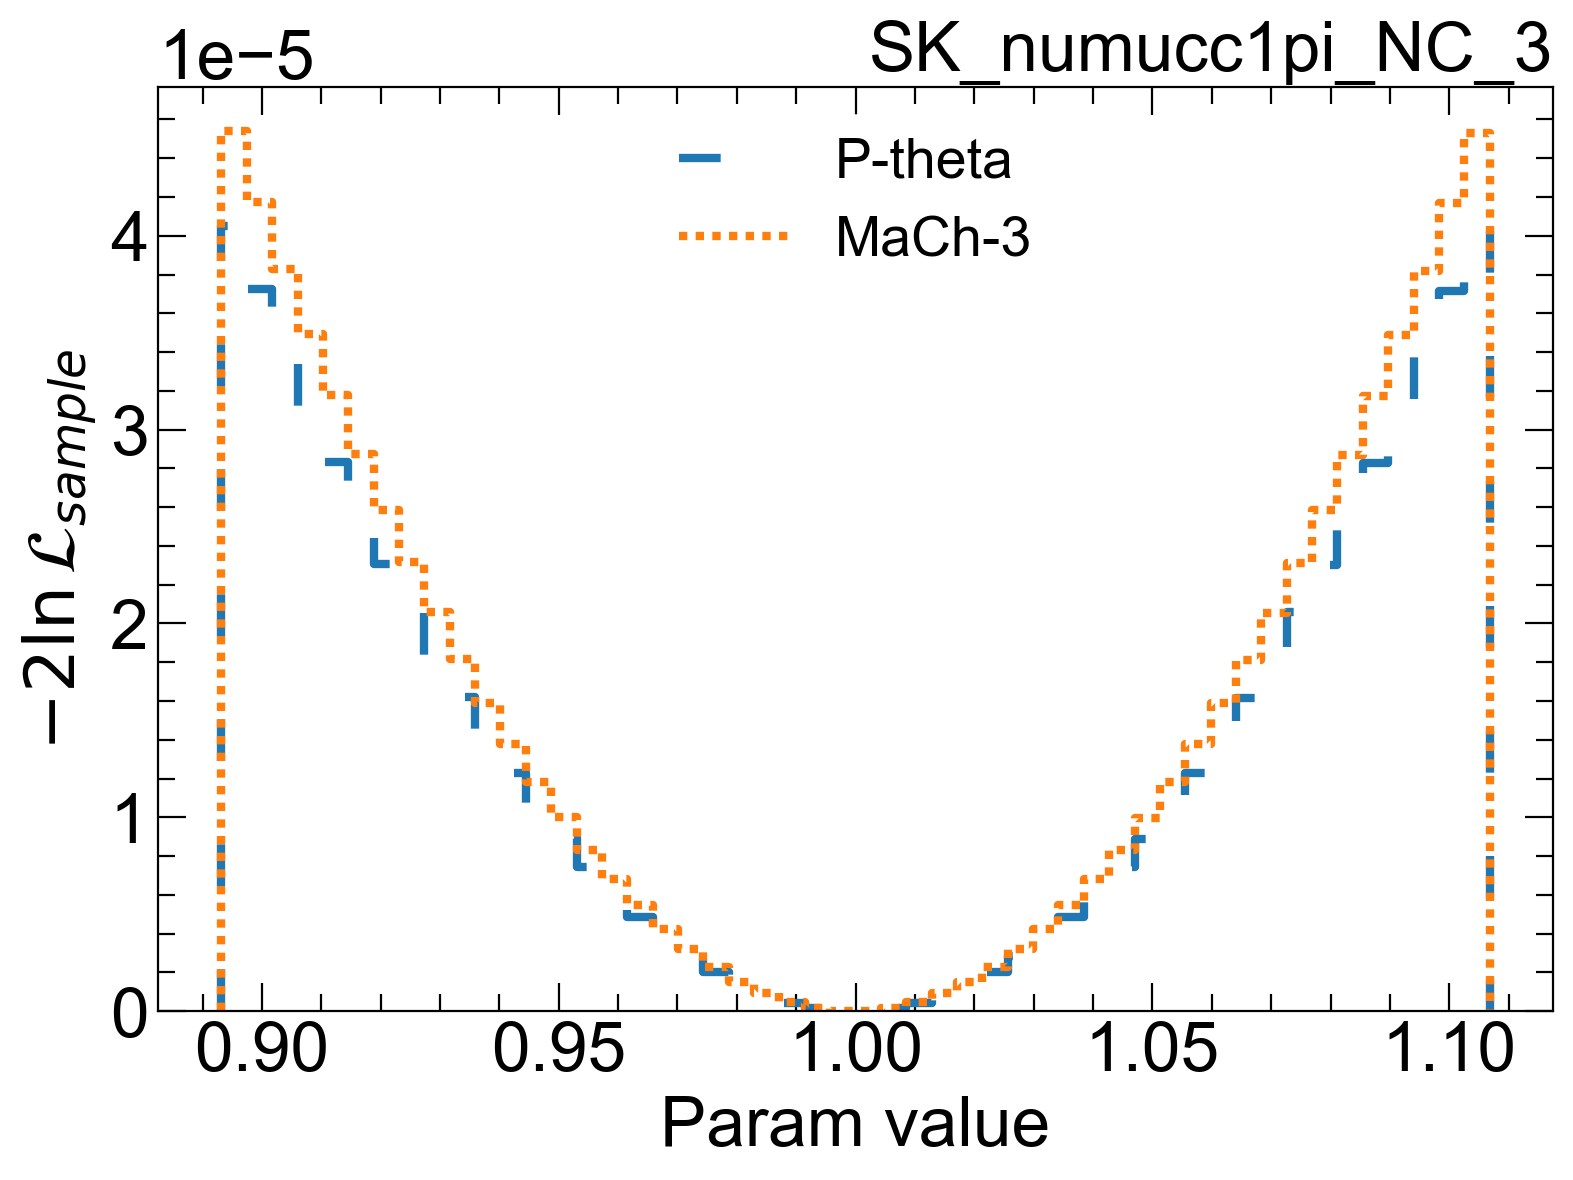

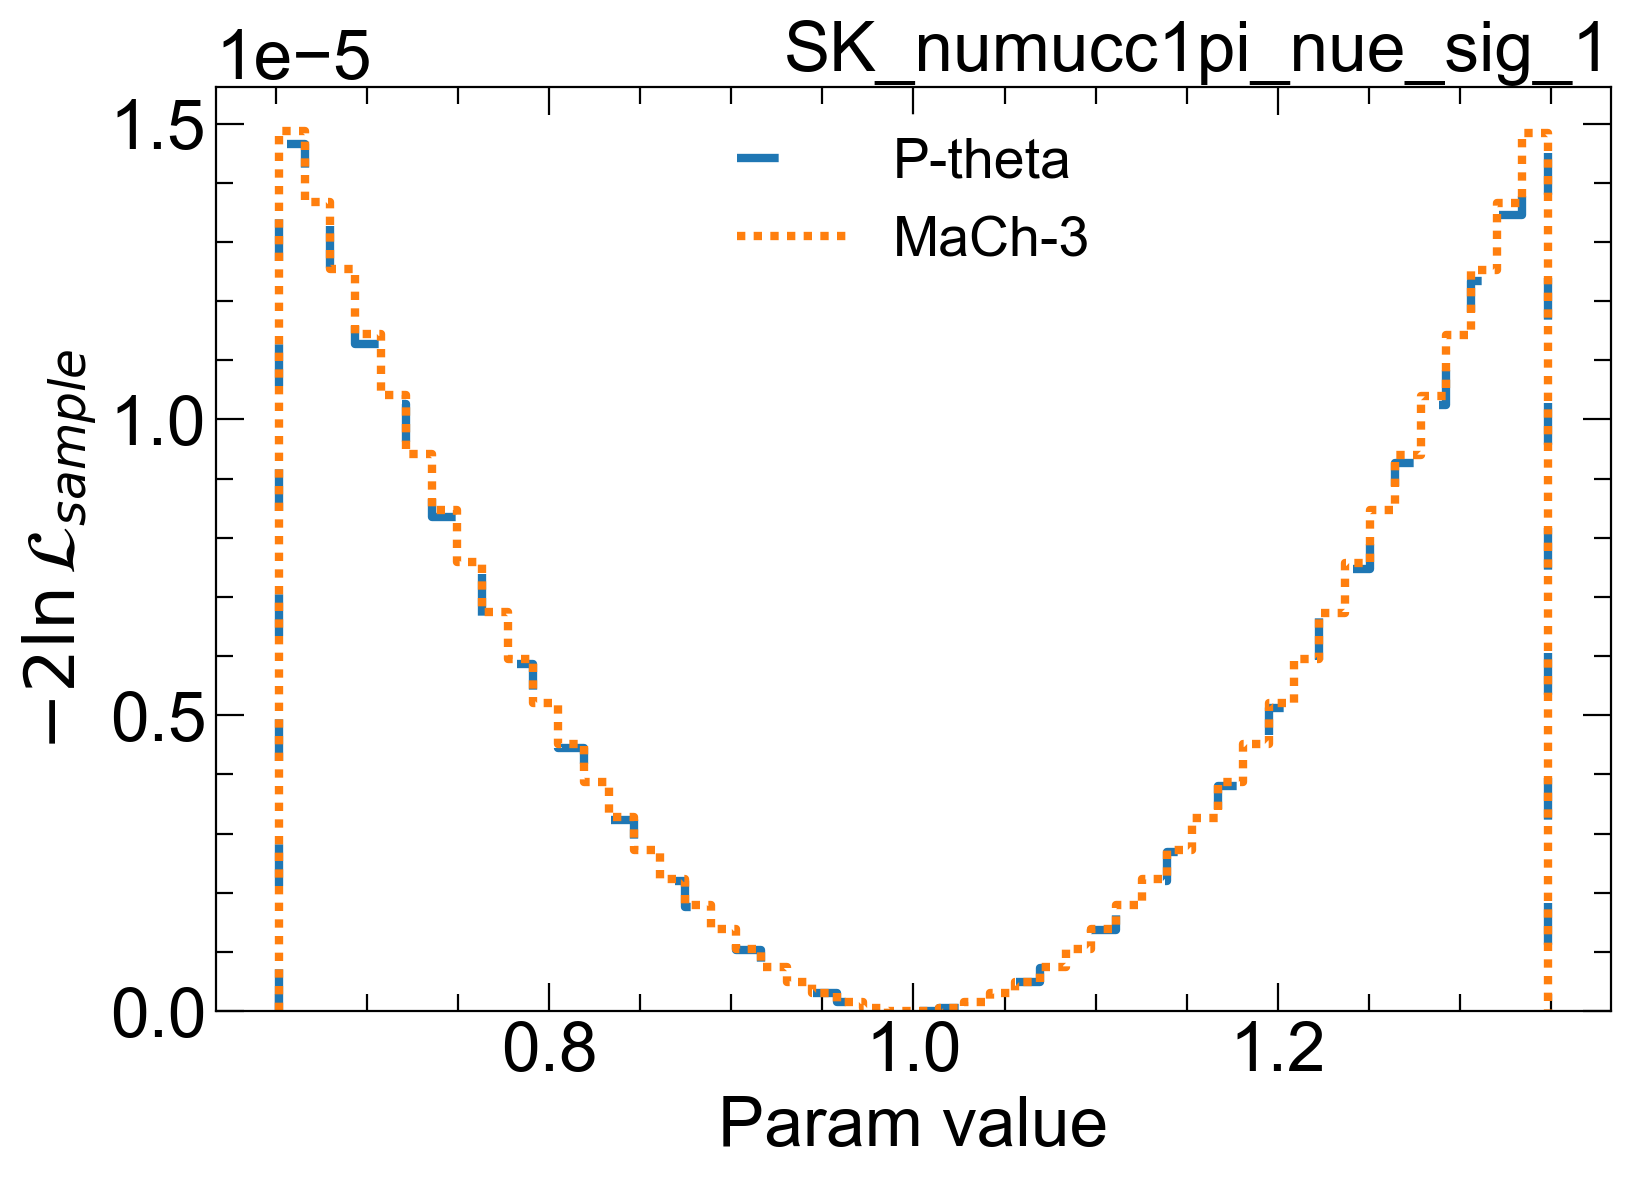

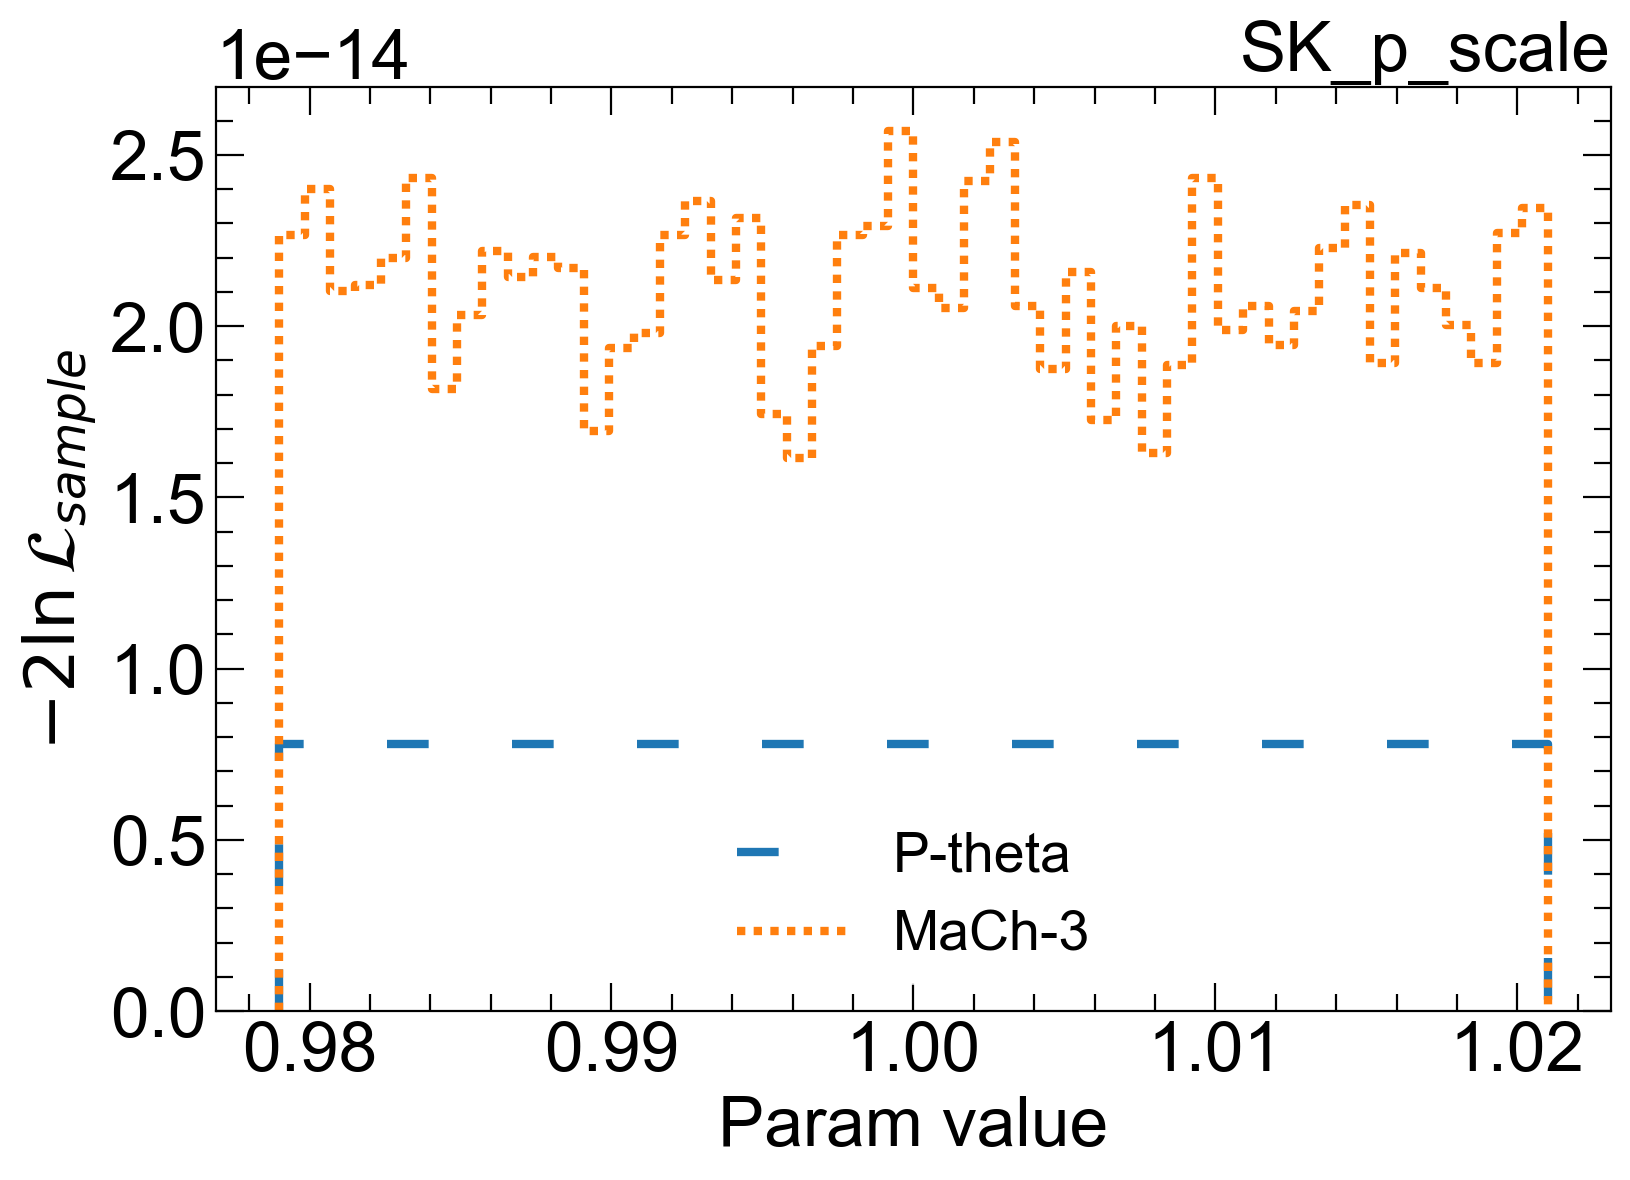

In [16]:
kind = 'sample'
save = False
group = 'skdet'

llh_scan_toy_ptheta = compare_llh_scans.load_sigmavarskdet_per_sample(filename_ptheta, dict_df_names, group, 'P-theta', kind)
llh_scan_toy_mach3 = compare_llh_scans.load_sigmavarskdet_per_sample(filename_mach3,   dict_df_names, group, 'MaCh-3', kind)

for iparam, parameter in enumerate(dict_df_names['skdet']['P-theta'].values):
    fig, ax = plt.subplots()
    llh_scan_toy_ptheta[f'hscan_{parameter}{suffix_ptheta[kind]}'].plot(ax, wtitle=False, label='P-theta', ls=(0, (5, 10)),)
    llh_scan_toy_mach3[f'skd_joint_{iparam}{suffix_mach3[kind]}'].plot(ax, wtitle=False, label='MaCh-3', ls=(0, (1, 1)),)
    ax.set_title(parameter, loc='right')
    ax.set_xlabel('Param value')
    ax.set_ylabel('$-2\ln{\mathcal{L}_{sample}}$')
    ax.legend()
    show_minor_ticks(ax)
    if save:
        fig.savefig(f'{outputs_dir}/plots/OA2024/LLH_scans/LLHscan_{parameter}_{kind}_Erectheta.pdf', bbox_inches='tight')
        plt.close(fig)

## Plot LLH scan comparison and save in one big pdf* 
*(the code handles only skdet group)

In [17]:
from matplotlib.backends.backend_pdf import PdfPages

group = 'skdet'

for kind in ['constraint', 'sample']:
    pdf_path = f'{outdir_path}/LLHscan_all_{kind}_erectheta.pdf'
    
    llh_scan_toy_ptheta = compare_llh_scans.load_sigmavarskdet_per_sample(filename_ptheta, dict_df_names, group, 'P-theta', kind)
    llh_scan_toy_mach3 = compare_llh_scans.load_sigmavarskdet_per_sample(filename_mach3,   dict_df_names, group, 'MaCh-3', kind)


    with PdfPages(pdf_path) as pdf:
        for iparam, parameter in enumerate(dict_df_names['skdet']['P-theta'].values):
            fig, ax = plt.subplots()

            llh_scan_toy_ptheta[f'hscan_{parameter}{suffix_ptheta[kind]}'].plot(ax, wtitle=False, label='P-theta', ls=(0, (5, 10)),)
            llh_scan_toy_mach3[f'skd_joint_{iparam}{suffix_mach3[kind]}'].plot(ax, wtitle=False, label='MaCh-3', ls=(0, (1, 1)))
            ax.set_title(parameter, loc='right')
            ax.set_xlabel('Param value')
            ax.set_ylabel('$-2\ln{\mathcal{L}_{sample}}$')
            ax.legend()
            show_minor_ticks(ax)   
            pdf.savefig(fig, bbox_inches='tight')
            plt.close(fig)